## Atividade 1

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Leitura de dados

In [3]:
df = pd.read_csv("dados_demanda.csv", sep=';')
df.head(10)

,TEMPO,POTENCIA(K-4),POTENCIA(K-3),POTENCIA(K-2),POTENCIA(K-1),POTENCIA,POTENCIA(K+1),POTENCIA(K+2)
0,03/02/2008,13.900000,15.900000,14.600000,15.800000,16.000000,16.299999,16.700001
1,10/02/2008,15.900000,14.600000,15.800000,16.000000,16.299999,16.700001,17.000000
2,17/02/2008,14.600000,15.800000,16.000000,16.299999,16.700001,17.000000,17.100000
3,24/02/2008,15.800000,16.000000,16.299999,16.700001,17.000000,17.100000,17.299999
4,02/03/2008,16.000000,16.299999,16.700001,17.000000,17.100000,17.299999,17.400000
5,09/03/2008,16.299999,16.700001,17.000000,17.100000,17.299999,17.400000,18.500000
6,16/03/2008,16.700001,17.000000,17.100000,17.299999,17.400000,18.500000,17.928948
7,23/03/2008,17.000000,17.100000,17.299999,17.400000,18.500000,17.928948,17.026842
8,30/03/2008,17.100000,17.299999,17.400000,18.500000,17.928948,17.026842,16.400000
9,06/04/2008,17.299999,17.400000,18.500000,17.928948,17.026842,16.400000,16.400000


In [4]:
df.drop(['TEMPO'], axis=1, inplace=True)
df.head(10)

,POTENCIA(K-4),POTENCIA(K-3),POTENCIA(K-2),POTENCIA(K-1),POTENCIA,POTENCIA(K+1),POTENCIA(K+2)
0,13.900000,15.900000,14.600000,15.800000,16.000000,16.299999,16.700001
1,15.900000,14.600000,15.800000,16.000000,16.299999,16.700001,17.000000
2,14.600000,15.800000,16.000000,16.299999,16.700001,17.000000,17.100000
3,15.800000,16.000000,16.299999,16.700001,17.000000,17.100000,17.299999
4,16.000000,16.299999,16.700001,17.000000,17.100000,17.299999,17.400000
5,16.299999,16.700001,17.000000,17.100000,17.299999,17.400000,18.500000
6,16.700001,17.000000,17.100000,17.299999,17.400000,18.500000,17.928948
7,17.000000,17.100000,17.299999,17.400000,18.500000,17.928948,17.026842
8,17.100000,17.299999,17.400000,18.500000,17.928948,17.026842,16.400000
9,17.299999,17.400000,18.500000,17.928948,17.026842,16.400000,16.400000


In [5]:
data = np.array(df)
#print(data)

In [6]:
data = tf.keras.utils.normalize(data, axis=1)
#print(data)

In [7]:
x_train = data[0:216, 0:5]
y_train = data[0:216, 5:7]

In [8]:
x_test = data[216:308,0:5]
y_test = data[216:308, 5:7]

### Criando modelo da Rede neural da atividade

### Creating function to create a model

In [9]:
def createModel(qtdInputs = 5, 
                qtdOutputs = 2, 
                qtdHidenLayers = 2,
                qtdNeuronsHidenLayers = 20,
                activation = "sigmoid",
                optimizer = "adam",
                loss = 'mean_squared_error', 
                metrics = ['mean_squared_error'],
                verbosity = False):
    
    layers = tf.keras.layers
    if verbosity:
        print("Add Input layer with {} inputs".format(qtdInputs))
        print("Activation function: {}".format(activation))
    model = tf.keras.models.Sequential()
    model.add(layers.Input(qtdInputs))
    for i in range(qtdHidenLayers):
        if verbosity:
            print("Adding hiden layer {layerId} with {qtdNeurons}".format(layerId = i+1, qtdNeurons=qtdNeuronsHidenLayers))
        model.add(layers.Dense(qtdNeuronsHidenLayers, activation=activation))
    if verbosity:
            print("Adding output layer with {}".format(qtdOutputs))
    model.add(layers.Dense(qtdOutputs, activation=activation))

    if verbosity:
        print("Compiling module with optimizer:{optimizer}, loss:{loss}, metrics:{metrics}".format(optimizer=optimizer, loss=loss, metrics=metrics))
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics = metrics)
    return model

In [10]:
model = createModel(verbosity=True)

Add Input layer with 5 inputs
Activation function: sigmoid
Adding hiden layer 1 with 20
Adding hiden layer 2 with 20
Adding output layer with 2
Compiling module with optimizer:adam, loss:mean_squared_error, metrics:['mean_squared_error']


2022-09-24 01:03:14.314397: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/pulse/extra/usr/lib/x86_64-linux-gnu/
2022-09-24 01:03:14.314414: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-24 01:03:14.314427: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (UNIAO-017487): /proc/driver/nvidia/version does not exist
2022-09-24 01:03:14.314581: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.fit(x_train, y_train, epochs=5000)

Epoch 1/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 2/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 3/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 4/5000
7/7 [==============================] - 0s 1ms/step - loss: 4.8664e-04 - mean_squared_error: 4.8664e-04
Epoch 5/5000
7/7 [==============================] - 0s 947us/step - loss: 3.3855e-04 - mean_squared_error: 3.3855e-04
Epoch 6/5000
7/7 [==============================] - 0s 1ms/step - loss: 4.0535e-04 - mean_squared_error: 4.0535e-04
Epoch 7/5000
7/7 [==============================] - 0s 861us/step - loss: 4.0523e-04 - mean_squared_error: 4.0523e-04
Epoch 8/5000
7/7 [==============================] - 0s 955us/step - loss: 3.4965e-04 - mean_squared_error: 3.4965e-04
Epoch 9/5000
7/7 [==============================] - 0s 983us/step - loss: 3.1470e-04 - mea

7/7 [==============================] - 0s 806us/step - loss: 3.0750e-04 - mean_squared_error: 3.0750e-04
Epoch 71/5000
7/7 [==============================] - 0s 949us/step - loss: 3.0934e-04 - mean_squared_error: 3.0934e-04
Epoch 72/5000
7/7 [==============================] - 0s 764us/step - loss: 3.0828e-04 - mean_squared_error: 3.0828e-04
Epoch 73/5000
7/7 [==============================] - 0s 703us/step - loss: 3.0839e-04 - mean_squared_error: 3.0839e-04
Epoch 74/5000
7/7 [==============================] - 0s 825us/step - loss: 3.0876e-04 - mean_squared_error: 3.0876e-04
Epoch 75/5000
7/7 [==============================] - 0s 793us/step - loss: 3.0916e-04 - mean_squared_error: 3.0916e-04
Epoch 76/5000
7/7 [==============================] - 0s 839us/step - loss: 3.0778e-04 - mean_squared_error: 3.0778e-04
Epoch 77/5000
7/7 [==============================] - 0s 733us/step - loss: 3.0760e-04 - mean_squared_error: 3.0760e-04
Epoch 78/5000
7/7 [==============================] - 0s 940us/

7/7 [==============================] - 0s 830us/step - loss: 3.0755e-04 - mean_squared_error: 3.0755e-04
Epoch 139/5000
7/7 [==============================] - 0s 662us/step - loss: 3.0738e-04 - mean_squared_error: 3.0738e-04
Epoch 140/5000
7/7 [==============================] - 0s 845us/step - loss: 3.0627e-04 - mean_squared_error: 3.0627e-04
Epoch 141/5000
7/7 [==============================] - 0s 658us/step - loss: 3.0689e-04 - mean_squared_error: 3.0689e-04
Epoch 142/5000
7/7 [==============================] - 0s 698us/step - loss: 3.0730e-04 - mean_squared_error: 3.0730e-04
Epoch 143/5000
7/7 [==============================] - 0s 797us/step - loss: 3.0622e-04 - mean_squared_error: 3.0622e-04
Epoch 144/5000
7/7 [==============================] - 0s 677us/step - loss: 3.0680e-04 - mean_squared_error: 3.0680e-04
Epoch 145/5000
7/7 [==============================] - 0s 805us/step - loss: 3.0849e-04 - mean_squared_error: 3.0849e-04
Epoch 146/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 743us/step - loss: 3.0725e-04 - mean_squared_error: 3.0725e-04
Epoch 207/5000
7/7 [==============================] - 0s 1ms/step - loss: 3.0628e-04 - mean_squared_error: 3.0628e-04
Epoch 208/5000
7/7 [==============================] - 0s 753us/step - loss: 3.0543e-04 - mean_squared_error: 3.0543e-04
Epoch 209/5000
7/7 [==============================] - 0s 991us/step - loss: 3.0757e-04 - mean_squared_error: 3.0757e-04
Epoch 210/5000
7/7 [==============================] - 0s 666us/step - loss: 3.0708e-04 - mean_squared_error: 3.0708e-04
Epoch 211/5000
7/7 [==============================] - 0s 885us/step - loss: 3.0579e-04 - mean_squared_error: 3.0579e-04
Epoch 212/5000
7/7 [==============================] - 0s 762us/step - loss: 3.0512e-04 - mean_squared_error: 3.0512e-04
Epoch 213/5000
7/7 [==============================] - 0s 968us/step - loss: 3.0750e-04 - mean_squared_error: 3.0750e-04
Epoch 214/5000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 860us/step - loss: 3.0857e-04 - mean_squared_error: 3.0857e-04
Epoch 275/5000
7/7 [==============================] - 0s 788us/step - loss: 3.0553e-04 - mean_squared_error: 3.0553e-04
Epoch 276/5000
7/7 [==============================] - 0s 744us/step - loss: 3.0611e-04 - mean_squared_error: 3.0611e-04
Epoch 277/5000
7/7 [==============================] - 0s 897us/step - loss: 3.0615e-04 - mean_squared_error: 3.0615e-04
Epoch 278/5000
7/7 [==============================] - 0s 684us/step - loss: 3.0662e-04 - mean_squared_error: 3.0662e-04
Epoch 279/5000
7/7 [==============================] - 0s 989us/step - loss: 3.0412e-04 - mean_squared_error: 3.0412e-04
Epoch 280/5000
7/7 [==============================] - 0s 710us/step - loss: 3.0620e-04 - mean_squared_error: 3.0620e-04
Epoch 281/5000
7/7 [==============================] - 0s 942us/step - loss: 3.0896e-04 - mean_squared_error: 3.0896e-04
Epoch 282/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 936us/step - loss: 3.0344e-04 - mean_squared_error: 3.0344e-04
Epoch 343/5000
7/7 [==============================] - 0s 718us/step - loss: 3.0452e-04 - mean_squared_error: 3.0452e-04
Epoch 344/5000
7/7 [==============================] - 0s 829us/step - loss: 3.0092e-04 - mean_squared_error: 3.0092e-04
Epoch 345/5000
7/7 [==============================] - 0s 847us/step - loss: 3.1882e-04 - mean_squared_error: 3.1882e-04
Epoch 346/5000
7/7 [==============================] - 0s 802us/step - loss: 3.0703e-04 - mean_squared_error: 3.0703e-04
Epoch 347/5000
7/7 [==============================] - 0s 906us/step - loss: 3.0519e-04 - mean_squared_error: 3.0519e-04
Epoch 348/5000
7/7 [==============================] - 0s 796us/step - loss: 3.0324e-04 - mean_squared_error: 3.0324e-04
Epoch 349/5000
7/7 [==============================] - 0s 1ms/step - loss: 3.0136e-04 - mean_squared_error: 3.0136e-04
Epoch 350/5000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 1ms/step - loss: 3.0135e-04 - mean_squared_error: 3.0135e-04
Epoch 411/5000
7/7 [==============================] - 0s 1ms/step - loss: 3.0064e-04 - mean_squared_error: 3.0064e-04
Epoch 412/5000
7/7 [==============================] - 0s 847us/step - loss: 3.0031e-04 - mean_squared_error: 3.0031e-04
Epoch 413/5000
7/7 [==============================] - 0s 846us/step - loss: 3.0270e-04 - mean_squared_error: 3.0270e-04
Epoch 414/5000
7/7 [==============================] - 0s 757us/step - loss: 3.0072e-04 - mean_squared_error: 3.0072e-04
Epoch 415/5000
7/7 [==============================] - 0s 858us/step - loss: 3.0078e-04 - mean_squared_error: 3.0078e-04
Epoch 416/5000
7/7 [==============================] - 0s 726us/step - loss: 2.9839e-04 - mean_squared_error: 2.9839e-04
Epoch 417/5000
7/7 [==============================] - 0s 798us/step - loss: 2.9982e-04 - mean_squared_error: 2.9982e-04
Epoch 418/5000
7/7 [==============================] - 0s 66

7/7 [==============================] - 0s 676us/step - loss: 2.9851e-04 - mean_squared_error: 2.9851e-04
Epoch 479/5000
7/7 [==============================] - 0s 703us/step - loss: 2.9766e-04 - mean_squared_error: 2.9766e-04
Epoch 480/5000
7/7 [==============================] - 0s 780us/step - loss: 2.9575e-04 - mean_squared_error: 2.9575e-04
Epoch 481/5000
7/7 [==============================] - 0s 640us/step - loss: 2.9647e-04 - mean_squared_error: 2.9647e-04
Epoch 482/5000
7/7 [==============================] - 0s 759us/step - loss: 2.9812e-04 - mean_squared_error: 2.9812e-04
Epoch 483/5000
7/7 [==============================] - 0s 669us/step - loss: 2.9700e-04 - mean_squared_error: 2.9700e-04
Epoch 484/5000
7/7 [==============================] - 0s 668us/step - loss: 3.0081e-04 - mean_squared_error: 3.0081e-04
Epoch 485/5000
7/7 [==============================] - 0s 848us/step - loss: 2.9859e-04 - mean_squared_error: 2.9859e-04
Epoch 486/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 867us/step - loss: 2.9475e-04 - mean_squared_error: 2.9475e-04
Epoch 547/5000
7/7 [==============================] - 0s 707us/step - loss: 2.9770e-04 - mean_squared_error: 2.9770e-04
Epoch 548/5000
7/7 [==============================] - 0s 720us/step - loss: 2.9595e-04 - mean_squared_error: 2.9595e-04
Epoch 549/5000
7/7 [==============================] - 0s 774us/step - loss: 2.9204e-04 - mean_squared_error: 2.9204e-04
Epoch 550/5000
7/7 [==============================] - 0s 781us/step - loss: 2.9388e-04 - mean_squared_error: 2.9388e-04
Epoch 551/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.9791e-04 - mean_squared_error: 2.9791e-04
Epoch 552/5000
7/7 [==============================] - 0s 739us/step - loss: 2.9758e-04 - mean_squared_error: 2.9758e-04
Epoch 553/5000
7/7 [==============================] - 0s 856us/step - loss: 2.9185e-04 - mean_squared_error: 2.9185e-04
Epoch 554/5000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 728us/step - loss: 2.8761e-04 - mean_squared_error: 2.8761e-04
Epoch 615/5000
7/7 [==============================] - 0s 791us/step - loss: 2.8785e-04 - mean_squared_error: 2.8785e-04
Epoch 616/5000
7/7 [==============================] - 0s 820us/step - loss: 2.8786e-04 - mean_squared_error: 2.8786e-04
Epoch 617/5000
7/7 [==============================] - 0s 711us/step - loss: 2.9284e-04 - mean_squared_error: 2.9284e-04
Epoch 618/5000
7/7 [==============================] - 0s 835us/step - loss: 3.0084e-04 - mean_squared_error: 3.0084e-04
Epoch 619/5000
7/7 [==============================] - 0s 686us/step - loss: 2.9003e-04 - mean_squared_error: 2.9003e-04
Epoch 620/5000
7/7 [==============================] - 0s 857us/step - loss: 2.8536e-04 - mean_squared_error: 2.8536e-04
Epoch 621/5000
7/7 [==============================] - 0s 719us/step - loss: 2.8840e-04 - mean_squared_error: 2.8840e-04
Epoch 622/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 787us/step - loss: 2.8396e-04 - mean_squared_error: 2.8396e-04
Epoch 683/5000
7/7 [==============================] - 0s 730us/step - loss: 2.8224e-04 - mean_squared_error: 2.8224e-04
Epoch 684/5000
7/7 [==============================] - 0s 905us/step - loss: 2.8118e-04 - mean_squared_error: 2.8118e-04
Epoch 685/5000
7/7 [==============================] - 0s 759us/step - loss: 2.8733e-04 - mean_squared_error: 2.8733e-04
Epoch 686/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.8768e-04 - mean_squared_error: 2.8768e-04
Epoch 687/5000
7/7 [==============================] - 0s 703us/step - loss: 2.8474e-04 - mean_squared_error: 2.8474e-04
Epoch 688/5000
7/7 [==============================] - 0s 838us/step - loss: 2.8452e-04 - mean_squared_error: 2.8452e-04
Epoch 689/5000
7/7 [==============================] - 0s 824us/step - loss: 2.8264e-04 - mean_squared_error: 2.8264e-04
Epoch 690/5000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 826us/step - loss: 2.8013e-04 - mean_squared_error: 2.8013e-04
Epoch 751/5000
7/7 [==============================] - 0s 743us/step - loss: 2.7587e-04 - mean_squared_error: 2.7587e-04
Epoch 752/5000
7/7 [==============================] - 0s 725us/step - loss: 2.7662e-04 - mean_squared_error: 2.7662e-04
Epoch 753/5000
7/7 [==============================] - 0s 952us/step - loss: 2.8011e-04 - mean_squared_error: 2.8011e-04
Epoch 754/5000
7/7 [==============================] - 0s 865us/step - loss: 2.7947e-04 - mean_squared_error: 2.7947e-04
Epoch 755/5000
7/7 [==============================] - 0s 858us/step - loss: 2.7699e-04 - mean_squared_error: 2.7699e-04
Epoch 756/5000
7/7 [==============================] - 0s 783us/step - loss: 2.7583e-04 - mean_squared_error: 2.7583e-04
Epoch 757/5000
7/7 [==============================] - 0s 861us/step - loss: 2.7537e-04 - mean_squared_error: 2.7537e-04
Epoch 758/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 1ms/step - loss: 2.6749e-04 - mean_squared_error: 2.6749e-04
Epoch 819/5000
7/7 [==============================] - 0s 805us/step - loss: 2.7024e-04 - mean_squared_error: 2.7024e-04
Epoch 820/5000
7/7 [==============================] - 0s 884us/step - loss: 2.7477e-04 - mean_squared_error: 2.7477e-04
Epoch 821/5000
7/7 [==============================] - 0s 940us/step - loss: 2.7130e-04 - mean_squared_error: 2.7130e-04
Epoch 822/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.7488e-04 - mean_squared_error: 2.7488e-04
Epoch 823/5000
7/7 [==============================] - 0s 753us/step - loss: 2.7380e-04 - mean_squared_error: 2.7380e-04
Epoch 824/5000
7/7 [==============================] - 0s 987us/step - loss: 2.6612e-04 - mean_squared_error: 2.6612e-04
Epoch 825/5000
7/7 [==============================] - 0s 701us/step - loss: 2.7114e-04 - mean_squared_error: 2.7114e-04
Epoch 826/5000
7/7 [==============================] - 0s 74

7/7 [==============================] - 0s 913us/step - loss: 2.6038e-04 - mean_squared_error: 2.6038e-04
Epoch 887/5000
7/7 [==============================] - 0s 852us/step - loss: 2.6112e-04 - mean_squared_error: 2.6112e-04
Epoch 888/5000
7/7 [==============================] - 0s 848us/step - loss: 2.6102e-04 - mean_squared_error: 2.6102e-04
Epoch 889/5000
7/7 [==============================] - 0s 787us/step - loss: 2.5728e-04 - mean_squared_error: 2.5728e-04
Epoch 890/5000
7/7 [==============================] - 0s 734us/step - loss: 2.5911e-04 - mean_squared_error: 2.5911e-04
Epoch 891/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.5959e-04 - mean_squared_error: 2.5959e-04
Epoch 892/5000
7/7 [==============================] - 0s 799us/step - loss: 2.5706e-04 - mean_squared_error: 2.5706e-04
Epoch 893/5000
7/7 [==============================] - 0s 826us/step - loss: 2.5919e-04 - mean_squared_error: 2.5919e-04
Epoch 894/5000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 1ms/step - loss: 2.5156e-04 - mean_squared_error: 2.5156e-04
Epoch 955/5000
7/7 [==============================] - 0s 723us/step - loss: 2.4908e-04 - mean_squared_error: 2.4908e-04
Epoch 956/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.5150e-04 - mean_squared_error: 2.5150e-04
Epoch 957/5000
7/7 [==============================] - 0s 660us/step - loss: 2.5929e-04 - mean_squared_error: 2.5929e-04
Epoch 958/5000
7/7 [==============================] - 0s 985us/step - loss: 2.6081e-04 - mean_squared_error: 2.6081e-04
Epoch 959/5000
7/7 [==============================] - 0s 675us/step - loss: 2.5185e-04 - mean_squared_error: 2.5185e-04
Epoch 960/5000
7/7 [==============================] - 0s 953us/step - loss: 2.5436e-04 - mean_squared_error: 2.5436e-04
Epoch 961/5000
7/7 [==============================] - 0s 662us/step - loss: 2.4948e-04 - mean_squared_error: 2.4948e-04
Epoch 962/5000
7/7 [==============================] - 0s 76

7/7 [==============================] - 0s 688us/step - loss: 2.4080e-04 - mean_squared_error: 2.4080e-04
Epoch 1023/5000
7/7 [==============================] - 0s 696us/step - loss: 2.3975e-04 - mean_squared_error: 2.3975e-04
Epoch 1024/5000
7/7 [==============================] - 0s 755us/step - loss: 2.3832e-04 - mean_squared_error: 2.3832e-04
Epoch 1025/5000
7/7 [==============================] - 0s 913us/step - loss: 2.3640e-04 - mean_squared_error: 2.3640e-04
Epoch 1026/5000
7/7 [==============================] - 0s 693us/step - loss: 2.3870e-04 - mean_squared_error: 2.3870e-04
Epoch 1027/5000
7/7 [==============================] - 0s 668us/step - loss: 2.3826e-04 - mean_squared_error: 2.3826e-04
Epoch 1028/5000
7/7 [==============================] - 0s 821us/step - loss: 2.3757e-04 - mean_squared_error: 2.3757e-04
Epoch 1029/5000
7/7 [==============================] - 0s 733us/step - loss: 2.3686e-04 - mean_squared_error: 2.3686e-04
Epoch 1030/5000
7/7 [===========================

7/7 [==============================] - 0s 822us/step - loss: 2.2884e-04 - mean_squared_error: 2.2884e-04
Epoch 1090/5000
7/7 [==============================] - 0s 878us/step - loss: 2.3087e-04 - mean_squared_error: 2.3087e-04
Epoch 1091/5000
7/7 [==============================] - 0s 806us/step - loss: 2.2752e-04 - mean_squared_error: 2.2752e-04
Epoch 1092/5000
7/7 [==============================] - 0s 833us/step - loss: 2.3031e-04 - mean_squared_error: 2.3031e-04
Epoch 1093/5000
7/7 [==============================] - 0s 724us/step - loss: 2.2634e-04 - mean_squared_error: 2.2634e-04
Epoch 1094/5000
7/7 [==============================] - 0s 926us/step - loss: 2.2844e-04 - mean_squared_error: 2.2844e-04
Epoch 1095/5000
7/7 [==============================] - 0s 653us/step - loss: 2.2983e-04 - mean_squared_error: 2.2983e-04
Epoch 1096/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.2708e-04 - mean_squared_error: 2.2708e-04
Epoch 1097/5000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 2.2324e-04 - mean_squared_error: 2.2324e-04
Epoch 1158/5000
7/7 [==============================] - 0s 653us/step - loss: 2.2035e-04 - mean_squared_error: 2.2035e-04
Epoch 1159/5000
7/7 [==============================] - 0s 920us/step - loss: 2.1630e-04 - mean_squared_error: 2.1630e-04
Epoch 1160/5000
7/7 [==============================] - 0s 674us/step - loss: 2.1754e-04 - mean_squared_error: 2.1754e-04
Epoch 1161/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.1588e-04 - mean_squared_error: 2.1588e-04
Epoch 1162/5000
7/7 [==============================] - 0s 718us/step - loss: 2.1955e-04 - mean_squared_error: 2.1955e-04
Epoch 1163/5000
7/7 [==============================] - 0s 908us/step - loss: 2.2306e-04 - mean_squared_error: 2.2306e-04
Epoch 1164/5000
7/7 [==============================] - 0s 677us/step - loss: 2.2096e-04 - mean_squared_error: 2.2096e-04
Epoch 1165/5000
7/7 [==============================]

7/7 [==============================] - 0s 772us/step - loss: 2.1049e-04 - mean_squared_error: 2.1049e-04
Epoch 1226/5000
7/7 [==============================] - 0s 771us/step - loss: 2.0844e-04 - mean_squared_error: 2.0844e-04
Epoch 1227/5000
7/7 [==============================] - 0s 967us/step - loss: 2.0557e-04 - mean_squared_error: 2.0557e-04
Epoch 1228/5000
7/7 [==============================] - 0s 739us/step - loss: 2.0607e-04 - mean_squared_error: 2.0607e-04
Epoch 1229/5000
7/7 [==============================] - 0s 998us/step - loss: 2.1068e-04 - mean_squared_error: 2.1068e-04
Epoch 1230/5000
7/7 [==============================] - 0s 671us/step - loss: 2.1119e-04 - mean_squared_error: 2.1119e-04
Epoch 1231/5000
7/7 [==============================] - 0s 915us/step - loss: 2.0932e-04 - mean_squared_error: 2.0932e-04
Epoch 1232/5000
7/7 [==============================] - 0s 695us/step - loss: 2.1183e-04 - mean_squared_error: 2.1183e-04
Epoch 1233/5000
7/7 [===========================

7/7 [==============================] - 0s 942us/step - loss: 1.9867e-04 - mean_squared_error: 1.9867e-04
Epoch 1293/5000
7/7 [==============================] - 0s 690us/step - loss: 1.9929e-04 - mean_squared_error: 1.9929e-04
Epoch 1294/5000
7/7 [==============================] - 0s 936us/step - loss: 1.9841e-04 - mean_squared_error: 1.9841e-04
Epoch 1295/5000
7/7 [==============================] - 0s 801us/step - loss: 1.9844e-04 - mean_squared_error: 1.9844e-04
Epoch 1296/5000
7/7 [==============================] - 0s 988us/step - loss: 1.9605e-04 - mean_squared_error: 1.9605e-04
Epoch 1297/5000
7/7 [==============================] - 0s 703us/step - loss: 1.9737e-04 - mean_squared_error: 1.9737e-04
Epoch 1298/5000
7/7 [==============================] - 0s 911us/step - loss: 1.9949e-04 - mean_squared_error: 1.9949e-04
Epoch 1299/5000
7/7 [==============================] - 0s 724us/step - loss: 1.9879e-04 - mean_squared_error: 1.9879e-04
Epoch 1300/5000
7/7 [===========================

7/7 [==============================] - 0s 2ms/step - loss: 1.9210e-04 - mean_squared_error: 1.9210e-04
Epoch 1361/5000
7/7 [==============================] - 0s 766us/step - loss: 1.9541e-04 - mean_squared_error: 1.9541e-04
Epoch 1362/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.9462e-04 - mean_squared_error: 1.9462e-04
Epoch 1363/5000
7/7 [==============================] - 0s 725us/step - loss: 2.0268e-04 - mean_squared_error: 2.0268e-04
Epoch 1364/5000
7/7 [==============================] - 0s 946us/step - loss: 1.9115e-04 - mean_squared_error: 1.9115e-04
Epoch 1365/5000
7/7 [==============================] - 0s 706us/step - loss: 1.8788e-04 - mean_squared_error: 1.8788e-04
Epoch 1366/5000
7/7 [==============================] - 0s 830us/step - loss: 1.9020e-04 - mean_squared_error: 1.9020e-04
Epoch 1367/5000
7/7 [==============================] - 0s 850us/step - loss: 1.8784e-04 - mean_squared_error: 1.8784e-04
Epoch 1368/5000
7/7 [==============================]

7/7 [==============================] - 0s 985us/step - loss: 1.8349e-04 - mean_squared_error: 1.8349e-04
Epoch 1429/5000
7/7 [==============================] - 0s 738us/step - loss: 1.8157e-04 - mean_squared_error: 1.8157e-04
Epoch 1430/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.8213e-04 - mean_squared_error: 1.8213e-04
Epoch 1431/5000
7/7 [==============================] - 0s 641us/step - loss: 1.8069e-04 - mean_squared_error: 1.8069e-04
Epoch 1432/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.8076e-04 - mean_squared_error: 1.8076e-04
Epoch 1433/5000
7/7 [==============================] - 0s 757us/step - loss: 1.8364e-04 - mean_squared_error: 1.8364e-04
Epoch 1434/5000
7/7 [==============================] - 0s 748us/step - loss: 1.8328e-04 - mean_squared_error: 1.8328e-04
Epoch 1435/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.8821e-04 - mean_squared_error: 1.8821e-04
Epoch 1436/5000
7/7 [==============================] -

7/7 [==============================] - 0s 883us/step - loss: 1.7981e-04 - mean_squared_error: 1.7981e-04
Epoch 1497/5000
7/7 [==============================] - 0s 730us/step - loss: 1.8076e-04 - mean_squared_error: 1.8076e-04
Epoch 1498/5000
7/7 [==============================] - 0s 877us/step - loss: 1.7650e-04 - mean_squared_error: 1.7650e-04
Epoch 1499/5000
7/7 [==============================] - 0s 703us/step - loss: 1.7387e-04 - mean_squared_error: 1.7387e-04
Epoch 1500/5000
7/7 [==============================] - 0s 858us/step - loss: 1.7320e-04 - mean_squared_error: 1.7320e-04
Epoch 1501/5000
7/7 [==============================] - 0s 737us/step - loss: 1.7501e-04 - mean_squared_error: 1.7501e-04
Epoch 1502/5000
7/7 [==============================] - 0s 716us/step - loss: 1.7342e-04 - mean_squared_error: 1.7342e-04
Epoch 1503/5000
7/7 [==============================] - 0s 794us/step - loss: 1.7591e-04 - mean_squared_error: 1.7591e-04
Epoch 1504/5000
7/7 [===========================

7/7 [==============================] - 0s 663us/step - loss: 1.6919e-04 - mean_squared_error: 1.6919e-04
Epoch 1564/5000
7/7 [==============================] - 0s 777us/step - loss: 1.6859e-04 - mean_squared_error: 1.6859e-04
Epoch 1565/5000
7/7 [==============================] - 0s 695us/step - loss: 1.6928e-04 - mean_squared_error: 1.6928e-04
Epoch 1566/5000
7/7 [==============================] - 0s 814us/step - loss: 1.6794e-04 - mean_squared_error: 1.6794e-04
Epoch 1567/5000
7/7 [==============================] - 0s 774us/step - loss: 1.6998e-04 - mean_squared_error: 1.6998e-04
Epoch 1568/5000
7/7 [==============================] - 0s 682us/step - loss: 1.7782e-04 - mean_squared_error: 1.7782e-04
Epoch 1569/5000
7/7 [==============================] - 0s 866us/step - loss: 1.7381e-04 - mean_squared_error: 1.7381e-04
Epoch 1570/5000
7/7 [==============================] - 0s 718us/step - loss: 1.7767e-04 - mean_squared_error: 1.7767e-04
Epoch 1571/5000
7/7 [===========================

7/7 [==============================] - 0s 823us/step - loss: 1.6401e-04 - mean_squared_error: 1.6401e-04
Epoch 1631/5000
7/7 [==============================] - 0s 732us/step - loss: 1.6662e-04 - mean_squared_error: 1.6662e-04
Epoch 1632/5000
7/7 [==============================] - 0s 701us/step - loss: 1.6309e-04 - mean_squared_error: 1.6309e-04
Epoch 1633/5000
7/7 [==============================] - 0s 868us/step - loss: 1.6292e-04 - mean_squared_error: 1.6292e-04
Epoch 1634/5000
7/7 [==============================] - 0s 731us/step - loss: 1.6957e-04 - mean_squared_error: 1.6957e-04
Epoch 1635/5000
7/7 [==============================] - 0s 856us/step - loss: 1.7097e-04 - mean_squared_error: 1.7097e-04
Epoch 1636/5000
7/7 [==============================] - 0s 713us/step - loss: 1.6464e-04 - mean_squared_error: 1.6464e-04
Epoch 1637/5000
7/7 [==============================] - 0s 733us/step - loss: 1.6510e-04 - mean_squared_error: 1.6510e-04
Epoch 1638/5000
7/7 [===========================

7/7 [==============================] - 0s 703us/step - loss: 1.6734e-04 - mean_squared_error: 1.6734e-04
Epoch 1698/5000
7/7 [==============================] - 0s 723us/step - loss: 1.6371e-04 - mean_squared_error: 1.6371e-04
Epoch 1699/5000
7/7 [==============================] - 0s 874us/step - loss: 1.6107e-04 - mean_squared_error: 1.6107e-04
Epoch 1700/5000
7/7 [==============================] - 0s 681us/step - loss: 1.6080e-04 - mean_squared_error: 1.6080e-04
Epoch 1701/5000
7/7 [==============================] - 0s 816us/step - loss: 1.6257e-04 - mean_squared_error: 1.6257e-04
Epoch 1702/5000
7/7 [==============================] - 0s 743us/step - loss: 1.5891e-04 - mean_squared_error: 1.5891e-04
Epoch 1703/5000
7/7 [==============================] - 0s 721us/step - loss: 1.5720e-04 - mean_squared_error: 1.5720e-04
Epoch 1704/5000
7/7 [==============================] - 0s 754us/step - loss: 1.6476e-04 - mean_squared_error: 1.6476e-04
Epoch 1705/5000
7/7 [===========================

Epoch 1765/5000
7/7 [==============================] - 0s 701us/step - loss: 1.6510e-04 - mean_squared_error: 1.6510e-04
Epoch 1766/5000
7/7 [==============================] - 0s 743us/step - loss: 1.5485e-04 - mean_squared_error: 1.5485e-04
Epoch 1767/5000
7/7 [==============================] - 0s 709us/step - loss: 1.6156e-04 - mean_squared_error: 1.6156e-04
Epoch 1768/5000
7/7 [==============================] - 0s 821us/step - loss: 1.6347e-04 - mean_squared_error: 1.6347e-04
Epoch 1769/5000
7/7 [==============================] - 0s 747us/step - loss: 1.5676e-04 - mean_squared_error: 1.5676e-04
Epoch 1770/5000
7/7 [==============================] - 0s 743us/step - loss: 1.5688e-04 - mean_squared_error: 1.5688e-04
Epoch 1771/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.5554e-04 - mean_squared_error: 1.5554e-04
Epoch 1772/5000
7/7 [==============================] - 0s 630us/step - loss: 1.6007e-04 - mean_squared_error: 1.6007e-04
Epoch 1773/5000
7/7 [=============

Epoch 1833/5000
7/7 [==============================] - 0s 679us/step - loss: 1.5687e-04 - mean_squared_error: 1.5687e-04
Epoch 1834/5000
7/7 [==============================] - 0s 746us/step - loss: 1.5834e-04 - mean_squared_error: 1.5834e-04
Epoch 1835/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.5349e-04 - mean_squared_error: 1.5349e-04
Epoch 1836/5000
7/7 [==============================] - 0s 804us/step - loss: 1.5268e-04 - mean_squared_error: 1.5268e-04
Epoch 1837/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.5386e-04 - mean_squared_error: 1.5386e-04
Epoch 1838/5000
7/7 [==============================] - 0s 654us/step - loss: 1.5193e-04 - mean_squared_error: 1.5193e-04
Epoch 1839/5000
7/7 [==============================] - 0s 978us/step - loss: 1.5536e-04 - mean_squared_error: 1.5536e-04
Epoch 1840/5000
7/7 [==============================] - 0s 636us/step - loss: 1.5789e-04 - mean_squared_error: 1.5789e-04
Epoch 1841/5000
7/7 [===============

7/7 [==============================] - 0s 813us/step - loss: 1.4863e-04 - mean_squared_error: 1.4863e-04
Epoch 1901/5000
7/7 [==============================] - 0s 695us/step - loss: 1.4960e-04 - mean_squared_error: 1.4960e-04
Epoch 1902/5000
7/7 [==============================] - 0s 788us/step - loss: 1.4820e-04 - mean_squared_error: 1.4820e-04
Epoch 1903/5000
7/7 [==============================] - 0s 942us/step - loss: 1.4879e-04 - mean_squared_error: 1.4879e-04
Epoch 1904/5000
7/7 [==============================] - 0s 680us/step - loss: 1.4960e-04 - mean_squared_error: 1.4960e-04
Epoch 1905/5000
7/7 [==============================] - 0s 909us/step - loss: 1.4854e-04 - mean_squared_error: 1.4854e-04
Epoch 1906/5000
7/7 [==============================] - 0s 730us/step - loss: 1.5019e-04 - mean_squared_error: 1.5019e-04
Epoch 1907/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.5100e-04 - mean_squared_error: 1.5100e-04
Epoch 1908/5000
7/7 [=============================

7/7 [==============================] - 0s 918us/step - loss: 1.4819e-04 - mean_squared_error: 1.4819e-04
Epoch 1969/5000
7/7 [==============================] - 0s 696us/step - loss: 1.5157e-04 - mean_squared_error: 1.5157e-04
Epoch 1970/5000
7/7 [==============================] - 0s 954us/step - loss: 1.4958e-04 - mean_squared_error: 1.4958e-04
Epoch 1971/5000
7/7 [==============================] - 0s 725us/step - loss: 1.4578e-04 - mean_squared_error: 1.4578e-04
Epoch 1972/5000
7/7 [==============================] - 0s 979us/step - loss: 1.5040e-04 - mean_squared_error: 1.5040e-04
Epoch 1973/5000
7/7 [==============================] - 0s 710us/step - loss: 1.4889e-04 - mean_squared_error: 1.4889e-04
Epoch 1974/5000
7/7 [==============================] - 0s 980us/step - loss: 1.4483e-04 - mean_squared_error: 1.4483e-04
Epoch 1975/5000
7/7 [==============================] - 0s 736us/step - loss: 1.4529e-04 - mean_squared_error: 1.4529e-04
Epoch 1976/5000
7/7 [===========================

7/7 [==============================] - 0s 1ms/step - loss: 1.5179e-04 - mean_squared_error: 1.5179e-04
Epoch 2037/5000
7/7 [==============================] - 0s 731us/step - loss: 1.4424e-04 - mean_squared_error: 1.4424e-04
Epoch 2038/5000
7/7 [==============================] - 0s 870us/step - loss: 1.4195e-04 - mean_squared_error: 1.4195e-04
Epoch 2039/5000
7/7 [==============================] - 0s 757us/step - loss: 1.4432e-04 - mean_squared_error: 1.4432e-04
Epoch 2040/5000
7/7 [==============================] - 0s 860us/step - loss: 1.4201e-04 - mean_squared_error: 1.4201e-04
Epoch 2041/5000
7/7 [==============================] - 0s 725us/step - loss: 1.4315e-04 - mean_squared_error: 1.4315e-04
Epoch 2042/5000
7/7 [==============================] - 0s 680us/step - loss: 1.4367e-04 - mean_squared_error: 1.4367e-04
Epoch 2043/5000
7/7 [==============================] - 0s 864us/step - loss: 1.4347e-04 - mean_squared_error: 1.4347e-04
Epoch 2044/5000
7/7 [=============================

7/7 [==============================] - 0s 758us/step - loss: 1.4184e-04 - mean_squared_error: 1.4184e-04
Epoch 2104/5000
7/7 [==============================] - 0s 852us/step - loss: 1.3892e-04 - mean_squared_error: 1.3892e-04
Epoch 2105/5000
7/7 [==============================] - 0s 703us/step - loss: 1.3966e-04 - mean_squared_error: 1.3966e-04
Epoch 2106/5000
7/7 [==============================] - 0s 754us/step - loss: 1.4664e-04 - mean_squared_error: 1.4664e-04
Epoch 2107/5000
7/7 [==============================] - 0s 797us/step - loss: 1.4299e-04 - mean_squared_error: 1.4299e-04
Epoch 2108/5000
7/7 [==============================] - 0s 742us/step - loss: 1.4257e-04 - mean_squared_error: 1.4257e-04
Epoch 2109/5000
7/7 [==============================] - 0s 822us/step - loss: 1.4433e-04 - mean_squared_error: 1.4433e-04
Epoch 2110/5000
7/7 [==============================] - 0s 738us/step - loss: 1.5027e-04 - mean_squared_error: 1.5027e-04
Epoch 2111/5000
7/7 [===========================

7/7 [==============================] - 0s 1ms/step - loss: 1.4315e-04 - mean_squared_error: 1.4315e-04
Epoch 2172/5000
7/7 [==============================] - 0s 677us/step - loss: 1.3804e-04 - mean_squared_error: 1.3804e-04
Epoch 2173/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.4165e-04 - mean_squared_error: 1.4165e-04
Epoch 2174/5000
7/7 [==============================] - 0s 721us/step - loss: 1.4606e-04 - mean_squared_error: 1.4606e-04
Epoch 2175/5000
7/7 [==============================] - 0s 857us/step - loss: 1.3759e-04 - mean_squared_error: 1.3759e-04
Epoch 2176/5000
7/7 [==============================] - 0s 766us/step - loss: 1.3968e-04 - mean_squared_error: 1.3968e-04
Epoch 2177/5000
7/7 [==============================] - 0s 724us/step - loss: 1.3581e-04 - mean_squared_error: 1.3581e-04
Epoch 2178/5000
7/7 [==============================] - 0s 948us/step - loss: 1.3623e-04 - mean_squared_error: 1.3623e-04
Epoch 2179/5000
7/7 [==============================]

7/7 [==============================] - 0s 1ms/step - loss: 1.3335e-04 - mean_squared_error: 1.3335e-04
Epoch 2240/5000
7/7 [==============================] - 0s 770us/step - loss: 1.3272e-04 - mean_squared_error: 1.3272e-04
Epoch 2241/5000
7/7 [==============================] - 0s 982us/step - loss: 1.3488e-04 - mean_squared_error: 1.3488e-04
Epoch 2242/5000
7/7 [==============================] - 0s 692us/step - loss: 1.3493e-04 - mean_squared_error: 1.3493e-04
Epoch 2243/5000
7/7 [==============================] - 0s 794us/step - loss: 1.3768e-04 - mean_squared_error: 1.3768e-04
Epoch 2244/5000
7/7 [==============================] - 0s 759us/step - loss: 1.4039e-04 - mean_squared_error: 1.4039e-04
Epoch 2245/5000
7/7 [==============================] - 0s 772us/step - loss: 1.3725e-04 - mean_squared_error: 1.3725e-04
Epoch 2246/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.3672e-04 - mean_squared_error: 1.3672e-04
Epoch 2247/5000
7/7 [==============================]

7/7 [==============================] - 0s 724us/step - loss: 1.3184e-04 - mean_squared_error: 1.3184e-04
Epoch 2308/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.3119e-04 - mean_squared_error: 1.3119e-04
Epoch 2309/5000
7/7 [==============================] - 0s 790us/step - loss: 1.3034e-04 - mean_squared_error: 1.3034e-04
Epoch 2310/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.3615e-04 - mean_squared_error: 1.3615e-04
Epoch 2311/5000
7/7 [==============================] - 0s 699us/step - loss: 1.3220e-04 - mean_squared_error: 1.3220e-04
Epoch 2312/5000
7/7 [==============================] - 0s 986us/step - loss: 1.3551e-04 - mean_squared_error: 1.3551e-04
Epoch 2313/5000
7/7 [==============================] - 0s 692us/step - loss: 1.3262e-04 - mean_squared_error: 1.3262e-04
Epoch 2314/5000
7/7 [==============================] - 0s 908us/step - loss: 1.3169e-04 - mean_squared_error: 1.3169e-04
Epoch 2315/5000
7/7 [==============================]

7/7 [==============================] - 0s 1ms/step - loss: 1.3717e-04 - mean_squared_error: 1.3717e-04
Epoch 2376/5000
7/7 [==============================] - 0s 739us/step - loss: 1.3389e-04 - mean_squared_error: 1.3389e-04
Epoch 2377/5000
7/7 [==============================] - 0s 850us/step - loss: 1.3085e-04 - mean_squared_error: 1.3085e-04
Epoch 2378/5000
7/7 [==============================] - 0s 759us/step - loss: 1.2806e-04 - mean_squared_error: 1.2806e-04
Epoch 2379/5000
7/7 [==============================] - 0s 742us/step - loss: 1.2703e-04 - mean_squared_error: 1.2703e-04
Epoch 2380/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.2782e-04 - mean_squared_error: 1.2782e-04
Epoch 2381/5000
7/7 [==============================] - 0s 757us/step - loss: 1.2744e-04 - mean_squared_error: 1.2744e-04
Epoch 2382/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.2799e-04 - mean_squared_error: 1.2799e-04
Epoch 2383/5000
7/7 [==============================] -

7/7 [==============================] - 0s 1ms/step - loss: 1.2865e-04 - mean_squared_error: 1.2865e-04
Epoch 2444/5000
7/7 [==============================] - 0s 728us/step - loss: 1.2676e-04 - mean_squared_error: 1.2676e-04
Epoch 2445/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.2509e-04 - mean_squared_error: 1.2509e-04
Epoch 2446/5000
7/7 [==============================] - 0s 686us/step - loss: 1.2621e-04 - mean_squared_error: 1.2621e-04
Epoch 2447/5000
7/7 [==============================] - 0s 963us/step - loss: 1.2687e-04 - mean_squared_error: 1.2687e-04
Epoch 2448/5000
7/7 [==============================] - 0s 727us/step - loss: 1.2624e-04 - mean_squared_error: 1.2624e-04
Epoch 2449/5000
7/7 [==============================] - 0s 741us/step - loss: 1.2565e-04 - mean_squared_error: 1.2565e-04
Epoch 2450/5000
7/7 [==============================] - 0s 952us/step - loss: 1.2647e-04 - mean_squared_error: 1.2647e-04
Epoch 2451/5000
7/7 [==============================]

7/7 [==============================] - 0s 786us/step - loss: 1.2284e-04 - mean_squared_error: 1.2284e-04
Epoch 2512/5000
7/7 [==============================] - 0s 816us/step - loss: 1.2319e-04 - mean_squared_error: 1.2319e-04
Epoch 2513/5000
7/7 [==============================] - 0s 720us/step - loss: 1.3124e-04 - mean_squared_error: 1.3124e-04
Epoch 2514/5000
7/7 [==============================] - 0s 946us/step - loss: 1.3214e-04 - mean_squared_error: 1.3214e-04
Epoch 2515/5000
7/7 [==============================] - 0s 805us/step - loss: 1.2736e-04 - mean_squared_error: 1.2736e-04
Epoch 2516/5000
7/7 [==============================] - 0s 960us/step - loss: 1.2637e-04 - mean_squared_error: 1.2637e-04
Epoch 2517/5000
7/7 [==============================] - 0s 695us/step - loss: 1.2388e-04 - mean_squared_error: 1.2388e-04
Epoch 2518/5000
7/7 [==============================] - 0s 798us/step - loss: 1.2348e-04 - mean_squared_error: 1.2348e-04
Epoch 2519/5000
7/7 [===========================

7/7 [==============================] - 0s 902us/step - loss: 1.2558e-04 - mean_squared_error: 1.2558e-04
Epoch 2580/5000
7/7 [==============================] - 0s 716us/step - loss: 1.2146e-04 - mean_squared_error: 1.2146e-04
Epoch 2581/5000
7/7 [==============================] - 0s 900us/step - loss: 1.2623e-04 - mean_squared_error: 1.2623e-04
Epoch 2582/5000
7/7 [==============================] - 0s 782us/step - loss: 1.2119e-04 - mean_squared_error: 1.2119e-04
Epoch 2583/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.2432e-04 - mean_squared_error: 1.2432e-04
Epoch 2584/5000
7/7 [==============================] - 0s 763us/step - loss: 1.2297e-04 - mean_squared_error: 1.2297e-04
Epoch 2585/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.1916e-04 - mean_squared_error: 1.1916e-04
Epoch 2586/5000
7/7 [==============================] - 0s 707us/step - loss: 1.2009e-04 - mean_squared_error: 1.2009e-04
Epoch 2587/5000
7/7 [==============================]

7/7 [==============================] - 0s 759us/step - loss: 1.2709e-04 - mean_squared_error: 1.2709e-04
Epoch 2648/5000
7/7 [==============================] - 0s 840us/step - loss: 1.2552e-04 - mean_squared_error: 1.2552e-04
Epoch 2649/5000
7/7 [==============================] - 0s 746us/step - loss: 1.2338e-04 - mean_squared_error: 1.2338e-04
Epoch 2650/5000
7/7 [==============================] - 0s 971us/step - loss: 1.2027e-04 - mean_squared_error: 1.2027e-04
Epoch 2651/5000
7/7 [==============================] - 0s 782us/step - loss: 1.2028e-04 - mean_squared_error: 1.2028e-04
Epoch 2652/5000
7/7 [==============================] - 0s 729us/step - loss: 1.2135e-04 - mean_squared_error: 1.2135e-04
Epoch 2653/5000
7/7 [==============================] - 0s 865us/step - loss: 1.2461e-04 - mean_squared_error: 1.2461e-04
Epoch 2654/5000
7/7 [==============================] - 0s 730us/step - loss: 1.2127e-04 - mean_squared_error: 1.2127e-04
Epoch 2655/5000
7/7 [===========================

7/7 [==============================] - 0s 993us/step - loss: 1.1711e-04 - mean_squared_error: 1.1711e-04
Epoch 2716/5000
7/7 [==============================] - 0s 724us/step - loss: 1.1651e-04 - mean_squared_error: 1.1651e-04
Epoch 2717/5000
7/7 [==============================] - 0s 792us/step - loss: 1.1932e-04 - mean_squared_error: 1.1932e-04
Epoch 2718/5000
7/7 [==============================] - 0s 735us/step - loss: 1.1435e-04 - mean_squared_error: 1.1435e-04
Epoch 2719/5000
7/7 [==============================] - 0s 721us/step - loss: 1.1407e-04 - mean_squared_error: 1.1407e-04
Epoch 2720/5000
7/7 [==============================] - 0s 898us/step - loss: 1.1467e-04 - mean_squared_error: 1.1467e-04
Epoch 2721/5000
7/7 [==============================] - 0s 839us/step - loss: 1.1593e-04 - mean_squared_error: 1.1593e-04
Epoch 2722/5000
7/7 [==============================] - 0s 925us/step - loss: 1.1605e-04 - mean_squared_error: 1.1605e-04
Epoch 2723/5000
7/7 [===========================

7/7 [==============================] - 0s 736us/step - loss: 1.1461e-04 - mean_squared_error: 1.1461e-04
Epoch 2784/5000
7/7 [==============================] - 0s 925us/step - loss: 1.1635e-04 - mean_squared_error: 1.1635e-04
Epoch 2785/5000
7/7 [==============================] - 0s 680us/step - loss: 1.1460e-04 - mean_squared_error: 1.1460e-04
Epoch 2786/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.1724e-04 - mean_squared_error: 1.1724e-04
Epoch 2787/5000
7/7 [==============================] - 0s 694us/step - loss: 1.1410e-04 - mean_squared_error: 1.1410e-04
Epoch 2788/5000
7/7 [==============================] - 0s 863us/step - loss: 1.1235e-04 - mean_squared_error: 1.1235e-04
Epoch 2789/5000
7/7 [==============================] - 0s 723us/step - loss: 1.1394e-04 - mean_squared_error: 1.1394e-04
Epoch 2790/5000
7/7 [==============================] - 0s 871us/step - loss: 1.1447e-04 - mean_squared_error: 1.1447e-04
Epoch 2791/5000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 1.1505e-04 - mean_squared_error: 1.1505e-04
Epoch 2852/5000
7/7 [==============================] - 0s 776us/step - loss: 1.1363e-04 - mean_squared_error: 1.1363e-04
Epoch 2853/5000
7/7 [==============================] - 0s 781us/step - loss: 1.1383e-04 - mean_squared_error: 1.1383e-04
Epoch 2854/5000
7/7 [==============================] - 0s 703us/step - loss: 1.1668e-04 - mean_squared_error: 1.1668e-04
Epoch 2855/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.1888e-04 - mean_squared_error: 1.1888e-04
Epoch 2856/5000
7/7 [==============================] - 0s 748us/step - loss: 1.1530e-04 - mean_squared_error: 1.1530e-04
Epoch 2857/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.1745e-04 - mean_squared_error: 1.1745e-04
Epoch 2858/5000
7/7 [==============================] - 0s 672us/step - loss: 1.1157e-04 - mean_squared_error: 1.1157e-04
Epoch 2859/5000
7/7 [==============================] -

7/7 [==============================] - 0s 1ms/step - loss: 1.1349e-04 - mean_squared_error: 1.1349e-04
Epoch 2920/5000
7/7 [==============================] - 0s 674us/step - loss: 1.0883e-04 - mean_squared_error: 1.0883e-04
Epoch 2921/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.1059e-04 - mean_squared_error: 1.1059e-04
Epoch 2922/5000
7/7 [==============================] - 0s 689us/step - loss: 1.1377e-04 - mean_squared_error: 1.1377e-04
Epoch 2923/5000
7/7 [==============================] - 0s 899us/step - loss: 1.2014e-04 - mean_squared_error: 1.2014e-04
Epoch 2924/5000
7/7 [==============================] - 0s 698us/step - loss: 1.1164e-04 - mean_squared_error: 1.1164e-04
Epoch 2925/5000
7/7 [==============================] - 0s 745us/step - loss: 1.0993e-04 - mean_squared_error: 1.0993e-04
Epoch 2926/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.1344e-04 - mean_squared_error: 1.1344e-04
Epoch 2927/5000
7/7 [==============================] -

7/7 [==============================] - 0s 795us/step - loss: 1.0574e-04 - mean_squared_error: 1.0574e-04
Epoch 2988/5000
7/7 [==============================] - 0s 877us/step - loss: 1.0746e-04 - mean_squared_error: 1.0746e-04
Epoch 2989/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.0643e-04 - mean_squared_error: 1.0643e-04
Epoch 2990/5000
7/7 [==============================] - 0s 710us/step - loss: 1.0563e-04 - mean_squared_error: 1.0563e-04
Epoch 2991/5000
7/7 [==============================] - 0s 900us/step - loss: 1.0500e-04 - mean_squared_error: 1.0500e-04
Epoch 2992/5000
7/7 [==============================] - 0s 684us/step - loss: 1.0771e-04 - mean_squared_error: 1.0771e-04
Epoch 2993/5000
7/7 [==============================] - 0s 746us/step - loss: 1.0570e-04 - mean_squared_error: 1.0570e-04
Epoch 2994/5000
7/7 [==============================] - 0s 772us/step - loss: 1.0709e-04 - mean_squared_error: 1.0709e-04
Epoch 2995/5000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 1.0337e-04 - mean_squared_error: 1.0337e-04
Epoch 3056/5000
7/7 [==============================] - 0s 692us/step - loss: 1.0415e-04 - mean_squared_error: 1.0415e-04
Epoch 3057/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.0412e-04 - mean_squared_error: 1.0412e-04
Epoch 3058/5000
7/7 [==============================] - 0s 749us/step - loss: 1.0670e-04 - mean_squared_error: 1.0670e-04
Epoch 3059/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.1021e-04 - mean_squared_error: 1.1021e-04
Epoch 3060/5000
7/7 [==============================] - 0s 751us/step - loss: 1.0664e-04 - mean_squared_error: 1.0664e-04
Epoch 3061/5000
7/7 [==============================] - 0s 704us/step - loss: 1.0245e-04 - mean_squared_error: 1.0245e-04
Epoch 3062/5000
7/7 [==============================] - 0s 775us/step - loss: 1.0373e-04 - mean_squared_error: 1.0373e-04
Epoch 3063/5000
7/7 [==============================] -

7/7 [==============================] - 0s 747us/step - loss: 1.0151e-04 - mean_squared_error: 1.0151e-04
Epoch 3124/5000
7/7 [==============================] - 0s 740us/step - loss: 1.0290e-04 - mean_squared_error: 1.0290e-04
Epoch 3125/5000
7/7 [==============================] - 0s 840us/step - loss: 1.0241e-04 - mean_squared_error: 1.0241e-04
Epoch 3126/5000
7/7 [==============================] - 0s 724us/step - loss: 1.0303e-04 - mean_squared_error: 1.0303e-04
Epoch 3127/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.0266e-04 - mean_squared_error: 1.0266e-04
Epoch 3128/5000
7/7 [==============================] - 0s 712us/step - loss: 1.0504e-04 - mean_squared_error: 1.0504e-04
Epoch 3129/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.0457e-04 - mean_squared_error: 1.0457e-04
Epoch 3130/5000
7/7 [==============================] - 0s 673us/step - loss: 1.1029e-04 - mean_squared_error: 1.1029e-04
Epoch 3131/5000
7/7 [==============================]

7/7 [==============================] - 0s 1ms/step - loss: 1.0074e-04 - mean_squared_error: 1.0074e-04
Epoch 3192/5000
7/7 [==============================] - 0s 844us/step - loss: 1.0115e-04 - mean_squared_error: 1.0115e-04
Epoch 3193/5000
7/7 [==============================] - 0s 862us/step - loss: 9.9233e-05 - mean_squared_error: 9.9233e-05
Epoch 3194/5000
7/7 [==============================] - 0s 772us/step - loss: 9.8128e-05 - mean_squared_error: 9.8128e-05
Epoch 3195/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.9048e-05 - mean_squared_error: 9.9048e-05
Epoch 3196/5000
7/7 [==============================] - 0s 719us/step - loss: 1.0003e-04 - mean_squared_error: 1.0003e-04
Epoch 3197/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.0061e-04 - mean_squared_error: 1.0061e-04
Epoch 3198/5000
7/7 [==============================] - 0s 667us/step - loss: 9.9079e-05 - mean_squared_error: 9.9079e-05
Epoch 3199/5000
7/7 [==============================] -

7/7 [==============================] - 0s 729us/step - loss: 9.6677e-05 - mean_squared_error: 9.6677e-05
Epoch 3260/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.6719e-05 - mean_squared_error: 9.6719e-05
Epoch 3261/5000
7/7 [==============================] - 0s 746us/step - loss: 9.6762e-05 - mean_squared_error: 9.6762e-05
Epoch 3262/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.7147e-05 - mean_squared_error: 9.7147e-05
Epoch 3263/5000
7/7 [==============================] - 0s 657us/step - loss: 1.0006e-04 - mean_squared_error: 1.0006e-04
Epoch 3264/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.8560e-05 - mean_squared_error: 9.8560e-05
Epoch 3265/5000
7/7 [==============================] - 0s 648us/step - loss: 1.0472e-04 - mean_squared_error: 1.0472e-04
Epoch 3266/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.0111e-04 - mean_squared_error: 1.0111e-04
Epoch 3267/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 857us/step - loss: 9.5340e-05 - mean_squared_error: 9.5340e-05
Epoch 3328/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.4307e-05 - mean_squared_error: 9.4307e-05
Epoch 3329/5000
7/7 [==============================] - 0s 767us/step - loss: 9.4892e-05 - mean_squared_error: 9.4892e-05
Epoch 3330/5000
7/7 [==============================] - 0s 953us/step - loss: 9.5858e-05 - mean_squared_error: 9.5858e-05
Epoch 3331/5000
7/7 [==============================] - 0s 790us/step - loss: 9.4075e-05 - mean_squared_error: 9.4075e-05
Epoch 3332/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.5483e-05 - mean_squared_error: 9.5483e-05
Epoch 3333/5000
7/7 [==============================] - 0s 989us/step - loss: 9.5516e-05 - mean_squared_error: 9.5516e-05
Epoch 3334/5000
7/7 [==============================] - 0s 944us/step - loss: 9.4764e-05 - mean_squared_error: 9.4764e-05
Epoch 3335/5000
7/7 [==============================]

7/7 [==============================] - 0s 733us/step - loss: 9.4668e-05 - mean_squared_error: 9.4668e-05
Epoch 3396/5000
7/7 [==============================] - 0s 960us/step - loss: 9.2047e-05 - mean_squared_error: 9.2047e-05
Epoch 3397/5000
7/7 [==============================] - 0s 741us/step - loss: 9.3661e-05 - mean_squared_error: 9.3661e-05
Epoch 3398/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.1604e-05 - mean_squared_error: 9.1604e-05
Epoch 3399/5000
7/7 [==============================] - 0s 740us/step - loss: 9.4455e-05 - mean_squared_error: 9.4455e-05
Epoch 3400/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.2770e-05 - mean_squared_error: 9.2770e-05
Epoch 3401/5000
7/7 [==============================] - 0s 729us/step - loss: 9.3046e-05 - mean_squared_error: 9.3046e-05
Epoch 3402/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.3532e-05 - mean_squared_error: 9.3532e-05
Epoch 3403/5000
7/7 [==============================] -

7/7 [==============================] - 0s 685us/step - loss: 9.3585e-05 - mean_squared_error: 9.3585e-05
Epoch 3464/5000
7/7 [==============================] - 0s 846us/step - loss: 9.4223e-05 - mean_squared_error: 9.4223e-05
Epoch 3465/5000
7/7 [==============================] - 0s 757us/step - loss: 9.2312e-05 - mean_squared_error: 9.2312e-05
Epoch 3466/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.0023e-05 - mean_squared_error: 9.0023e-05
Epoch 3467/5000
7/7 [==============================] - 0s 742us/step - loss: 9.1355e-05 - mean_squared_error: 9.1355e-05
Epoch 3468/5000
7/7 [==============================] - 0s 828us/step - loss: 9.4189e-05 - mean_squared_error: 9.4189e-05
Epoch 3469/5000
7/7 [==============================] - 0s 779us/step - loss: 9.3365e-05 - mean_squared_error: 9.3365e-05
Epoch 3470/5000
7/7 [==============================] - 0s 859us/step - loss: 9.6001e-05 - mean_squared_error: 9.6001e-05
Epoch 3471/5000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 9.4051e-05 - mean_squared_error: 9.4051e-05
Epoch 3532/5000
7/7 [==============================] - 0s 694us/step - loss: 9.5186e-05 - mean_squared_error: 9.5186e-05
Epoch 3533/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.9523e-05 - mean_squared_error: 8.9523e-05
Epoch 3534/5000
7/7 [==============================] - 0s 736us/step - loss: 8.9070e-05 - mean_squared_error: 8.9070e-05
Epoch 3535/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.1376e-05 - mean_squared_error: 9.1376e-05
Epoch 3536/5000
7/7 [==============================] - 0s 761us/step - loss: 9.0682e-05 - mean_squared_error: 9.0682e-05
Epoch 3537/5000
7/7 [==============================] - 0s 869us/step - loss: 9.3986e-05 - mean_squared_error: 9.3986e-05
Epoch 3538/5000
7/7 [==============================] - 0s 732us/step - loss: 9.4505e-05 - mean_squared_error: 9.4505e-05
Epoch 3539/5000
7/7 [==============================] -

7/7 [==============================] - 0s 1ms/step - loss: 8.9206e-05 - mean_squared_error: 8.9206e-05
Epoch 3600/5000
7/7 [==============================] - 0s 798us/step - loss: 8.9925e-05 - mean_squared_error: 8.9925e-05
Epoch 3601/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.7870e-05 - mean_squared_error: 8.7870e-05
Epoch 3602/5000
7/7 [==============================] - 0s 797us/step - loss: 9.0364e-05 - mean_squared_error: 9.0364e-05
Epoch 3603/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.3518e-05 - mean_squared_error: 9.3518e-05
Epoch 3604/5000
7/7 [==============================] - 0s 827us/step - loss: 8.8675e-05 - mean_squared_error: 8.8675e-05
Epoch 3605/5000
7/7 [==============================] - 0s 942us/step - loss: 8.7692e-05 - mean_squared_error: 8.7692e-05
Epoch 3606/5000
7/7 [==============================] - 0s 730us/step - loss: 8.9453e-05 - mean_squared_error: 8.9453e-05
Epoch 3607/5000
7/7 [==============================] -

7/7 [==============================] - 0s 1ms/step - loss: 8.6762e-05 - mean_squared_error: 8.6762e-05
Epoch 3668/5000
7/7 [==============================] - 0s 802us/step - loss: 9.3192e-05 - mean_squared_error: 9.3192e-05
Epoch 3669/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.6965e-05 - mean_squared_error: 8.6965e-05
Epoch 3670/5000
7/7 [==============================] - 0s 788us/step - loss: 8.5259e-05 - mean_squared_error: 8.5259e-05
Epoch 3671/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.5415e-05 - mean_squared_error: 8.5415e-05
Epoch 3672/5000
7/7 [==============================] - 0s 768us/step - loss: 8.5645e-05 - mean_squared_error: 8.5645e-05
Epoch 3673/5000
7/7 [==============================] - 0s 996us/step - loss: 8.9007e-05 - mean_squared_error: 8.9007e-05
Epoch 3674/5000
7/7 [==============================] - 0s 734us/step - loss: 8.8446e-05 - mean_squared_error: 8.8446e-05
Epoch 3675/5000
7/7 [==============================] -

7/7 [==============================] - 0s 804us/step - loss: 8.3976e-05 - mean_squared_error: 8.3976e-05
Epoch 3736/5000
7/7 [==============================] - 0s 792us/step - loss: 8.5486e-05 - mean_squared_error: 8.5486e-05
Epoch 3737/5000
7/7 [==============================] - 0s 905us/step - loss: 8.5301e-05 - mean_squared_error: 8.5301e-05
Epoch 3738/5000
7/7 [==============================] - 0s 794us/step - loss: 8.4659e-05 - mean_squared_error: 8.4659e-05
Epoch 3739/5000
7/7 [==============================] - 0s 996us/step - loss: 8.4780e-05 - mean_squared_error: 8.4780e-05
Epoch 3740/5000
7/7 [==============================] - 0s 759us/step - loss: 8.4517e-05 - mean_squared_error: 8.4517e-05
Epoch 3741/5000
7/7 [==============================] - 0s 901us/step - loss: 8.4706e-05 - mean_squared_error: 8.4706e-05
Epoch 3742/5000
7/7 [==============================] - 0s 795us/step - loss: 8.3976e-05 - mean_squared_error: 8.3976e-05
Epoch 3743/5000
7/7 [===========================

7/7 [==============================] - 0s 847us/step - loss: 8.4465e-05 - mean_squared_error: 8.4465e-05
Epoch 3804/5000
7/7 [==============================] - 0s 936us/step - loss: 8.4935e-05 - mean_squared_error: 8.4935e-05
Epoch 3805/5000
7/7 [==============================] - 0s 845us/step - loss: 8.2310e-05 - mean_squared_error: 8.2310e-05
Epoch 3806/5000
7/7 [==============================] - 0s 755us/step - loss: 8.3808e-05 - mean_squared_error: 8.3808e-05
Epoch 3807/5000
7/7 [==============================] - 0s 830us/step - loss: 8.2210e-05 - mean_squared_error: 8.2210e-05
Epoch 3808/5000
7/7 [==============================] - 0s 738us/step - loss: 8.2197e-05 - mean_squared_error: 8.2197e-05
Epoch 3809/5000
7/7 [==============================] - 0s 817us/step - loss: 8.6753e-05 - mean_squared_error: 8.6753e-05
Epoch 3810/5000
7/7 [==============================] - 0s 719us/step - loss: 8.5674e-05 - mean_squared_error: 8.5674e-05
Epoch 3811/5000
7/7 [===========================

7/7 [==============================] - 0s 671us/step - loss: 8.2099e-05 - mean_squared_error: 8.2099e-05
Epoch 3871/5000
7/7 [==============================] - 0s 857us/step - loss: 8.3140e-05 - mean_squared_error: 8.3140e-05
Epoch 3872/5000
7/7 [==============================] - 0s 697us/step - loss: 8.2271e-05 - mean_squared_error: 8.2271e-05
Epoch 3873/5000
7/7 [==============================] - 0s 959us/step - loss: 8.5378e-05 - mean_squared_error: 8.5378e-05
Epoch 3874/5000
7/7 [==============================] - 0s 716us/step - loss: 8.3849e-05 - mean_squared_error: 8.3849e-05
Epoch 3875/5000
7/7 [==============================] - 0s 700us/step - loss: 8.1030e-05 - mean_squared_error: 8.1030e-05
Epoch 3876/5000
7/7 [==============================] - 0s 786us/step - loss: 8.4087e-05 - mean_squared_error: 8.4087e-05
Epoch 3877/5000
7/7 [==============================] - 0s 805us/step - loss: 8.1994e-05 - mean_squared_error: 8.1994e-05
Epoch 3878/5000
7/7 [===========================

Epoch 3938/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.2904e-05 - mean_squared_error: 8.2904e-05
Epoch 3939/5000
7/7 [==============================] - 0s 743us/step - loss: 8.7549e-05 - mean_squared_error: 8.7549e-05
Epoch 3940/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.1791e-05 - mean_squared_error: 8.1791e-05
Epoch 3941/5000
7/7 [==============================] - 0s 703us/step - loss: 8.0304e-05 - mean_squared_error: 8.0304e-05
Epoch 3942/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.0107e-05 - mean_squared_error: 8.0107e-05
Epoch 3943/5000
7/7 [==============================] - 0s 714us/step - loss: 8.0247e-05 - mean_squared_error: 8.0247e-05
Epoch 3944/5000
7/7 [==============================] - 0s 835us/step - loss: 8.0705e-05 - mean_squared_error: 8.0705e-05
Epoch 3945/5000
7/7 [==============================] - 0s 795us/step - loss: 8.0231e-05 - mean_squared_error: 8.0231e-05
Epoch 3946/5000
7/7 [=================

7/7 [==============================] - 0s 749us/step - loss: 8.0039e-05 - mean_squared_error: 8.0039e-05
Epoch 4006/5000
7/7 [==============================] - 0s 818us/step - loss: 7.9727e-05 - mean_squared_error: 7.9727e-05
Epoch 4007/5000
7/7 [==============================] - 0s 884us/step - loss: 7.9772e-05 - mean_squared_error: 7.9772e-05
Epoch 4008/5000
7/7 [==============================] - 0s 776us/step - loss: 8.0555e-05 - mean_squared_error: 8.0555e-05
Epoch 4009/5000
7/7 [==============================] - 0s 894us/step - loss: 8.1692e-05 - mean_squared_error: 8.1692e-05
Epoch 4010/5000
7/7 [==============================] - 0s 737us/step - loss: 7.9259e-05 - mean_squared_error: 7.9259e-05
Epoch 4011/5000
7/7 [==============================] - 0s 911us/step - loss: 7.9880e-05 - mean_squared_error: 7.9880e-05
Epoch 4012/5000
7/7 [==============================] - 0s 729us/step - loss: 7.9779e-05 - mean_squared_error: 7.9779e-05
Epoch 4013/5000
7/7 [===========================

7/7 [==============================] - 0s 1ms/step - loss: 7.8802e-05 - mean_squared_error: 7.8802e-05
Epoch 4073/5000
7/7 [==============================] - 0s 781us/step - loss: 7.8518e-05 - mean_squared_error: 7.8518e-05
Epoch 4074/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.9120e-05 - mean_squared_error: 7.9120e-05
Epoch 4075/5000
7/7 [==============================] - 0s 733us/step - loss: 8.2090e-05 - mean_squared_error: 8.2090e-05
Epoch 4076/5000
7/7 [==============================] - 0s 962us/step - loss: 8.0272e-05 - mean_squared_error: 8.0272e-05
Epoch 4077/5000
7/7 [==============================] - 0s 663us/step - loss: 8.1159e-05 - mean_squared_error: 8.1159e-05
Epoch 4078/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.2590e-05 - mean_squared_error: 8.2590e-05
Epoch 4079/5000
7/7 [==============================] - 0s 742us/step - loss: 8.2997e-05 - mean_squared_error: 8.2997e-05
Epoch 4080/5000
7/7 [==============================] -

7/7 [==============================] - 0s 769us/step - loss: 7.8015e-05 - mean_squared_error: 7.8015e-05
Epoch 4141/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.6818e-05 - mean_squared_error: 7.6818e-05
Epoch 4142/5000
7/7 [==============================] - 0s 781us/step - loss: 7.6889e-05 - mean_squared_error: 7.6889e-05
Epoch 4143/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.8629e-05 - mean_squared_error: 7.8629e-05
Epoch 4144/5000
7/7 [==============================] - 0s 667us/step - loss: 7.9391e-05 - mean_squared_error: 7.9391e-05
Epoch 4145/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.8284e-05 - mean_squared_error: 7.8284e-05
Epoch 4146/5000
7/7 [==============================] - 0s 692us/step - loss: 7.7174e-05 - mean_squared_error: 7.7174e-05
Epoch 4147/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.2022e-05 - mean_squared_error: 8.2022e-05
Epoch 4148/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 883us/step - loss: 7.6845e-05 - mean_squared_error: 7.6845e-05
Epoch 4209/5000
7/7 [==============================] - 0s 906us/step - loss: 7.6957e-05 - mean_squared_error: 7.6957e-05
Epoch 4210/5000
7/7 [==============================] - 0s 747us/step - loss: 7.6743e-05 - mean_squared_error: 7.6743e-05
Epoch 4211/5000
7/7 [==============================] - 0s 910us/step - loss: 7.9477e-05 - mean_squared_error: 7.9477e-05
Epoch 4212/5000
7/7 [==============================] - 0s 753us/step - loss: 7.9126e-05 - mean_squared_error: 7.9126e-05
Epoch 4213/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.7634e-05 - mean_squared_error: 7.7634e-05
Epoch 4214/5000
7/7 [==============================] - 0s 766us/step - loss: 7.7348e-05 - mean_squared_error: 7.7348e-05
Epoch 4215/5000
7/7 [==============================] - 0s 918us/step - loss: 7.7372e-05 - mean_squared_error: 7.7372e-05
Epoch 4216/5000
7/7 [=============================

7/7 [==============================] - 0s 879us/step - loss: 7.7313e-05 - mean_squared_error: 7.7313e-05
Epoch 4277/5000
7/7 [==============================] - 0s 781us/step - loss: 7.6611e-05 - mean_squared_error: 7.6611e-05
Epoch 4278/5000
7/7 [==============================] - 0s 810us/step - loss: 7.7704e-05 - mean_squared_error: 7.7704e-05
Epoch 4279/5000
7/7 [==============================] - 0s 861us/step - loss: 7.7223e-05 - mean_squared_error: 7.7223e-05
Epoch 4280/5000
7/7 [==============================] - 0s 819us/step - loss: 7.8189e-05 - mean_squared_error: 7.8189e-05
Epoch 4281/5000
7/7 [==============================] - 0s 953us/step - loss: 7.5198e-05 - mean_squared_error: 7.5198e-05
Epoch 4282/5000
7/7 [==============================] - 0s 764us/step - loss: 7.6384e-05 - mean_squared_error: 7.6384e-05
Epoch 4283/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.6514e-05 - mean_squared_error: 7.6514e-05
Epoch 4284/5000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 7.7929e-05 - mean_squared_error: 7.7929e-05
Epoch 4345/5000
7/7 [==============================] - 0s 706us/step - loss: 7.7361e-05 - mean_squared_error: 7.7361e-05
Epoch 4346/5000
7/7 [==============================] - 0s 860us/step - loss: 7.5932e-05 - mean_squared_error: 7.5932e-05
Epoch 4347/5000
7/7 [==============================] - 0s 884us/step - loss: 7.6071e-05 - mean_squared_error: 7.6071e-05
Epoch 4348/5000
7/7 [==============================] - 0s 985us/step - loss: 7.6173e-05 - mean_squared_error: 7.6173e-05
Epoch 4349/5000
7/7 [==============================] - 0s 696us/step - loss: 7.7110e-05 - mean_squared_error: 7.7110e-05
Epoch 4350/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.7637e-05 - mean_squared_error: 7.7637e-05
Epoch 4351/5000
7/7 [==============================] - 0s 684us/step - loss: 7.7683e-05 - mean_squared_error: 7.7683e-05
Epoch 4352/5000
7/7 [==============================]

7/7 [==============================] - 0s 698us/step - loss: 7.5488e-05 - mean_squared_error: 7.5488e-05
Epoch 4413/5000
7/7 [==============================] - 0s 873us/step - loss: 7.4581e-05 - mean_squared_error: 7.4581e-05
Epoch 4414/5000
7/7 [==============================] - 0s 735us/step - loss: 7.5639e-05 - mean_squared_error: 7.5639e-05
Epoch 4415/5000
7/7 [==============================] - 0s 929us/step - loss: 7.6432e-05 - mean_squared_error: 7.6432e-05
Epoch 4416/5000
7/7 [==============================] - 0s 741us/step - loss: 7.7749e-05 - mean_squared_error: 7.7749e-05
Epoch 4417/5000
7/7 [==============================] - 0s 794us/step - loss: 7.6290e-05 - mean_squared_error: 7.6290e-05
Epoch 4418/5000
7/7 [==============================] - 0s 790us/step - loss: 7.8297e-05 - mean_squared_error: 7.8297e-05
Epoch 4419/5000
7/7 [==============================] - 0s 735us/step - loss: 7.8951e-05 - mean_squared_error: 7.8951e-05
Epoch 4420/5000
7/7 [===========================

Epoch 4480/5000
7/7 [==============================] - 0s 828us/step - loss: 7.4707e-05 - mean_squared_error: 7.4707e-05
Epoch 4481/5000
7/7 [==============================] - 0s 768us/step - loss: 7.4882e-05 - mean_squared_error: 7.4882e-05
Epoch 4482/5000
7/7 [==============================] - 0s 753us/step - loss: 7.4425e-05 - mean_squared_error: 7.4425e-05
Epoch 4483/5000
7/7 [==============================] - 0s 769us/step - loss: 7.4544e-05 - mean_squared_error: 7.4544e-05
Epoch 4484/5000
7/7 [==============================] - 0s 735us/step - loss: 7.4225e-05 - mean_squared_error: 7.4225e-05
Epoch 4485/5000
7/7 [==============================] - 0s 763us/step - loss: 7.8376e-05 - mean_squared_error: 7.8376e-05
Epoch 4486/5000
7/7 [==============================] - 0s 720us/step - loss: 7.6639e-05 - mean_squared_error: 7.6639e-05
Epoch 4487/5000
7/7 [==============================] - 0s 901us/step - loss: 7.3712e-05 - mean_squared_error: 7.3712e-05
Epoch 4488/5000
7/7 [===========

7/7 [==============================] - 0s 709us/step - loss: 7.7645e-05 - mean_squared_error: 7.7645e-05
Epoch 4548/5000
7/7 [==============================] - 0s 942us/step - loss: 7.7149e-05 - mean_squared_error: 7.7149e-05
Epoch 4549/5000
7/7 [==============================] - 0s 779us/step - loss: 7.6041e-05 - mean_squared_error: 7.6041e-05
Epoch 4550/5000
7/7 [==============================] - 0s 800us/step - loss: 7.4907e-05 - mean_squared_error: 7.4907e-05
Epoch 4551/5000
7/7 [==============================] - 0s 832us/step - loss: 7.3398e-05 - mean_squared_error: 7.3398e-05
Epoch 4552/5000
7/7 [==============================] - 0s 732us/step - loss: 7.4475e-05 - mean_squared_error: 7.4475e-05
Epoch 4553/5000
7/7 [==============================] - 0s 868us/step - loss: 7.4426e-05 - mean_squared_error: 7.4426e-05
Epoch 4554/5000
7/7 [==============================] - 0s 739us/step - loss: 7.6880e-05 - mean_squared_error: 7.6880e-05
Epoch 4555/5000
7/7 [===========================

7/7 [==============================] - 0s 751us/step - loss: 7.3879e-05 - mean_squared_error: 7.3879e-05
Epoch 4616/5000
7/7 [==============================] - 0s 930us/step - loss: 7.3966e-05 - mean_squared_error: 7.3966e-05
Epoch 4617/5000
7/7 [==============================] - 0s 719us/step - loss: 7.3758e-05 - mean_squared_error: 7.3758e-05
Epoch 4618/5000
7/7 [==============================] - 0s 997us/step - loss: 7.6470e-05 - mean_squared_error: 7.6470e-05
Epoch 4619/5000
7/7 [==============================] - 0s 739us/step - loss: 7.6617e-05 - mean_squared_error: 7.6617e-05
Epoch 4620/5000
7/7 [==============================] - 0s 776us/step - loss: 7.4913e-05 - mean_squared_error: 7.4913e-05
Epoch 4621/5000
7/7 [==============================] - 0s 721us/step - loss: 7.4272e-05 - mean_squared_error: 7.4272e-05
Epoch 4622/5000
7/7 [==============================] - 0s 717us/step - loss: 7.4652e-05 - mean_squared_error: 7.4652e-05
Epoch 4623/5000
7/7 [===========================

Epoch 4683/5000
7/7 [==============================] - 0s 821us/step - loss: 7.4616e-05 - mean_squared_error: 7.4616e-05
Epoch 4684/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.6434e-05 - mean_squared_error: 7.6434e-05
Epoch 4685/5000
7/7 [==============================] - 0s 754us/step - loss: 7.7640e-05 - mean_squared_error: 7.7640e-05
Epoch 4686/5000
7/7 [==============================] - 0s 877us/step - loss: 7.3977e-05 - mean_squared_error: 7.3977e-05
Epoch 4687/5000
7/7 [==============================] - 0s 729us/step - loss: 7.5363e-05 - mean_squared_error: 7.5363e-05
Epoch 4688/5000
7/7 [==============================] - 0s 780us/step - loss: 7.4532e-05 - mean_squared_error: 7.4532e-05
Epoch 4689/5000
7/7 [==============================] - 0s 859us/step - loss: 7.3266e-05 - mean_squared_error: 7.3266e-05
Epoch 4690/5000
7/7 [==============================] - 0s 805us/step - loss: 7.3045e-05 - mean_squared_error: 7.3045e-05
Epoch 4691/5000
7/7 [=============

7/7 [==============================] - 0s 1ms/step - loss: 7.3237e-05 - mean_squared_error: 7.3237e-05
Epoch 4751/5000
7/7 [==============================] - 0s 716us/step - loss: 7.2742e-05 - mean_squared_error: 7.2742e-05
Epoch 4752/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.3037e-05 - mean_squared_error: 7.3037e-05
Epoch 4753/5000
7/7 [==============================] - 0s 710us/step - loss: 7.3464e-05 - mean_squared_error: 7.3464e-05
Epoch 4754/5000
7/7 [==============================] - 0s 982us/step - loss: 7.4274e-05 - mean_squared_error: 7.4274e-05
Epoch 4755/5000
7/7 [==============================] - 0s 752us/step - loss: 7.5449e-05 - mean_squared_error: 7.5449e-05
Epoch 4756/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.5176e-05 - mean_squared_error: 7.5176e-05
Epoch 4757/5000
7/7 [==============================] - 0s 709us/step - loss: 7.6445e-05 - mean_squared_error: 7.6445e-05
Epoch 4758/5000
7/7 [==============================] -

7/7 [==============================] - 0s 851us/step - loss: 7.3475e-05 - mean_squared_error: 7.3475e-05
Epoch 4819/5000
7/7 [==============================] - 0s 760us/step - loss: 7.3568e-05 - mean_squared_error: 7.3568e-05
Epoch 4820/5000
7/7 [==============================] - 0s 706us/step - loss: 7.4501e-05 - mean_squared_error: 7.4501e-05
Epoch 4821/5000
7/7 [==============================] - 0s 842us/step - loss: 7.5751e-05 - mean_squared_error: 7.5751e-05
Epoch 4822/5000
7/7 [==============================] - 0s 821us/step - loss: 7.3596e-05 - mean_squared_error: 7.3596e-05
Epoch 4823/5000
7/7 [==============================] - 0s 835us/step - loss: 7.3131e-05 - mean_squared_error: 7.3131e-05
Epoch 4824/5000
7/7 [==============================] - 0s 788us/step - loss: 7.4847e-05 - mean_squared_error: 7.4847e-05
Epoch 4825/5000
7/7 [==============================] - 0s 854us/step - loss: 7.3791e-05 - mean_squared_error: 7.3791e-05
Epoch 4826/5000
7/7 [===========================

7/7 [==============================] - 0s 742us/step - loss: 7.2985e-05 - mean_squared_error: 7.2985e-05
Epoch 4886/5000
7/7 [==============================] - 0s 835us/step - loss: 7.3188e-05 - mean_squared_error: 7.3188e-05
Epoch 4887/5000
7/7 [==============================] - 0s 788us/step - loss: 7.2809e-05 - mean_squared_error: 7.2809e-05
Epoch 4888/5000
7/7 [==============================] - 0s 740us/step - loss: 7.3558e-05 - mean_squared_error: 7.3558e-05
Epoch 4889/5000
7/7 [==============================] - 0s 858us/step - loss: 7.5474e-05 - mean_squared_error: 7.5474e-05
Epoch 4890/5000
7/7 [==============================] - 0s 736us/step - loss: 7.2887e-05 - mean_squared_error: 7.2887e-05
Epoch 4891/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.2932e-05 - mean_squared_error: 7.2932e-05
Epoch 4892/5000
7/7 [==============================] - 0s 726us/step - loss: 7.2935e-05 - mean_squared_error: 7.2935e-05
Epoch 4893/5000
7/7 [=============================

7/7 [==============================] - 0s 935us/step - loss: 7.2970e-05 - mean_squared_error: 7.2970e-05
Epoch 4953/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.2614e-05 - mean_squared_error: 7.2614e-05
Epoch 4954/5000
7/7 [==============================] - 0s 786us/step - loss: 7.3129e-05 - mean_squared_error: 7.3129e-05
Epoch 4955/5000
7/7 [==============================] - 0s 954us/step - loss: 7.4018e-05 - mean_squared_error: 7.4018e-05
Epoch 4956/5000
7/7 [==============================] - 0s 836us/step - loss: 7.7043e-05 - mean_squared_error: 7.7043e-05
Epoch 4957/5000
7/7 [==============================] - 0s 821us/step - loss: 7.4721e-05 - mean_squared_error: 7.4721e-05
Epoch 4958/5000
7/7 [==============================] - 0s 831us/step - loss: 7.3005e-05 - mean_squared_error: 7.3005e-05
Epoch 4959/5000
7/7 [==============================] - 0s 828us/step - loss: 7.3090e-05 - mean_squared_error: 7.3090e-05
Epoch 4960/5000
7/7 [=============================

In [12]:
val_loss, val_mse = model.evaluate(x_test,y_test)
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 2ms/step


### Creating a model using relu as activation function

In [13]:
model_relu = createModel(activation="relu", verbosity=True)

Add Input layer with 5 inputs
Activation function: relu
Adding hiden layer 1 with 20
Adding hiden layer 2 with 20
Adding output layer with 2
Compiling module with optimizer:adam, loss:mean_squared_error, metrics:['mean_squared_error']


In [14]:
model_relu.fit(x_train, y_train, epochs=5000)

Epoch 1/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.1184 - mean_squared_error: 0.1184
Epoch 2/5000
7/7 [==============================] - 0s 952us/step - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 3/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 4/5000
7/7 [==============================] - 0s 980us/step - loss: 0.0590 - mean_squared_error: 0.0590
Epoch 5/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 6/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 7/5000
7/7 [==============================] - 0s 957us/step - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 8/5000
7/7 [==============================] - 0s 871us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 9/5000
7/7 [==============================] - 0s 871us/step - loss: 6.4839e-04 - mean_squared_error: 6.4839e-04
Epoch 10/5

7/7 [==============================] - 0s 1ms/step - loss: 4.2491e-04 - mean_squared_error: 4.2491e-04
Epoch 71/5000
7/7 [==============================] - 0s 741us/step - loss: 4.2273e-04 - mean_squared_error: 4.2273e-04
Epoch 72/5000
7/7 [==============================] - 0s 920us/step - loss: 4.2290e-04 - mean_squared_error: 4.2290e-04
Epoch 73/5000
7/7 [==============================] - 0s 757us/step - loss: 4.2088e-04 - mean_squared_error: 4.2088e-04
Epoch 74/5000
7/7 [==============================] - 0s 1ms/step - loss: 4.1973e-04 - mean_squared_error: 4.1973e-04
Epoch 75/5000
7/7 [==============================] - 0s 802us/step - loss: 4.2091e-04 - mean_squared_error: 4.2091e-04
Epoch 76/5000
7/7 [==============================] - 0s 1ms/step - loss: 4.1970e-04 - mean_squared_error: 4.1970e-04
Epoch 77/5000
7/7 [==============================] - 0s 794us/step - loss: 4.1844e-04 - mean_squared_error: 4.1844e-04
Epoch 78/5000
7/7 [==============================] - 0s 1ms/step - l

7/7 [==============================] - 0s 994us/step - loss: 3.7241e-04 - mean_squared_error: 3.7241e-04
Epoch 139/5000
7/7 [==============================] - 0s 698us/step - loss: 3.6936e-04 - mean_squared_error: 3.6936e-04
Epoch 140/5000
7/7 [==============================] - 0s 830us/step - loss: 3.6585e-04 - mean_squared_error: 3.6585e-04
Epoch 141/5000
7/7 [==============================] - 0s 787us/step - loss: 3.7099e-04 - mean_squared_error: 3.7099e-04
Epoch 142/5000
7/7 [==============================] - 0s 830us/step - loss: 3.6488e-04 - mean_squared_error: 3.6488e-04
Epoch 143/5000
7/7 [==============================] - 0s 761us/step - loss: 3.6612e-04 - mean_squared_error: 3.6612e-04
Epoch 144/5000
7/7 [==============================] - 0s 734us/step - loss: 3.6344e-04 - mean_squared_error: 3.6344e-04
Epoch 145/5000
7/7 [==============================] - 0s 824us/step - loss: 3.6377e-04 - mean_squared_error: 3.6377e-04
Epoch 146/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 787us/step - loss: 3.3429e-04 - mean_squared_error: 3.3429e-04
Epoch 207/5000
7/7 [==============================] - 0s 940us/step - loss: 3.2759e-04 - mean_squared_error: 3.2759e-04
Epoch 208/5000
7/7 [==============================] - 0s 728us/step - loss: 3.2730e-04 - mean_squared_error: 3.2730e-04
Epoch 209/5000
7/7 [==============================] - 0s 854us/step - loss: 3.2506e-04 - mean_squared_error: 3.2506e-04
Epoch 210/5000
7/7 [==============================] - 0s 749us/step - loss: 3.2506e-04 - mean_squared_error: 3.2506e-04
Epoch 211/5000
7/7 [==============================] - 0s 793us/step - loss: 3.2605e-04 - mean_squared_error: 3.2605e-04
Epoch 212/5000
7/7 [==============================] - 0s 895us/step - loss: 3.2800e-04 - mean_squared_error: 3.2800e-04
Epoch 213/5000
7/7 [==============================] - 0s 747us/step - loss: 3.2686e-04 - mean_squared_error: 3.2686e-04
Epoch 214/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 1ms/step - loss: 2.9867e-04 - mean_squared_error: 2.9867e-04
Epoch 275/5000
7/7 [==============================] - 0s 749us/step - loss: 3.0614e-04 - mean_squared_error: 3.0614e-04
Epoch 276/5000
7/7 [==============================] - 0s 1ms/step - loss: 3.0349e-04 - mean_squared_error: 3.0349e-04
Epoch 277/5000
7/7 [==============================] - 0s 771us/step - loss: 3.0042e-04 - mean_squared_error: 3.0042e-04
Epoch 278/5000
7/7 [==============================] - 0s 1ms/step - loss: 3.0388e-04 - mean_squared_error: 3.0388e-04
Epoch 279/5000
7/7 [==============================] - 0s 699us/step - loss: 2.9851e-04 - mean_squared_error: 2.9851e-04
Epoch 280/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.9676e-04 - mean_squared_error: 2.9676e-04
Epoch 281/5000
7/7 [==============================] - 0s 780us/step - loss: 2.9951e-04 - mean_squared_error: 2.9951e-04
Epoch 282/5000
7/7 [==============================] - 0s 1ms/st

7/7 [==============================] - 0s 819us/step - loss: 2.8384e-04 - mean_squared_error: 2.8384e-04
Epoch 343/5000
7/7 [==============================] - 0s 746us/step - loss: 2.7747e-04 - mean_squared_error: 2.7747e-04
Epoch 344/5000
7/7 [==============================] - 0s 863us/step - loss: 2.9384e-04 - mean_squared_error: 2.9384e-04
Epoch 345/5000
7/7 [==============================] - 0s 816us/step - loss: 3.0206e-04 - mean_squared_error: 3.0206e-04
Epoch 346/5000
7/7 [==============================] - 0s 776us/step - loss: 3.0089e-04 - mean_squared_error: 3.0089e-04
Epoch 347/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.7553e-04 - mean_squared_error: 2.7553e-04
Epoch 348/5000
7/7 [==============================] - 0s 645us/step - loss: 2.8358e-04 - mean_squared_error: 2.8358e-04
Epoch 349/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.7661e-04 - mean_squared_error: 2.7661e-04
Epoch 350/5000
7/7 [==============================] - 0s 64

7/7 [==============================] - 0s 790us/step - loss: 2.5711e-04 - mean_squared_error: 2.5711e-04
Epoch 411/5000
7/7 [==============================] - 0s 704us/step - loss: 2.6281e-04 - mean_squared_error: 2.6281e-04
Epoch 412/5000
7/7 [==============================] - 0s 723us/step - loss: 2.5619e-04 - mean_squared_error: 2.5619e-04
Epoch 413/5000
7/7 [==============================] - 0s 841us/step - loss: 2.5633e-04 - mean_squared_error: 2.5633e-04
Epoch 414/5000
7/7 [==============================] - 0s 693us/step - loss: 2.6168e-04 - mean_squared_error: 2.6168e-04
Epoch 415/5000
7/7 [==============================] - 0s 823us/step - loss: 2.6124e-04 - mean_squared_error: 2.6124e-04
Epoch 416/5000
7/7 [==============================] - 0s 734us/step - loss: 2.6038e-04 - mean_squared_error: 2.6038e-04
Epoch 417/5000
7/7 [==============================] - 0s 737us/step - loss: 2.5756e-04 - mean_squared_error: 2.5756e-04
Epoch 418/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 780us/step - loss: 2.3484e-04 - mean_squared_error: 2.3484e-04
Epoch 479/5000
7/7 [==============================] - 0s 635us/step - loss: 2.3795e-04 - mean_squared_error: 2.3795e-04
Epoch 480/5000
7/7 [==============================] - 0s 822us/step - loss: 2.3782e-04 - mean_squared_error: 2.3782e-04
Epoch 481/5000
7/7 [==============================] - 0s 712us/step - loss: 2.3341e-04 - mean_squared_error: 2.3341e-04
Epoch 482/5000
7/7 [==============================] - 0s 818us/step - loss: 2.3252e-04 - mean_squared_error: 2.3252e-04
Epoch 483/5000
7/7 [==============================] - 0s 825us/step - loss: 2.3331e-04 - mean_squared_error: 2.3331e-04
Epoch 484/5000
7/7 [==============================] - 0s 845us/step - loss: 2.3554e-04 - mean_squared_error: 2.3554e-04
Epoch 485/5000
7/7 [==============================] - 0s 768us/step - loss: 2.3118e-04 - mean_squared_error: 2.3118e-04
Epoch 486/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 656us/step - loss: 2.2165e-04 - mean_squared_error: 2.2165e-04
Epoch 547/5000
7/7 [==============================] - 0s 970us/step - loss: 2.2786e-04 - mean_squared_error: 2.2786e-04
Epoch 548/5000
7/7 [==============================] - 0s 661us/step - loss: 2.2083e-04 - mean_squared_error: 2.2083e-04
Epoch 549/5000
7/7 [==============================] - 0s 988us/step - loss: 2.1307e-04 - mean_squared_error: 2.1307e-04
Epoch 550/5000
7/7 [==============================] - 0s 685us/step - loss: 2.1318e-04 - mean_squared_error: 2.1318e-04
Epoch 551/5000
7/7 [==============================] - 0s 957us/step - loss: 2.1213e-04 - mean_squared_error: 2.1213e-04
Epoch 552/5000
7/7 [==============================] - 0s 684us/step - loss: 2.2323e-04 - mean_squared_error: 2.2323e-04
Epoch 553/5000
7/7 [==============================] - 0s 745us/step - loss: 2.2879e-04 - mean_squared_error: 2.2879e-04
Epoch 554/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 894us/step - loss: 1.9385e-04 - mean_squared_error: 1.9385e-04
Epoch 615/5000
7/7 [==============================] - 0s 763us/step - loss: 2.0428e-04 - mean_squared_error: 2.0428e-04
Epoch 616/5000
7/7 [==============================] - 0s 924us/step - loss: 2.0240e-04 - mean_squared_error: 2.0240e-04
Epoch 617/5000
7/7 [==============================] - 0s 718us/step - loss: 1.9938e-04 - mean_squared_error: 1.9938e-04
Epoch 618/5000
7/7 [==============================] - 0s 852us/step - loss: 1.9142e-04 - mean_squared_error: 1.9142e-04
Epoch 619/5000
7/7 [==============================] - 0s 695us/step - loss: 1.9276e-04 - mean_squared_error: 1.9276e-04
Epoch 620/5000
7/7 [==============================] - 0s 767us/step - loss: 1.9242e-04 - mean_squared_error: 1.9242e-04
Epoch 621/5000
7/7 [==============================] - 0s 961us/step - loss: 1.9823e-04 - mean_squared_error: 1.9823e-04
Epoch 622/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 776us/step - loss: 1.7846e-04 - mean_squared_error: 1.7846e-04
Epoch 683/5000
7/7 [==============================] - 0s 880us/step - loss: 1.8109e-04 - mean_squared_error: 1.8109e-04
Epoch 684/5000
7/7 [==============================] - 0s 669us/step - loss: 1.7536e-04 - mean_squared_error: 1.7536e-04
Epoch 685/5000
7/7 [==============================] - 0s 880us/step - loss: 1.7877e-04 - mean_squared_error: 1.7877e-04
Epoch 686/5000
7/7 [==============================] - 0s 715us/step - loss: 1.7360e-04 - mean_squared_error: 1.7360e-04
Epoch 687/5000
7/7 [==============================] - 0s 876us/step - loss: 1.8948e-04 - mean_squared_error: 1.8948e-04
Epoch 688/5000
7/7 [==============================] - 0s 725us/step - loss: 1.7842e-04 - mean_squared_error: 1.7842e-04
Epoch 689/5000
7/7 [==============================] - 0s 719us/step - loss: 1.9431e-04 - mean_squared_error: 1.9431e-04
Epoch 690/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 1ms/step - loss: 1.5272e-04 - mean_squared_error: 1.5272e-04
Epoch 751/5000
7/7 [==============================] - 0s 739us/step - loss: 1.5749e-04 - mean_squared_error: 1.5749e-04
Epoch 752/5000
7/7 [==============================] - 0s 729us/step - loss: 1.5263e-04 - mean_squared_error: 1.5263e-04
Epoch 753/5000
7/7 [==============================] - 0s 889us/step - loss: 1.5207e-04 - mean_squared_error: 1.5207e-04
Epoch 754/5000
7/7 [==============================] - 0s 649us/step - loss: 1.5532e-04 - mean_squared_error: 1.5532e-04
Epoch 755/5000
7/7 [==============================] - 0s 824us/step - loss: 1.5194e-04 - mean_squared_error: 1.5194e-04
Epoch 756/5000
7/7 [==============================] - 0s 677us/step - loss: 1.5420e-04 - mean_squared_error: 1.5420e-04
Epoch 757/5000
7/7 [==============================] - 0s 778us/step - loss: 1.5174e-04 - mean_squared_error: 1.5174e-04
Epoch 758/5000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 1ms/step - loss: 1.4147e-04 - mean_squared_error: 1.4147e-04
Epoch 819/5000
7/7 [==============================] - 0s 802us/step - loss: 1.3832e-04 - mean_squared_error: 1.3832e-04
Epoch 820/5000
7/7 [==============================] - 0s 980us/step - loss: 1.4450e-04 - mean_squared_error: 1.4450e-04
Epoch 821/5000
7/7 [==============================] - 0s 809us/step - loss: 1.4867e-04 - mean_squared_error: 1.4867e-04
Epoch 822/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.3637e-04 - mean_squared_error: 1.3637e-04
Epoch 823/5000
7/7 [==============================] - 0s 671us/step - loss: 1.3972e-04 - mean_squared_error: 1.3972e-04
Epoch 824/5000
7/7 [==============================] - 0s 1000us/step - loss: 1.4730e-04 - mean_squared_error: 1.4730e-04
Epoch 825/5000
7/7 [==============================] - 0s 673us/step - loss: 1.4989e-04 - mean_squared_error: 1.4989e-04
Epoch 826/5000
7/7 [==============================] - 0s 7

7/7 [==============================] - 0s 1ms/step - loss: 1.1878e-04 - mean_squared_error: 1.1878e-04
Epoch 887/5000
7/7 [==============================] - 0s 712us/step - loss: 1.1929e-04 - mean_squared_error: 1.1929e-04
Epoch 888/5000
7/7 [==============================] - 0s 975us/step - loss: 1.1612e-04 - mean_squared_error: 1.1612e-04
Epoch 889/5000
7/7 [==============================] - 0s 688us/step - loss: 1.2088e-04 - mean_squared_error: 1.2088e-04
Epoch 890/5000
7/7 [==============================] - 0s 973us/step - loss: 1.2051e-04 - mean_squared_error: 1.2051e-04
Epoch 891/5000
7/7 [==============================] - 0s 708us/step - loss: 1.1499e-04 - mean_squared_error: 1.1499e-04
Epoch 892/5000
7/7 [==============================] - 0s 741us/step - loss: 1.2508e-04 - mean_squared_error: 1.2508e-04
Epoch 893/5000
7/7 [==============================] - 0s 991us/step - loss: 1.2465e-04 - mean_squared_error: 1.2465e-04
Epoch 894/5000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 741us/step - loss: 1.0560e-04 - mean_squared_error: 1.0560e-04
Epoch 955/5000
7/7 [==============================] - 0s 875us/step - loss: 1.0531e-04 - mean_squared_error: 1.0531e-04
Epoch 956/5000
7/7 [==============================] - 0s 770us/step - loss: 1.0141e-04 - mean_squared_error: 1.0141e-04
Epoch 957/5000
7/7 [==============================] - 0s 774us/step - loss: 1.0829e-04 - mean_squared_error: 1.0829e-04
Epoch 958/5000
7/7 [==============================] - 0s 770us/step - loss: 1.0182e-04 - mean_squared_error: 1.0182e-04
Epoch 959/5000
7/7 [==============================] - 0s 678us/step - loss: 1.0302e-04 - mean_squared_error: 1.0302e-04
Epoch 960/5000
7/7 [==============================] - 0s 845us/step - loss: 1.0527e-04 - mean_squared_error: 1.0527e-04
Epoch 961/5000
7/7 [==============================] - 0s 747us/step - loss: 1.1021e-04 - mean_squared_error: 1.1021e-04
Epoch 962/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 1ms/step - loss: 8.8193e-05 - mean_squared_error: 8.8193e-05
Epoch 1023/5000
7/7 [==============================] - 0s 760us/step - loss: 9.3070e-05 - mean_squared_error: 9.3070e-05
Epoch 1024/5000
7/7 [==============================] - 0s 3ms/step - loss: 9.3913e-05 - mean_squared_error: 9.3913e-05
Epoch 1025/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.2706e-05 - mean_squared_error: 9.2706e-05
Epoch 1026/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.5761e-05 - mean_squared_error: 9.5761e-05
Epoch 1027/5000
7/7 [==============================] - 0s 730us/step - loss: 9.2766e-05 - mean_squared_error: 9.2766e-05
Epoch 1028/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.0716e-05 - mean_squared_error: 9.0716e-05
Epoch 1029/5000
7/7 [==============================] - 0s 700us/step - loss: 9.2177e-05 - mean_squared_error: 9.2177e-05
Epoch 1030/5000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 720us/step - loss: 7.9954e-05 - mean_squared_error: 7.9954e-05
Epoch 1091/5000
7/7 [==============================] - 0s 860us/step - loss: 7.9640e-05 - mean_squared_error: 7.9640e-05
Epoch 1092/5000
7/7 [==============================] - 0s 708us/step - loss: 8.1410e-05 - mean_squared_error: 8.1410e-05
Epoch 1093/5000
7/7 [==============================] - 0s 968us/step - loss: 8.1308e-05 - mean_squared_error: 8.1308e-05
Epoch 1094/5000
7/7 [==============================] - 0s 667us/step - loss: 8.2307e-05 - mean_squared_error: 8.2307e-05
Epoch 1095/5000
7/7 [==============================] - 0s 997us/step - loss: 8.2547e-05 - mean_squared_error: 8.2547e-05
Epoch 1096/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.8712e-05 - mean_squared_error: 7.8712e-05
Epoch 1097/5000
7/7 [==============================] - 0s 788us/step - loss: 7.8202e-05 - mean_squared_error: 7.8202e-05
Epoch 1098/5000
7/7 [=============================

7/7 [==============================] - 0s 790us/step - loss: 7.6208e-05 - mean_squared_error: 7.6208e-05
Epoch 1158/5000
7/7 [==============================] - 0s 705us/step - loss: 7.5477e-05 - mean_squared_error: 7.5477e-05
Epoch 1159/5000
7/7 [==============================] - 0s 767us/step - loss: 7.9651e-05 - mean_squared_error: 7.9651e-05
Epoch 1160/5000
7/7 [==============================] - 0s 784us/step - loss: 7.5724e-05 - mean_squared_error: 7.5724e-05
Epoch 1161/5000
7/7 [==============================] - 0s 725us/step - loss: 7.7679e-05 - mean_squared_error: 7.7679e-05
Epoch 1162/5000
7/7 [==============================] - 0s 818us/step - loss: 7.5738e-05 - mean_squared_error: 7.5738e-05
Epoch 1163/5000
7/7 [==============================] - 0s 695us/step - loss: 7.3988e-05 - mean_squared_error: 7.3988e-05
Epoch 1164/5000
7/7 [==============================] - 0s 886us/step - loss: 7.6367e-05 - mean_squared_error: 7.6367e-05
Epoch 1165/5000
7/7 [===========================

7/7 [==============================] - 0s 1ms/step - loss: 7.1690e-05 - mean_squared_error: 7.1690e-05
Epoch 1226/5000
7/7 [==============================] - 0s 774us/step - loss: 7.2534e-05 - mean_squared_error: 7.2534e-05
Epoch 1227/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.1442e-05 - mean_squared_error: 7.1442e-05
Epoch 1228/5000
7/7 [==============================] - 0s 722us/step - loss: 7.3852e-05 - mean_squared_error: 7.3852e-05
Epoch 1229/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.2479e-05 - mean_squared_error: 7.2479e-05
Epoch 1230/5000
7/7 [==============================] - 0s 677us/step - loss: 7.2523e-05 - mean_squared_error: 7.2523e-05
Epoch 1231/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.3043e-05 - mean_squared_error: 7.3043e-05
Epoch 1232/5000
7/7 [==============================] - 0s 676us/step - loss: 7.5515e-05 - mean_squared_error: 7.5515e-05
Epoch 1233/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 677us/step - loss: 7.0164e-05 - mean_squared_error: 7.0164e-05
Epoch 1294/5000
7/7 [==============================] - 0s 850us/step - loss: 7.0652e-05 - mean_squared_error: 7.0652e-05
Epoch 1295/5000
7/7 [==============================] - 0s 707us/step - loss: 6.9469e-05 - mean_squared_error: 6.9469e-05
Epoch 1296/5000
7/7 [==============================] - 0s 997us/step - loss: 7.0380e-05 - mean_squared_error: 7.0380e-05
Epoch 1297/5000
7/7 [==============================] - 0s 703us/step - loss: 6.9238e-05 - mean_squared_error: 6.9238e-05
Epoch 1298/5000
7/7 [==============================] - 0s 755us/step - loss: 6.9577e-05 - mean_squared_error: 6.9577e-05
Epoch 1299/5000
7/7 [==============================] - 0s 765us/step - loss: 7.2306e-05 - mean_squared_error: 7.2306e-05
Epoch 1300/5000
7/7 [==============================] - 0s 703us/step - loss: 7.2773e-05 - mean_squared_error: 7.2773e-05
Epoch 1301/5000
7/7 [===========================

7/7 [==============================] - 0s 870us/step - loss: 7.0348e-05 - mean_squared_error: 7.0348e-05
Epoch 1361/5000
7/7 [==============================] - 0s 730us/step - loss: 7.0846e-05 - mean_squared_error: 7.0846e-05
Epoch 1362/5000
7/7 [==============================] - 0s 737us/step - loss: 7.0040e-05 - mean_squared_error: 7.0040e-05
Epoch 1363/5000
7/7 [==============================] - 0s 915us/step - loss: 6.9885e-05 - mean_squared_error: 6.9885e-05
Epoch 1364/5000
7/7 [==============================] - 0s 705us/step - loss: 7.1459e-05 - mean_squared_error: 7.1459e-05
Epoch 1365/5000
7/7 [==============================] - 0s 850us/step - loss: 7.6073e-05 - mean_squared_error: 7.6073e-05
Epoch 1366/5000
7/7 [==============================] - 0s 676us/step - loss: 7.1953e-05 - mean_squared_error: 7.1953e-05
Epoch 1367/5000
7/7 [==============================] - 0s 789us/step - loss: 7.0140e-05 - mean_squared_error: 7.0140e-05
Epoch 1368/5000
7/7 [===========================

7/7 [==============================] - 0s 772us/step - loss: 6.8166e-05 - mean_squared_error: 6.8166e-05
Epoch 1428/5000
7/7 [==============================] - 0s 780us/step - loss: 6.9283e-05 - mean_squared_error: 6.9283e-05
Epoch 1429/5000
7/7 [==============================] - 0s 839us/step - loss: 6.8864e-05 - mean_squared_error: 6.8864e-05
Epoch 1430/5000
7/7 [==============================] - 0s 713us/step - loss: 7.0693e-05 - mean_squared_error: 7.0693e-05
Epoch 1431/5000
7/7 [==============================] - 0s 827us/step - loss: 7.1243e-05 - mean_squared_error: 7.1243e-05
Epoch 1432/5000
7/7 [==============================] - 0s 728us/step - loss: 7.2886e-05 - mean_squared_error: 7.2886e-05
Epoch 1433/5000
7/7 [==============================] - 0s 713us/step - loss: 7.6733e-05 - mean_squared_error: 7.6733e-05
Epoch 1434/5000
7/7 [==============================] - 0s 838us/step - loss: 7.5579e-05 - mean_squared_error: 7.5579e-05
Epoch 1435/5000
7/7 [===========================

7/7 [==============================] - 0s 679us/step - loss: 6.9307e-05 - mean_squared_error: 6.9307e-05
Epoch 1496/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8742e-05 - mean_squared_error: 6.8742e-05
Epoch 1497/5000
7/7 [==============================] - 0s 698us/step - loss: 6.8671e-05 - mean_squared_error: 6.8671e-05
Epoch 1498/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.1109e-05 - mean_squared_error: 7.1109e-05
Epoch 1499/5000
7/7 [==============================] - 0s 715us/step - loss: 6.9115e-05 - mean_squared_error: 6.9115e-05
Epoch 1500/5000
7/7 [==============================] - 0s 710us/step - loss: 7.1060e-05 - mean_squared_error: 7.1060e-05
Epoch 1501/5000
7/7 [==============================] - 0s 950us/step - loss: 7.7210e-05 - mean_squared_error: 7.7210e-05
Epoch 1502/5000
7/7 [==============================] - 0s 728us/step - loss: 7.4095e-05 - mean_squared_error: 7.4095e-05
Epoch 1503/5000
7/7 [==============================]

Epoch 1563/5000
7/7 [==============================] - 0s 692us/step - loss: 6.8367e-05 - mean_squared_error: 6.8367e-05
Epoch 1564/5000
7/7 [==============================] - 0s 811us/step - loss: 6.8721e-05 - mean_squared_error: 6.8721e-05
Epoch 1565/5000
7/7 [==============================] - 0s 739us/step - loss: 6.8739e-05 - mean_squared_error: 6.8739e-05
Epoch 1566/5000
7/7 [==============================] - 0s 678us/step - loss: 6.9140e-05 - mean_squared_error: 6.9140e-05
Epoch 1567/5000
7/7 [==============================] - 0s 750us/step - loss: 6.9649e-05 - mean_squared_error: 6.9649e-05
Epoch 1568/5000
7/7 [==============================] - 0s 690us/step - loss: 6.9836e-05 - mean_squared_error: 6.9836e-05
Epoch 1569/5000
7/7 [==============================] - 0s 758us/step - loss: 8.0625e-05 - mean_squared_error: 8.0625e-05
Epoch 1570/5000
7/7 [==============================] - 0s 808us/step - loss: 7.6411e-05 - mean_squared_error: 7.6411e-05
Epoch 1571/5000
7/7 [===========

7/7 [==============================] - 0s 723us/step - loss: 7.0863e-05 - mean_squared_error: 7.0863e-05
Epoch 1631/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.5037e-05 - mean_squared_error: 7.5037e-05
Epoch 1632/5000
7/7 [==============================] - 0s 681us/step - loss: 7.1889e-05 - mean_squared_error: 7.1889e-05
Epoch 1633/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8958e-05 - mean_squared_error: 6.8958e-05
Epoch 1634/5000
7/7 [==============================] - 0s 685us/step - loss: 6.9143e-05 - mean_squared_error: 6.9143e-05
Epoch 1635/5000
7/7 [==============================] - 0s 936us/step - loss: 6.8555e-05 - mean_squared_error: 6.8555e-05
Epoch 1636/5000
7/7 [==============================] - 0s 693us/step - loss: 6.8105e-05 - mean_squared_error: 6.8105e-05
Epoch 1637/5000
7/7 [==============================] - 0s 723us/step - loss: 6.9132e-05 - mean_squared_error: 6.9132e-05
Epoch 1638/5000
7/7 [==============================]

7/7 [==============================] - 0s 894us/step - loss: 7.2835e-05 - mean_squared_error: 7.2835e-05
Epoch 1699/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0944e-05 - mean_squared_error: 7.0944e-05
Epoch 1700/5000
7/7 [==============================] - 0s 952us/step - loss: 7.1377e-05 - mean_squared_error: 7.1377e-05
Epoch 1701/5000
7/7 [==============================] - 0s 955us/step - loss: 7.1056e-05 - mean_squared_error: 7.1056e-05
Epoch 1702/5000
7/7 [==============================] - 0s 773us/step - loss: 7.1102e-05 - mean_squared_error: 7.1102e-05
Epoch 1703/5000
7/7 [==============================] - 0s 993us/step - loss: 7.3383e-05 - mean_squared_error: 7.3383e-05
Epoch 1704/5000
7/7 [==============================] - 0s 735us/step - loss: 6.8126e-05 - mean_squared_error: 6.8126e-05
Epoch 1705/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8672e-05 - mean_squared_error: 6.8672e-05
Epoch 1706/5000
7/7 [==============================]

Epoch 1766/5000
7/7 [==============================] - 0s 849us/step - loss: 7.1234e-05 - mean_squared_error: 7.1234e-05
Epoch 1767/5000
7/7 [==============================] - 0s 775us/step - loss: 7.2331e-05 - mean_squared_error: 7.2331e-05
Epoch 1768/5000
7/7 [==============================] - 0s 962us/step - loss: 7.1166e-05 - mean_squared_error: 7.1166e-05
Epoch 1769/5000
7/7 [==============================] - 0s 810us/step - loss: 6.8945e-05 - mean_squared_error: 6.8945e-05
Epoch 1770/5000
7/7 [==============================] - 0s 991us/step - loss: 6.9152e-05 - mean_squared_error: 6.9152e-05
Epoch 1771/5000
7/7 [==============================] - 0s 811us/step - loss: 6.8239e-05 - mean_squared_error: 6.8239e-05
Epoch 1772/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8254e-05 - mean_squared_error: 6.8254e-05
Epoch 1773/5000
7/7 [==============================] - 0s 695us/step - loss: 6.9006e-05 - mean_squared_error: 6.9006e-05
Epoch 1774/5000
7/7 [=============

7/7 [==============================] - 0s 794us/step - loss: 7.0168e-05 - mean_squared_error: 7.0168e-05
Epoch 1835/5000
7/7 [==============================] - 0s 995us/step - loss: 6.7893e-05 - mean_squared_error: 6.7893e-05
Epoch 1836/5000
7/7 [==============================] - 0s 747us/step - loss: 6.8758e-05 - mean_squared_error: 6.8758e-05
Epoch 1837/5000
7/7 [==============================] - 0s 973us/step - loss: 7.0963e-05 - mean_squared_error: 7.0963e-05
Epoch 1838/5000
7/7 [==============================] - 0s 706us/step - loss: 7.0053e-05 - mean_squared_error: 7.0053e-05
Epoch 1839/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8597e-05 - mean_squared_error: 6.8597e-05
Epoch 1840/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0213e-05 - mean_squared_error: 7.0213e-05
Epoch 1841/5000
7/7 [==============================] - 0s 863us/step - loss: 7.1549e-05 - mean_squared_error: 7.1549e-05
Epoch 1842/5000
7/7 [==============================]

7/7 [==============================] - 0s 790us/step - loss: 6.9988e-05 - mean_squared_error: 6.9988e-05
Epoch 1903/5000
7/7 [==============================] - 0s 937us/step - loss: 6.9332e-05 - mean_squared_error: 6.9332e-05
Epoch 1904/5000
7/7 [==============================] - 0s 730us/step - loss: 6.9619e-05 - mean_squared_error: 6.9619e-05
Epoch 1905/5000
7/7 [==============================] - 0s 2ms/step - loss: 7.0275e-05 - mean_squared_error: 7.0275e-05
Epoch 1906/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.2405e-05 - mean_squared_error: 7.2405e-05
Epoch 1907/5000
7/7 [==============================] - 0s 799us/step - loss: 7.0923e-05 - mean_squared_error: 7.0923e-05
Epoch 1908/5000
7/7 [==============================] - 0s 979us/step - loss: 7.1509e-05 - mean_squared_error: 7.1509e-05
Epoch 1909/5000
7/7 [==============================] - 0s 730us/step - loss: 7.1049e-05 - mean_squared_error: 7.1049e-05
Epoch 1910/5000
7/7 [==============================]

7/7 [==============================] - 0s 973us/step - loss: 6.8947e-05 - mean_squared_error: 6.8947e-05
Epoch 1971/5000
7/7 [==============================] - 0s 762us/step - loss: 7.1543e-05 - mean_squared_error: 7.1543e-05
Epoch 1972/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.3389e-05 - mean_squared_error: 7.3389e-05
Epoch 1973/5000
7/7 [==============================] - 0s 842us/step - loss: 7.0737e-05 - mean_squared_error: 7.0737e-05
Epoch 1974/5000
7/7 [==============================] - 0s 771us/step - loss: 6.9946e-05 - mean_squared_error: 6.9946e-05
Epoch 1975/5000
7/7 [==============================] - 0s 777us/step - loss: 6.9346e-05 - mean_squared_error: 6.9346e-05
Epoch 1976/5000
7/7 [==============================] - 0s 992us/step - loss: 6.8882e-05 - mean_squared_error: 6.8882e-05
Epoch 1977/5000
7/7 [==============================] - 0s 805us/step - loss: 6.8576e-05 - mean_squared_error: 6.8576e-05
Epoch 1978/5000
7/7 [=============================

7/7 [==============================] - 0s 775us/step - loss: 6.9956e-05 - mean_squared_error: 6.9956e-05
Epoch 2039/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.9073e-05 - mean_squared_error: 6.9073e-05
Epoch 2040/5000
7/7 [==============================] - 0s 704us/step - loss: 6.9685e-05 - mean_squared_error: 6.9685e-05
Epoch 2041/5000
7/7 [==============================] - 0s 902us/step - loss: 7.2580e-05 - mean_squared_error: 7.2580e-05
Epoch 2042/5000
7/7 [==============================] - 0s 826us/step - loss: 6.8937e-05 - mean_squared_error: 6.8937e-05
Epoch 2043/5000
7/7 [==============================] - 0s 848us/step - loss: 6.8659e-05 - mean_squared_error: 6.8659e-05
Epoch 2044/5000
7/7 [==============================] - 0s 890us/step - loss: 7.0510e-05 - mean_squared_error: 7.0510e-05
Epoch 2045/5000
7/7 [==============================] - 0s 770us/step - loss: 6.9640e-05 - mean_squared_error: 6.9640e-05
Epoch 2046/5000
7/7 [=============================

7/7 [==============================] - 0s 765us/step - loss: 7.1618e-05 - mean_squared_error: 7.1618e-05
Epoch 2107/5000
7/7 [==============================] - 0s 843us/step - loss: 7.2906e-05 - mean_squared_error: 7.2906e-05
Epoch 2108/5000
7/7 [==============================] - 0s 792us/step - loss: 7.5514e-05 - mean_squared_error: 7.5514e-05
Epoch 2109/5000
7/7 [==============================] - 0s 847us/step - loss: 7.0877e-05 - mean_squared_error: 7.0877e-05
Epoch 2110/5000
7/7 [==============================] - 0s 740us/step - loss: 6.9567e-05 - mean_squared_error: 6.9567e-05
Epoch 2111/5000
7/7 [==============================] - 0s 749us/step - loss: 6.9830e-05 - mean_squared_error: 6.9830e-05
Epoch 2112/5000
7/7 [==============================] - 0s 781us/step - loss: 6.9769e-05 - mean_squared_error: 6.9769e-05
Epoch 2113/5000
7/7 [==============================] - 0s 713us/step - loss: 7.3753e-05 - mean_squared_error: 7.3753e-05
Epoch 2114/5000
7/7 [===========================

7/7 [==============================] - 0s 743us/step - loss: 6.8093e-05 - mean_squared_error: 6.8093e-05
Epoch 2175/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0289e-05 - mean_squared_error: 7.0289e-05
Epoch 2176/5000
7/7 [==============================] - 0s 752us/step - loss: 7.3376e-05 - mean_squared_error: 7.3376e-05
Epoch 2177/5000
7/7 [==============================] - 0s 911us/step - loss: 6.9577e-05 - mean_squared_error: 6.9577e-05
Epoch 2178/5000
7/7 [==============================] - 0s 693us/step - loss: 7.0058e-05 - mean_squared_error: 7.0058e-05
Epoch 2179/5000
7/7 [==============================] - 0s 975us/step - loss: 7.0383e-05 - mean_squared_error: 7.0383e-05
Epoch 2180/5000
7/7 [==============================] - 0s 703us/step - loss: 7.0512e-05 - mean_squared_error: 7.0512e-05
Epoch 2181/5000
7/7 [==============================] - 0s 721us/step - loss: 6.8666e-05 - mean_squared_error: 6.8666e-05
Epoch 2182/5000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 6.9617e-05 - mean_squared_error: 6.9617e-05
Epoch 2243/5000
7/7 [==============================] - 0s 754us/step - loss: 6.7964e-05 - mean_squared_error: 6.7964e-05
Epoch 2244/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8139e-05 - mean_squared_error: 6.8139e-05
Epoch 2245/5000
7/7 [==============================] - 0s 644us/step - loss: 6.8194e-05 - mean_squared_error: 6.8194e-05
Epoch 2246/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8288e-05 - mean_squared_error: 6.8288e-05
Epoch 2247/5000
7/7 [==============================] - 0s 635us/step - loss: 6.8550e-05 - mean_squared_error: 6.8550e-05
Epoch 2248/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8221e-05 - mean_squared_error: 6.8221e-05
Epoch 2249/5000
7/7 [==============================] - 0s 714us/step - loss: 6.9449e-05 - mean_squared_error: 6.9449e-05
Epoch 2250/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 667us/step - loss: 7.0201e-05 - mean_squared_error: 7.0201e-05
Epoch 2311/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0540e-05 - mean_squared_error: 7.0540e-05
Epoch 2312/5000
7/7 [==============================] - 0s 676us/step - loss: 7.0255e-05 - mean_squared_error: 7.0255e-05
Epoch 2313/5000
7/7 [==============================] - 0s 944us/step - loss: 6.8653e-05 - mean_squared_error: 6.8653e-05
Epoch 2314/5000
7/7 [==============================] - 0s 667us/step - loss: 6.9151e-05 - mean_squared_error: 6.9151e-05
Epoch 2315/5000
7/7 [==============================] - 0s 993us/step - loss: 7.2303e-05 - mean_squared_error: 7.2303e-05
Epoch 2316/5000
7/7 [==============================] - 0s 716us/step - loss: 7.1194e-05 - mean_squared_error: 7.1194e-05
Epoch 2317/5000
7/7 [==============================] - 0s 842us/step - loss: 7.2712e-05 - mean_squared_error: 7.2712e-05
Epoch 2318/5000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 7.1470e-05 - mean_squared_error: 7.1470e-05
Epoch 2379/5000
7/7 [==============================] - 0s 764us/step - loss: 7.1108e-05 - mean_squared_error: 7.1108e-05
Epoch 2380/5000
7/7 [==============================] - 0s 996us/step - loss: 7.1370e-05 - mean_squared_error: 7.1370e-05
Epoch 2381/5000
7/7 [==============================] - 0s 661us/step - loss: 7.2034e-05 - mean_squared_error: 7.2034e-05
Epoch 2382/5000
7/7 [==============================] - 0s 878us/step - loss: 7.0597e-05 - mean_squared_error: 7.0597e-05
Epoch 2383/5000
7/7 [==============================] - 0s 669us/step - loss: 7.0142e-05 - mean_squared_error: 7.0142e-05
Epoch 2384/5000
7/7 [==============================] - 0s 945us/step - loss: 7.1398e-05 - mean_squared_error: 7.1398e-05
Epoch 2385/5000
7/7 [==============================] - 0s 730us/step - loss: 7.1259e-05 - mean_squared_error: 7.1259e-05
Epoch 2386/5000
7/7 [=============================

7/7 [==============================] - 0s 854us/step - loss: 7.0303e-05 - mean_squared_error: 7.0303e-05
Epoch 2447/5000
7/7 [==============================] - 0s 709us/step - loss: 7.3384e-05 - mean_squared_error: 7.3384e-05
Epoch 2448/5000
7/7 [==============================] - 0s 902us/step - loss: 7.1476e-05 - mean_squared_error: 7.1476e-05
Epoch 2449/5000
7/7 [==============================] - 0s 738us/step - loss: 7.0487e-05 - mean_squared_error: 7.0487e-05
Epoch 2450/5000
7/7 [==============================] - 0s 801us/step - loss: 7.1960e-05 - mean_squared_error: 7.1960e-05
Epoch 2451/5000
7/7 [==============================] - 0s 669us/step - loss: 6.8881e-05 - mean_squared_error: 6.8881e-05
Epoch 2452/5000
7/7 [==============================] - 0s 700us/step - loss: 7.0161e-05 - mean_squared_error: 7.0161e-05
Epoch 2453/5000
7/7 [==============================] - 0s 811us/step - loss: 7.0376e-05 - mean_squared_error: 7.0376e-05
Epoch 2454/5000
7/7 [===========================

7/7 [==============================] - 0s 903us/step - loss: 6.9965e-05 - mean_squared_error: 6.9965e-05
Epoch 2514/5000
7/7 [==============================] - 0s 743us/step - loss: 6.8926e-05 - mean_squared_error: 6.8926e-05
Epoch 2515/5000
7/7 [==============================] - 0s 971us/step - loss: 6.8697e-05 - mean_squared_error: 6.8697e-05
Epoch 2516/5000
7/7 [==============================] - 0s 771us/step - loss: 7.0677e-05 - mean_squared_error: 7.0677e-05
Epoch 2517/5000
7/7 [==============================] - 0s 878us/step - loss: 7.0715e-05 - mean_squared_error: 7.0715e-05
Epoch 2518/5000
7/7 [==============================] - 0s 758us/step - loss: 6.8928e-05 - mean_squared_error: 6.8928e-05
Epoch 2519/5000
7/7 [==============================] - 0s 724us/step - loss: 6.9484e-05 - mean_squared_error: 6.9484e-05
Epoch 2520/5000
7/7 [==============================] - 0s 762us/step - loss: 7.0512e-05 - mean_squared_error: 7.0512e-05
Epoch 2521/5000
7/7 [===========================

Epoch 2581/5000
7/7 [==============================] - 0s 881us/step - loss: 7.2326e-05 - mean_squared_error: 7.2326e-05
Epoch 2582/5000
7/7 [==============================] - 0s 702us/step - loss: 7.0981e-05 - mean_squared_error: 7.0981e-05
Epoch 2583/5000
7/7 [==============================] - 0s 986us/step - loss: 7.0412e-05 - mean_squared_error: 7.0412e-05
Epoch 2584/5000
7/7 [==============================] - 0s 667us/step - loss: 7.3717e-05 - mean_squared_error: 7.3717e-05
Epoch 2585/5000
7/7 [==============================] - 0s 910us/step - loss: 7.0732e-05 - mean_squared_error: 7.0732e-05
Epoch 2586/5000
7/7 [==============================] - 0s 707us/step - loss: 6.9665e-05 - mean_squared_error: 6.9665e-05
Epoch 2587/5000
7/7 [==============================] - 0s 709us/step - loss: 6.9250e-05 - mean_squared_error: 6.9250e-05
Epoch 2588/5000
7/7 [==============================] - 0s 775us/step - loss: 6.9233e-05 - mean_squared_error: 6.9233e-05
Epoch 2589/5000
7/7 [===========

7/7 [==============================] - 0s 908us/step - loss: 7.0597e-05 - mean_squared_error: 7.0597e-05
Epoch 2649/5000
7/7 [==============================] - 0s 717us/step - loss: 6.9402e-05 - mean_squared_error: 6.9402e-05
Epoch 2650/5000
7/7 [==============================] - 0s 833us/step - loss: 6.9058e-05 - mean_squared_error: 6.9058e-05
Epoch 2651/5000
7/7 [==============================] - 0s 684us/step - loss: 6.9852e-05 - mean_squared_error: 6.9852e-05
Epoch 2652/5000
7/7 [==============================] - 0s 681us/step - loss: 7.0987e-05 - mean_squared_error: 7.0987e-05
Epoch 2653/5000
7/7 [==============================] - 0s 807us/step - loss: 7.4243e-05 - mean_squared_error: 7.4243e-05
Epoch 2654/5000
7/7 [==============================] - 0s 684us/step - loss: 7.2282e-05 - mean_squared_error: 7.2282e-05
Epoch 2655/5000
7/7 [==============================] - 0s 829us/step - loss: 7.2687e-05 - mean_squared_error: 7.2687e-05
Epoch 2656/5000
7/7 [===========================

7/7 [==============================] - 0s 853us/step - loss: 7.3566e-05 - mean_squared_error: 7.3566e-05
Epoch 2716/5000
7/7 [==============================] - 0s 755us/step - loss: 7.1852e-05 - mean_squared_error: 7.1852e-05
Epoch 2717/5000
7/7 [==============================] - 0s 697us/step - loss: 6.9925e-05 - mean_squared_error: 6.9925e-05
Epoch 2718/5000
7/7 [==============================] - 0s 920us/step - loss: 7.3232e-05 - mean_squared_error: 7.3232e-05
Epoch 2719/5000
7/7 [==============================] - 0s 716us/step - loss: 6.9212e-05 - mean_squared_error: 6.9212e-05
Epoch 2720/5000
7/7 [==============================] - 0s 866us/step - loss: 6.9512e-05 - mean_squared_error: 6.9512e-05
Epoch 2721/5000
7/7 [==============================] - 0s 748us/step - loss: 6.9444e-05 - mean_squared_error: 6.9444e-05
Epoch 2722/5000
7/7 [==============================] - 0s 812us/step - loss: 6.9938e-05 - mean_squared_error: 6.9938e-05
Epoch 2723/5000
7/7 [===========================

7/7 [==============================] - 0s 746us/step - loss: 6.9503e-05 - mean_squared_error: 6.9503e-05
Epoch 2783/5000
7/7 [==============================] - 0s 754us/step - loss: 6.9428e-05 - mean_squared_error: 6.9428e-05
Epoch 2784/5000
7/7 [==============================] - 0s 727us/step - loss: 7.1684e-05 - mean_squared_error: 7.1684e-05
Epoch 2785/5000
7/7 [==============================] - 0s 692us/step - loss: 7.4209e-05 - mean_squared_error: 7.4209e-05
Epoch 2786/5000
7/7 [==============================] - 0s 900us/step - loss: 6.9871e-05 - mean_squared_error: 6.9871e-05
Epoch 2787/5000
7/7 [==============================] - 0s 695us/step - loss: 7.0801e-05 - mean_squared_error: 7.0801e-05
Epoch 2788/5000
7/7 [==============================] - 0s 743us/step - loss: 7.0892e-05 - mean_squared_error: 7.0892e-05
Epoch 2789/5000
7/7 [==============================] - 0s 756us/step - loss: 6.9450e-05 - mean_squared_error: 6.9450e-05
Epoch 2790/5000
7/7 [===========================

Epoch 2850/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.9016e-05 - mean_squared_error: 6.9016e-05
Epoch 2851/5000
7/7 [==============================] - 0s 698us/step - loss: 6.9211e-05 - mean_squared_error: 6.9211e-05
Epoch 2852/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0296e-05 - mean_squared_error: 7.0296e-05
Epoch 2853/5000
7/7 [==============================] - 0s 644us/step - loss: 7.0075e-05 - mean_squared_error: 7.0075e-05
Epoch 2854/5000
7/7 [==============================] - 0s 896us/step - loss: 6.9637e-05 - mean_squared_error: 6.9637e-05
Epoch 2855/5000
7/7 [==============================] - 0s 709us/step - loss: 7.4062e-05 - mean_squared_error: 7.4062e-05
Epoch 2856/5000
7/7 [==============================] - 0s 787us/step - loss: 7.3335e-05 - mean_squared_error: 7.3335e-05
Epoch 2857/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0147e-05 - mean_squared_error: 7.0147e-05
Epoch 2858/5000
7/7 [=================

7/7 [==============================] - 0s 722us/step - loss: 7.1189e-05 - mean_squared_error: 7.1189e-05
Epoch 2918/5000
7/7 [==============================] - 0s 900us/step - loss: 7.0666e-05 - mean_squared_error: 7.0666e-05
Epoch 2919/5000
7/7 [==============================] - 0s 761us/step - loss: 7.2123e-05 - mean_squared_error: 7.2123e-05
Epoch 2920/5000
7/7 [==============================] - 0s 690us/step - loss: 7.4968e-05 - mean_squared_error: 7.4968e-05
Epoch 2921/5000
7/7 [==============================] - 0s 777us/step - loss: 7.4462e-05 - mean_squared_error: 7.4462e-05
Epoch 2922/5000
7/7 [==============================] - 0s 675us/step - loss: 7.4002e-05 - mean_squared_error: 7.4002e-05
Epoch 2923/5000
7/7 [==============================] - 0s 944us/step - loss: 7.1504e-05 - mean_squared_error: 7.1504e-05
Epoch 2924/5000
7/7 [==============================] - 0s 730us/step - loss: 7.1924e-05 - mean_squared_error: 7.1924e-05
Epoch 2925/5000
7/7 [===========================

7/7 [==============================] - 0s 739us/step - loss: 6.9043e-05 - mean_squared_error: 6.9043e-05
Epoch 2985/5000
7/7 [==============================] - 0s 819us/step - loss: 6.9532e-05 - mean_squared_error: 6.9532e-05
Epoch 2986/5000
7/7 [==============================] - 0s 760us/step - loss: 6.9935e-05 - mean_squared_error: 6.9935e-05
Epoch 2987/5000
7/7 [==============================] - 0s 851us/step - loss: 7.1649e-05 - mean_squared_error: 7.1649e-05
Epoch 2988/5000
7/7 [==============================] - 0s 721us/step - loss: 7.0801e-05 - mean_squared_error: 7.0801e-05
Epoch 2989/5000
7/7 [==============================] - 0s 764us/step - loss: 7.2000e-05 - mean_squared_error: 7.2000e-05
Epoch 2990/5000
7/7 [==============================] - 0s 774us/step - loss: 6.9815e-05 - mean_squared_error: 6.9815e-05
Epoch 2991/5000
7/7 [==============================] - 0s 744us/step - loss: 6.8702e-05 - mean_squared_error: 6.8702e-05
Epoch 2992/5000
7/7 [===========================

7/7 [==============================] - 0s 749us/step - loss: 7.1752e-05 - mean_squared_error: 7.1752e-05
Epoch 3052/5000
7/7 [==============================] - 0s 906us/step - loss: 7.0818e-05 - mean_squared_error: 7.0818e-05
Epoch 3053/5000
7/7 [==============================] - 0s 694us/step - loss: 7.0435e-05 - mean_squared_error: 7.0435e-05
Epoch 3054/5000
7/7 [==============================] - 0s 719us/step - loss: 7.4635e-05 - mean_squared_error: 7.4635e-05
Epoch 3055/5000
7/7 [==============================] - 0s 761us/step - loss: 7.4047e-05 - mean_squared_error: 7.4047e-05
Epoch 3056/5000
7/7 [==============================] - 0s 843us/step - loss: 6.9800e-05 - mean_squared_error: 6.9800e-05
Epoch 3057/5000
7/7 [==============================] - 0s 780us/step - loss: 6.8962e-05 - mean_squared_error: 6.8962e-05
Epoch 3058/5000
7/7 [==============================] - 0s 725us/step - loss: 6.9741e-05 - mean_squared_error: 6.9741e-05
Epoch 3059/5000
7/7 [===========================

7/7 [==============================] - 0s 960us/step - loss: 7.0219e-05 - mean_squared_error: 7.0219e-05
Epoch 3119/5000
7/7 [==============================] - 0s 732us/step - loss: 6.9083e-05 - mean_squared_error: 6.9083e-05
Epoch 3120/5000
7/7 [==============================] - 0s 892us/step - loss: 7.0020e-05 - mean_squared_error: 7.0020e-05
Epoch 3121/5000
7/7 [==============================] - 0s 695us/step - loss: 6.8953e-05 - mean_squared_error: 6.8953e-05
Epoch 3122/5000
7/7 [==============================] - 0s 920us/step - loss: 6.9377e-05 - mean_squared_error: 6.9377e-05
Epoch 3123/5000
7/7 [==============================] - 0s 690us/step - loss: 7.0908e-05 - mean_squared_error: 7.0908e-05
Epoch 3124/5000
7/7 [==============================] - 0s 734us/step - loss: 7.3074e-05 - mean_squared_error: 7.3074e-05
Epoch 3125/5000
7/7 [==============================] - 0s 949us/step - loss: 7.9327e-05 - mean_squared_error: 7.9327e-05
Epoch 3126/5000
7/7 [===========================

7/7 [==============================] - 0s 895us/step - loss: 7.0513e-05 - mean_squared_error: 7.0513e-05
Epoch 3187/5000
7/7 [==============================] - 0s 715us/step - loss: 7.0066e-05 - mean_squared_error: 7.0066e-05
Epoch 3188/5000
7/7 [==============================] - 0s 773us/step - loss: 6.8925e-05 - mean_squared_error: 6.8925e-05
Epoch 3189/5000
7/7 [==============================] - 0s 758us/step - loss: 6.8949e-05 - mean_squared_error: 6.8949e-05
Epoch 3190/5000
7/7 [==============================] - 0s 732us/step - loss: 6.8885e-05 - mean_squared_error: 6.8885e-05
Epoch 3191/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0487e-05 - mean_squared_error: 7.0487e-05
Epoch 3192/5000
7/7 [==============================] - 0s 818us/step - loss: 7.2913e-05 - mean_squared_error: 7.2913e-05
Epoch 3193/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.6000e-05 - mean_squared_error: 7.6000e-05
Epoch 3194/5000
7/7 [==============================]

7/7 [==============================] - 0s 893us/step - loss: 7.2715e-05 - mean_squared_error: 7.2715e-05
Epoch 3255/5000
7/7 [==============================] - 0s 709us/step - loss: 7.3019e-05 - mean_squared_error: 7.3019e-05
Epoch 3256/5000
7/7 [==============================] - 0s 773us/step - loss: 7.6298e-05 - mean_squared_error: 7.6298e-05
Epoch 3257/5000
7/7 [==============================] - 0s 742us/step - loss: 7.1535e-05 - mean_squared_error: 7.1535e-05
Epoch 3258/5000
7/7 [==============================] - 0s 736us/step - loss: 7.0246e-05 - mean_squared_error: 7.0246e-05
Epoch 3259/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.1132e-05 - mean_squared_error: 7.1132e-05
Epoch 3260/5000
7/7 [==============================] - 0s 715us/step - loss: 7.0330e-05 - mean_squared_error: 7.0330e-05
Epoch 3261/5000
7/7 [==============================] - 0s 905us/step - loss: 6.9773e-05 - mean_squared_error: 6.9773e-05
Epoch 3262/5000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 6.9621e-05 - mean_squared_error: 6.9621e-05
Epoch 3323/5000
7/7 [==============================] - 0s 633us/step - loss: 6.8488e-05 - mean_squared_error: 6.8488e-05
Epoch 3324/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.9185e-05 - mean_squared_error: 6.9185e-05
Epoch 3325/5000
7/7 [==============================] - 0s 647us/step - loss: 7.1023e-05 - mean_squared_error: 7.1023e-05
Epoch 3326/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.9633e-05 - mean_squared_error: 6.9633e-05
Epoch 3327/5000
7/7 [==============================] - 0s 678us/step - loss: 6.9300e-05 - mean_squared_error: 6.9300e-05
Epoch 3328/5000
7/7 [==============================] - 0s 855us/step - loss: 6.9782e-05 - mean_squared_error: 6.9782e-05
Epoch 3329/5000
7/7 [==============================] - 0s 731us/step - loss: 6.9266e-05 - mean_squared_error: 6.9266e-05
Epoch 3330/5000
7/7 [==============================] -

Epoch 3390/5000
7/7 [==============================] - 0s 786us/step - loss: 6.8972e-05 - mean_squared_error: 6.8972e-05
Epoch 3391/5000
7/7 [==============================] - 0s 798us/step - loss: 6.9440e-05 - mean_squared_error: 6.9440e-05
Epoch 3392/5000
7/7 [==============================] - 0s 709us/step - loss: 6.8457e-05 - mean_squared_error: 6.8457e-05
Epoch 3393/5000
7/7 [==============================] - 0s 773us/step - loss: 6.9368e-05 - mean_squared_error: 6.9368e-05
Epoch 3394/5000
7/7 [==============================] - 0s 754us/step - loss: 6.9928e-05 - mean_squared_error: 6.9928e-05
Epoch 3395/5000
7/7 [==============================] - 0s 810us/step - loss: 7.1160e-05 - mean_squared_error: 7.1160e-05
Epoch 3396/5000
7/7 [==============================] - 0s 695us/step - loss: 6.9221e-05 - mean_squared_error: 6.9221e-05
Epoch 3397/5000
7/7 [==============================] - 0s 770us/step - loss: 6.9489e-05 - mean_squared_error: 6.9489e-05
Epoch 3398/5000
7/7 [===========

7/7 [==============================] - 0s 1ms/step - loss: 6.9711e-05 - mean_squared_error: 6.9711e-05
Epoch 3458/5000
7/7 [==============================] - 0s 727us/step - loss: 7.0756e-05 - mean_squared_error: 7.0756e-05
Epoch 3459/5000
7/7 [==============================] - 0s 868us/step - loss: 7.1423e-05 - mean_squared_error: 7.1423e-05
Epoch 3460/5000
7/7 [==============================] - 0s 704us/step - loss: 7.1537e-05 - mean_squared_error: 7.1537e-05
Epoch 3461/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.1204e-05 - mean_squared_error: 7.1204e-05
Epoch 3462/5000
7/7 [==============================] - 0s 677us/step - loss: 6.8309e-05 - mean_squared_error: 6.8309e-05
Epoch 3463/5000
7/7 [==============================] - 0s 734us/step - loss: 6.9387e-05 - mean_squared_error: 6.9387e-05
Epoch 3464/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.9536e-05 - mean_squared_error: 6.9536e-05
Epoch 3465/5000
7/7 [==============================] -

7/7 [==============================] - 0s 883us/step - loss: 7.1886e-05 - mean_squared_error: 7.1886e-05
Epoch 3526/5000
7/7 [==============================] - 0s 766us/step - loss: 7.0262e-05 - mean_squared_error: 7.0262e-05
Epoch 3527/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0744e-05 - mean_squared_error: 7.0744e-05
Epoch 3528/5000
7/7 [==============================] - 0s 684us/step - loss: 7.0763e-05 - mean_squared_error: 7.0763e-05
Epoch 3529/5000
7/7 [==============================] - 0s 703us/step - loss: 6.8081e-05 - mean_squared_error: 6.8081e-05
Epoch 3530/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8362e-05 - mean_squared_error: 6.8362e-05
Epoch 3531/5000
7/7 [==============================] - 0s 737us/step - loss: 6.9230e-05 - mean_squared_error: 6.9230e-05
Epoch 3532/5000
7/7 [==============================] - 0s 789us/step - loss: 6.9473e-05 - mean_squared_error: 6.9473e-05
Epoch 3533/5000
7/7 [==============================]

7/7 [==============================] - 0s 810us/step - loss: 7.4001e-05 - mean_squared_error: 7.4001e-05
Epoch 3594/5000
7/7 [==============================] - 0s 683us/step - loss: 7.3727e-05 - mean_squared_error: 7.3727e-05
Epoch 3595/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.3122e-05 - mean_squared_error: 7.3122e-05
Epoch 3596/5000
7/7 [==============================] - 0s 678us/step - loss: 7.1932e-05 - mean_squared_error: 7.1932e-05
Epoch 3597/5000
7/7 [==============================] - 0s 778us/step - loss: 7.4105e-05 - mean_squared_error: 7.4105e-05
Epoch 3598/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.2880e-05 - mean_squared_error: 7.2880e-05
Epoch 3599/5000
7/7 [==============================] - 0s 784us/step - loss: 7.1900e-05 - mean_squared_error: 7.1900e-05
Epoch 3600/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0879e-05 - mean_squared_error: 7.0879e-05
Epoch 3601/5000
7/7 [==============================] -

7/7 [==============================] - 0s 817us/step - loss: 7.0385e-05 - mean_squared_error: 7.0385e-05
Epoch 3662/5000
7/7 [==============================] - 0s 978us/step - loss: 7.0890e-05 - mean_squared_error: 7.0890e-05
Epoch 3663/5000
7/7 [==============================] - 0s 746us/step - loss: 6.8412e-05 - mean_squared_error: 6.8412e-05
Epoch 3664/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8682e-05 - mean_squared_error: 6.8682e-05
Epoch 3665/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.2318e-05 - mean_squared_error: 7.2318e-05
Epoch 3666/5000
7/7 [==============================] - 0s 669us/step - loss: 7.1619e-05 - mean_squared_error: 7.1619e-05
Epoch 3667/5000
7/7 [==============================] - 0s 817us/step - loss: 6.9332e-05 - mean_squared_error: 6.9332e-05
Epoch 3668/5000
7/7 [==============================] - 0s 719us/step - loss: 6.8983e-05 - mean_squared_error: 6.8983e-05
Epoch 3669/5000
7/7 [==============================]

7/7 [==============================] - 0s 961us/step - loss: 6.9537e-05 - mean_squared_error: 6.9537e-05
Epoch 3730/5000
7/7 [==============================] - 0s 818us/step - loss: 6.9785e-05 - mean_squared_error: 6.9785e-05
Epoch 3731/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0949e-05 - mean_squared_error: 7.0949e-05
Epoch 3732/5000
7/7 [==============================] - 0s 757us/step - loss: 7.2767e-05 - mean_squared_error: 7.2767e-05
Epoch 3733/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.3509e-05 - mean_squared_error: 7.3509e-05
Epoch 3734/5000
7/7 [==============================] - 0s 747us/step - loss: 7.1240e-05 - mean_squared_error: 7.1240e-05
Epoch 3735/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.1557e-05 - mean_squared_error: 7.1557e-05
Epoch 3736/5000
7/7 [==============================] - 0s 671us/step - loss: 7.0685e-05 - mean_squared_error: 7.0685e-05
Epoch 3737/5000
7/7 [==============================] -

7/7 [==============================] - 0s 802us/step - loss: 6.8911e-05 - mean_squared_error: 6.8911e-05
Epoch 3798/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8845e-05 - mean_squared_error: 6.8845e-05
Epoch 3799/5000
7/7 [==============================] - 0s 656us/step - loss: 6.9628e-05 - mean_squared_error: 6.9628e-05
Epoch 3800/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8954e-05 - mean_squared_error: 6.8954e-05
Epoch 3801/5000
7/7 [==============================] - 0s 704us/step - loss: 6.9239e-05 - mean_squared_error: 6.9239e-05
Epoch 3802/5000
7/7 [==============================] - 0s 897us/step - loss: 6.9669e-05 - mean_squared_error: 6.9669e-05
Epoch 3803/5000
7/7 [==============================] - 0s 707us/step - loss: 6.9930e-05 - mean_squared_error: 6.9930e-05
Epoch 3804/5000
7/7 [==============================] - 0s 738us/step - loss: 7.4183e-05 - mean_squared_error: 7.4183e-05
Epoch 3805/5000
7/7 [==============================]

7/7 [==============================] - 0s 916us/step - loss: 6.8810e-05 - mean_squared_error: 6.8810e-05
Epoch 3865/5000
7/7 [==============================] - 0s 774us/step - loss: 7.0385e-05 - mean_squared_error: 7.0385e-05
Epoch 3866/5000
7/7 [==============================] - 0s 719us/step - loss: 6.9640e-05 - mean_squared_error: 6.9640e-05
Epoch 3867/5000
7/7 [==============================] - 0s 806us/step - loss: 6.8305e-05 - mean_squared_error: 6.8305e-05
Epoch 3868/5000
7/7 [==============================] - 0s 732us/step - loss: 6.8399e-05 - mean_squared_error: 6.8399e-05
Epoch 3869/5000
7/7 [==============================] - 0s 885us/step - loss: 6.9346e-05 - mean_squared_error: 6.9346e-05
Epoch 3870/5000
7/7 [==============================] - 0s 727us/step - loss: 7.4254e-05 - mean_squared_error: 7.4254e-05
Epoch 3871/5000
7/7 [==============================] - 0s 705us/step - loss: 7.3453e-05 - mean_squared_error: 7.3453e-05
Epoch 3872/5000
7/7 [===========================

7/7 [==============================] - 0s 909us/step - loss: 7.1545e-05 - mean_squared_error: 7.1545e-05
Epoch 3932/5000
7/7 [==============================] - 0s 783us/step - loss: 7.0962e-05 - mean_squared_error: 7.0962e-05
Epoch 3933/5000
7/7 [==============================] - 0s 778us/step - loss: 7.3482e-05 - mean_squared_error: 7.3482e-05
Epoch 3934/5000
7/7 [==============================] - 0s 792us/step - loss: 7.2123e-05 - mean_squared_error: 7.2123e-05
Epoch 3935/5000
7/7 [==============================] - 0s 766us/step - loss: 7.1501e-05 - mean_squared_error: 7.1501e-05
Epoch 3936/5000
7/7 [==============================] - 0s 899us/step - loss: 7.2533e-05 - mean_squared_error: 7.2533e-05
Epoch 3937/5000
7/7 [==============================] - 0s 717us/step - loss: 6.8748e-05 - mean_squared_error: 6.8748e-05
Epoch 3938/5000
7/7 [==============================] - 0s 945us/step - loss: 6.8165e-05 - mean_squared_error: 6.8165e-05
Epoch 3939/5000
7/7 [===========================

7/7 [==============================] - 0s 965us/step - loss: 7.1296e-05 - mean_squared_error: 7.1296e-05
Epoch 3999/5000
7/7 [==============================] - 0s 878us/step - loss: 7.0259e-05 - mean_squared_error: 7.0259e-05
Epoch 4000/5000
7/7 [==============================] - 0s 788us/step - loss: 6.9720e-05 - mean_squared_error: 6.9720e-05
Epoch 4001/5000
7/7 [==============================] - 0s 735us/step - loss: 7.3452e-05 - mean_squared_error: 7.3452e-05
Epoch 4002/5000
7/7 [==============================] - 0s 703us/step - loss: 7.1843e-05 - mean_squared_error: 7.1843e-05
Epoch 4003/5000
7/7 [==============================] - 0s 844us/step - loss: 6.8404e-05 - mean_squared_error: 6.8404e-05
Epoch 4004/5000
7/7 [==============================] - 0s 729us/step - loss: 6.8234e-05 - mean_squared_error: 6.8234e-05
Epoch 4005/5000
7/7 [==============================] - 0s 856us/step - loss: 7.0454e-05 - mean_squared_error: 7.0454e-05
Epoch 4006/5000
7/7 [===========================

7/7 [==============================] - 0s 1ms/step - loss: 6.8659e-05 - mean_squared_error: 6.8659e-05
Epoch 4067/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.9326e-05 - mean_squared_error: 6.9326e-05
Epoch 4068/5000
7/7 [==============================] - 0s 831us/step - loss: 6.9282e-05 - mean_squared_error: 6.9282e-05
Epoch 4069/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0103e-05 - mean_squared_error: 7.0103e-05
Epoch 4070/5000
7/7 [==============================] - 0s 800us/step - loss: 7.4529e-05 - mean_squared_error: 7.4529e-05
Epoch 4071/5000
7/7 [==============================] - 0s 917us/step - loss: 7.0987e-05 - mean_squared_error: 7.0987e-05
Epoch 4072/5000
7/7 [==============================] - 0s 933us/step - loss: 7.0549e-05 - mean_squared_error: 7.0549e-05
Epoch 4073/5000
7/7 [==============================] - 0s 698us/step - loss: 6.9106e-05 - mean_squared_error: 6.9106e-05
Epoch 4074/5000
7/7 [==============================] -

7/7 [==============================] - 0s 799us/step - loss: 7.0918e-05 - mean_squared_error: 7.0918e-05
Epoch 4135/5000
7/7 [==============================] - 0s 733us/step - loss: 6.9246e-05 - mean_squared_error: 6.9246e-05
Epoch 4136/5000
7/7 [==============================] - 0s 881us/step - loss: 6.8948e-05 - mean_squared_error: 6.8948e-05
Epoch 4137/5000
7/7 [==============================] - 0s 710us/step - loss: 6.9892e-05 - mean_squared_error: 6.9892e-05
Epoch 4138/5000
7/7 [==============================] - 0s 868us/step - loss: 7.0305e-05 - mean_squared_error: 7.0305e-05
Epoch 4139/5000
7/7 [==============================] - 0s 747us/step - loss: 7.2387e-05 - mean_squared_error: 7.2387e-05
Epoch 4140/5000
7/7 [==============================] - 0s 716us/step - loss: 6.8588e-05 - mean_squared_error: 6.8588e-05
Epoch 4141/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.9043e-05 - mean_squared_error: 6.9043e-05
Epoch 4142/5000
7/7 [=============================

7/7 [==============================] - 0s 720us/step - loss: 7.0758e-05 - mean_squared_error: 7.0758e-05
Epoch 4202/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8327e-05 - mean_squared_error: 6.8327e-05
Epoch 4203/5000
7/7 [==============================] - 0s 930us/step - loss: 6.9193e-05 - mean_squared_error: 6.9193e-05
Epoch 4204/5000
7/7 [==============================] - 0s 982us/step - loss: 7.0829e-05 - mean_squared_error: 7.0829e-05
Epoch 4205/5000
7/7 [==============================] - 0s 966us/step - loss: 7.3075e-05 - mean_squared_error: 7.3075e-05
Epoch 4206/5000
7/7 [==============================] - 0s 852us/step - loss: 7.2315e-05 - mean_squared_error: 7.2315e-05
Epoch 4207/5000
7/7 [==============================] - 0s 889us/step - loss: 7.5486e-05 - mean_squared_error: 7.5486e-05
Epoch 4208/5000
7/7 [==============================] - 0s 855us/step - loss: 6.8826e-05 - mean_squared_error: 6.8826e-05
Epoch 4209/5000
7/7 [=============================

7/7 [==============================] - 0s 719us/step - loss: 6.9649e-05 - mean_squared_error: 6.9649e-05
Epoch 4270/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.9782e-05 - mean_squared_error: 6.9782e-05
Epoch 4271/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.9705e-05 - mean_squared_error: 6.9705e-05
Epoch 4272/5000
7/7 [==============================] - 0s 840us/step - loss: 6.8693e-05 - mean_squared_error: 6.8693e-05
Epoch 4273/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.7958e-05 - mean_squared_error: 6.7958e-05
Epoch 4274/5000
7/7 [==============================] - 0s 688us/step - loss: 7.0793e-05 - mean_squared_error: 7.0793e-05
Epoch 4275/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8673e-05 - mean_squared_error: 6.8673e-05
Epoch 4276/5000
7/7 [==============================] - 0s 726us/step - loss: 6.9034e-05 - mean_squared_error: 6.9034e-05
Epoch 4277/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 782us/step - loss: 6.8471e-05 - mean_squared_error: 6.8471e-05
Epoch 4338/5000
7/7 [==============================] - 0s 848us/step - loss: 6.8833e-05 - mean_squared_error: 6.8833e-05
Epoch 4339/5000
7/7 [==============================] - 0s 852us/step - loss: 6.8239e-05 - mean_squared_error: 6.8239e-05
Epoch 4340/5000
7/7 [==============================] - 0s 911us/step - loss: 6.8154e-05 - mean_squared_error: 6.8154e-05
Epoch 4341/5000
7/7 [==============================] - 0s 734us/step - loss: 6.8213e-05 - mean_squared_error: 6.8213e-05
Epoch 4342/5000
7/7 [==============================] - 0s 774us/step - loss: 6.8007e-05 - mean_squared_error: 6.8007e-05
Epoch 4343/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.7935e-05 - mean_squared_error: 6.7935e-05
Epoch 4344/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8923e-05 - mean_squared_error: 6.8923e-05
Epoch 4345/5000
7/7 [==============================]

7/7 [==============================] - 0s 681us/step - loss: 7.0344e-05 - mean_squared_error: 7.0344e-05
Epoch 4406/5000
7/7 [==============================] - 0s 967us/step - loss: 7.6824e-05 - mean_squared_error: 7.6824e-05
Epoch 4407/5000
7/7 [==============================] - 0s 680us/step - loss: 8.3295e-05 - mean_squared_error: 8.3295e-05
Epoch 4408/5000
7/7 [==============================] - 0s 901us/step - loss: 7.9009e-05 - mean_squared_error: 7.9009e-05
Epoch 4409/5000
7/7 [==============================] - 0s 714us/step - loss: 7.6066e-05 - mean_squared_error: 7.6066e-05
Epoch 4410/5000
7/7 [==============================] - 0s 831us/step - loss: 7.7204e-05 - mean_squared_error: 7.7204e-05
Epoch 4411/5000
7/7 [==============================] - 0s 732us/step - loss: 7.0555e-05 - mean_squared_error: 7.0555e-05
Epoch 4412/5000
7/7 [==============================] - 0s 833us/step - loss: 6.8998e-05 - mean_squared_error: 6.8998e-05
Epoch 4413/5000
7/7 [===========================

7/7 [==============================] - 0s 745us/step - loss: 6.9856e-05 - mean_squared_error: 6.9856e-05
Epoch 4474/5000
7/7 [==============================] - 0s 823us/step - loss: 7.4222e-05 - mean_squared_error: 7.4222e-05
Epoch 4475/5000
7/7 [==============================] - 0s 808us/step - loss: 7.1479e-05 - mean_squared_error: 7.1479e-05
Epoch 4476/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0767e-05 - mean_squared_error: 7.0767e-05
Epoch 4477/5000
7/7 [==============================] - 0s 736us/step - loss: 7.0795e-05 - mean_squared_error: 7.0795e-05
Epoch 4478/5000
7/7 [==============================] - 0s 814us/step - loss: 6.8436e-05 - mean_squared_error: 6.8436e-05
Epoch 4479/5000
7/7 [==============================] - 0s 930us/step - loss: 7.1489e-05 - mean_squared_error: 7.1489e-05
Epoch 4480/5000
7/7 [==============================] - 0s 819us/step - loss: 7.1551e-05 - mean_squared_error: 7.1551e-05
Epoch 4481/5000
7/7 [=============================

7/7 [==============================] - 0s 899us/step - loss: 6.8135e-05 - mean_squared_error: 6.8135e-05
Epoch 4542/5000
7/7 [==============================] - 0s 768us/step - loss: 6.7808e-05 - mean_squared_error: 6.7808e-05
Epoch 4543/5000
7/7 [==============================] - 0s 853us/step - loss: 6.7657e-05 - mean_squared_error: 6.7657e-05
Epoch 4544/5000
7/7 [==============================] - 0s 735us/step - loss: 6.8242e-05 - mean_squared_error: 6.8242e-05
Epoch 4545/5000
7/7 [==============================] - 0s 950us/step - loss: 7.1085e-05 - mean_squared_error: 7.1085e-05
Epoch 4546/5000
7/7 [==============================] - 0s 711us/step - loss: 6.9812e-05 - mean_squared_error: 6.9812e-05
Epoch 4547/5000
7/7 [==============================] - 0s 793us/step - loss: 6.9421e-05 - mean_squared_error: 6.9421e-05
Epoch 4548/5000
7/7 [==============================] - 0s 725us/step - loss: 6.7938e-05 - mean_squared_error: 6.7938e-05
Epoch 4549/5000
7/7 [===========================

7/7 [==============================] - 0s 729us/step - loss: 6.8395e-05 - mean_squared_error: 6.8395e-05
Epoch 4610/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.7650e-05 - mean_squared_error: 6.7650e-05
Epoch 4611/5000
7/7 [==============================] - 0s 730us/step - loss: 6.8604e-05 - mean_squared_error: 6.8604e-05
Epoch 4612/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.1137e-05 - mean_squared_error: 7.1137e-05
Epoch 4613/5000
7/7 [==============================] - 0s 990us/step - loss: 6.8846e-05 - mean_squared_error: 6.8846e-05
Epoch 4614/5000
7/7 [==============================] - 0s 884us/step - loss: 6.8932e-05 - mean_squared_error: 6.8932e-05
Epoch 4615/5000
7/7 [==============================] - 0s 798us/step - loss: 6.7557e-05 - mean_squared_error: 6.7557e-05
Epoch 4616/5000
7/7 [==============================] - 0s 934us/step - loss: 6.7322e-05 - mean_squared_error: 6.7322e-05
Epoch 4617/5000
7/7 [==============================]

7/7 [==============================] - 0s 1ms/step - loss: 6.8714e-05 - mean_squared_error: 6.8714e-05
Epoch 4678/5000
7/7 [==============================] - 0s 898us/step - loss: 6.8017e-05 - mean_squared_error: 6.8017e-05
Epoch 4679/5000
7/7 [==============================] - 0s 849us/step - loss: 6.9713e-05 - mean_squared_error: 6.9713e-05
Epoch 4680/5000
7/7 [==============================] - 0s 765us/step - loss: 7.1793e-05 - mean_squared_error: 7.1793e-05
Epoch 4681/5000
7/7 [==============================] - 0s 764us/step - loss: 7.0458e-05 - mean_squared_error: 7.0458e-05
Epoch 4682/5000
7/7 [==============================] - 0s 961us/step - loss: 7.0227e-05 - mean_squared_error: 7.0227e-05
Epoch 4683/5000
7/7 [==============================] - 0s 724us/step - loss: 6.9016e-05 - mean_squared_error: 6.9016e-05
Epoch 4684/5000
7/7 [==============================] - 0s 739us/step - loss: 6.9414e-05 - mean_squared_error: 6.9414e-05
Epoch 4685/5000
7/7 [=============================

7/7 [==============================] - 0s 735us/step - loss: 6.8430e-05 - mean_squared_error: 6.8430e-05
Epoch 4746/5000
7/7 [==============================] - 0s 800us/step - loss: 6.8023e-05 - mean_squared_error: 6.8023e-05
Epoch 4747/5000
7/7 [==============================] - 0s 912us/step - loss: 6.9108e-05 - mean_squared_error: 6.9108e-05
Epoch 4748/5000
7/7 [==============================] - 0s 972us/step - loss: 6.8851e-05 - mean_squared_error: 6.8851e-05
Epoch 4749/5000
7/7 [==============================] - 0s 801us/step - loss: 6.7953e-05 - mean_squared_error: 6.7953e-05
Epoch 4750/5000
7/7 [==============================] - 0s 751us/step - loss: 6.8960e-05 - mean_squared_error: 6.8960e-05
Epoch 4751/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.3060e-05 - mean_squared_error: 7.3060e-05
Epoch 4752/5000
7/7 [==============================] - 0s 633us/step - loss: 6.9639e-05 - mean_squared_error: 6.9639e-05
Epoch 4753/5000
7/7 [=============================

7/7 [==============================] - 0s 892us/step - loss: 6.7588e-05 - mean_squared_error: 6.7588e-05
Epoch 4814/5000
7/7 [==============================] - 0s 732us/step - loss: 6.7377e-05 - mean_squared_error: 6.7377e-05
Epoch 4815/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8731e-05 - mean_squared_error: 6.8731e-05
Epoch 4816/5000
7/7 [==============================] - 0s 738us/step - loss: 6.7718e-05 - mean_squared_error: 6.7718e-05
Epoch 4817/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.8241e-05 - mean_squared_error: 6.8241e-05
Epoch 4818/5000
7/7 [==============================] - 0s 678us/step - loss: 6.7260e-05 - mean_squared_error: 6.7260e-05
Epoch 4819/5000
7/7 [==============================] - 0s 906us/step - loss: 6.7384e-05 - mean_squared_error: 6.7384e-05
Epoch 4820/5000
7/7 [==============================] - 0s 768us/step - loss: 6.9323e-05 - mean_squared_error: 6.9323e-05
Epoch 4821/5000
7/7 [==============================]

7/7 [==============================] - 0s 780us/step - loss: 6.9760e-05 - mean_squared_error: 6.9760e-05
Epoch 4882/5000
7/7 [==============================] - 0s 815us/step - loss: 7.0144e-05 - mean_squared_error: 7.0144e-05
Epoch 4883/5000
7/7 [==============================] - 0s 743us/step - loss: 7.2976e-05 - mean_squared_error: 7.2976e-05
Epoch 4884/5000
7/7 [==============================] - 0s 920us/step - loss: 7.4484e-05 - mean_squared_error: 7.4484e-05
Epoch 4885/5000
7/7 [==============================] - 0s 729us/step - loss: 7.5302e-05 - mean_squared_error: 7.5302e-05
Epoch 4886/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.2058e-05 - mean_squared_error: 7.2058e-05
Epoch 4887/5000
7/7 [==============================] - 0s 841us/step - loss: 7.2638e-05 - mean_squared_error: 7.2638e-05
Epoch 4888/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.9435e-05 - mean_squared_error: 6.9435e-05
Epoch 4889/5000
7/7 [==============================]

7/7 [==============================] - 0s 819us/step - loss: 7.0008e-05 - mean_squared_error: 7.0008e-05
Epoch 4949/5000
7/7 [==============================] - 0s 688us/step - loss: 6.9557e-05 - mean_squared_error: 6.9557e-05
Epoch 4950/5000
7/7 [==============================] - 0s 717us/step - loss: 6.8558e-05 - mean_squared_error: 6.8558e-05
Epoch 4951/5000
7/7 [==============================] - 0s 862us/step - loss: 6.7506e-05 - mean_squared_error: 6.7506e-05
Epoch 4952/5000
7/7 [==============================] - 0s 741us/step - loss: 6.7144e-05 - mean_squared_error: 6.7144e-05
Epoch 4953/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.7311e-05 - mean_squared_error: 6.7311e-05
Epoch 4954/5000
7/7 [==============================] - 0s 927us/step - loss: 6.8789e-05 - mean_squared_error: 6.8789e-05
Epoch 4955/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.6751e-05 - mean_squared_error: 6.6751e-05
Epoch 4956/5000
7/7 [==============================]

In [15]:
val_loss_relu, val_mse_relu = model_relu.evaluate(x_test,y_test)
y_pred_relu = model.predict(x_test)

3/3 [==============================] - 0s 954us/step


### Creating a model using tanh as activation function

In [16]:
model_tanh = createModel(activation="tanh", verbosity=True)

Add Input layer with 5 inputs
Activation function: tanh
Adding hiden layer 1 with 20
Adding hiden layer 2 with 20
Adding output layer with 2
Compiling module with optimizer:adam, loss:mean_squared_error, metrics:['mean_squared_error']


In [17]:
model_tanh.fit(x_train, y_train, epochs=5000)

Epoch 1/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.2846 - mean_squared_error: 0.2846
Epoch 2/5000
7/7 [==============================] - 0s 872us/step - loss: 0.1302 - mean_squared_error: 0.1302
Epoch 3/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 4/5000
7/7 [==============================] - 0s 742us/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 5/5000
7/7 [==============================] - 0s 927us/step - loss: 8.7344e-04 - mean_squared_error: 8.7344e-04
Epoch 6/5000
7/7 [==============================] - 0s 837us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 7/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 8/5000
7/7 [==============================] - 0s 858us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 9/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.7622e-04 - mean_squared_error: 6.7622e-04
Ep

7/7 [==============================] - 0s 1ms/step - loss: 3.5077e-04 - mean_squared_error: 3.5077e-04
Epoch 71/5000
7/7 [==============================] - 0s 752us/step - loss: 3.4647e-04 - mean_squared_error: 3.4647e-04
Epoch 72/5000
7/7 [==============================] - 0s 1ms/step - loss: 3.4582e-04 - mean_squared_error: 3.4582e-04
Epoch 73/5000
7/7 [==============================] - 0s 800us/step - loss: 3.4459e-04 - mean_squared_error: 3.4459e-04
Epoch 74/5000
7/7 [==============================] - 0s 889us/step - loss: 3.4482e-04 - mean_squared_error: 3.4482e-04
Epoch 75/5000
7/7 [==============================] - 0s 801us/step - loss: 3.4711e-04 - mean_squared_error: 3.4711e-04
Epoch 76/5000
7/7 [==============================] - 0s 931us/step - loss: 3.4572e-04 - mean_squared_error: 3.4572e-04
Epoch 77/5000
7/7 [==============================] - 0s 748us/step - loss: 3.4259e-04 - mean_squared_error: 3.4259e-04
Epoch 78/5000
7/7 [==============================] - 0s 856us/step

7/7 [==============================] - 0s 704us/step - loss: 3.0566e-04 - mean_squared_error: 3.0566e-04
Epoch 139/5000
7/7 [==============================] - 0s 952us/step - loss: 3.0211e-04 - mean_squared_error: 3.0211e-04
Epoch 140/5000
7/7 [==============================] - 0s 684us/step - loss: 3.0248e-04 - mean_squared_error: 3.0248e-04
Epoch 141/5000
7/7 [==============================] - 0s 990us/step - loss: 3.0273e-04 - mean_squared_error: 3.0273e-04
Epoch 142/5000
7/7 [==============================] - 0s 754us/step - loss: 3.0278e-04 - mean_squared_error: 3.0278e-04
Epoch 143/5000
7/7 [==============================] - 0s 851us/step - loss: 3.0457e-04 - mean_squared_error: 3.0457e-04
Epoch 144/5000
7/7 [==============================] - 0s 742us/step - loss: 3.0061e-04 - mean_squared_error: 3.0061e-04
Epoch 145/5000
7/7 [==============================] - 0s 1ms/step - loss: 3.0165e-04 - mean_squared_error: 3.0165e-04
Epoch 146/5000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 825us/step - loss: 2.7773e-04 - mean_squared_error: 2.7773e-04
Epoch 207/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.7643e-04 - mean_squared_error: 2.7643e-04
Epoch 208/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.7574e-04 - mean_squared_error: 2.7574e-04
Epoch 209/5000
7/7 [==============================] - 0s 929us/step - loss: 2.8091e-04 - mean_squared_error: 2.8091e-04
Epoch 210/5000
7/7 [==============================] - 0s 772us/step - loss: 2.7789e-04 - mean_squared_error: 2.7789e-04
Epoch 211/5000
7/7 [==============================] - 0s 937us/step - loss: 2.7727e-04 - mean_squared_error: 2.7727e-04
Epoch 212/5000
7/7 [==============================] - 0s 746us/step - loss: 2.7536e-04 - mean_squared_error: 2.7536e-04
Epoch 213/5000
7/7 [==============================] - 0s 902us/step - loss: 2.7952e-04 - mean_squared_error: 2.7952e-04
Epoch 214/5000
7/7 [==============================] - 0s 73

7/7 [==============================] - 0s 1ms/step - loss: 2.6372e-04 - mean_squared_error: 2.6372e-04
Epoch 275/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.6962e-04 - mean_squared_error: 2.6962e-04
Epoch 276/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.6319e-04 - mean_squared_error: 2.6319e-04
Epoch 277/5000
7/7 [==============================] - 0s 835us/step - loss: 2.6581e-04 - mean_squared_error: 2.6581e-04
Epoch 278/5000
7/7 [==============================] - 0s 911us/step - loss: 2.6852e-04 - mean_squared_error: 2.6852e-04
Epoch 279/5000
7/7 [==============================] - 0s 875us/step - loss: 2.6655e-04 - mean_squared_error: 2.6655e-04
Epoch 280/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.6759e-04 - mean_squared_error: 2.6759e-04
Epoch 281/5000
7/7 [==============================] - 0s 957us/step - loss: 2.6765e-04 - mean_squared_error: 2.6765e-04
Epoch 282/5000
7/7 [==============================] - 0s 827us/

7/7 [==============================] - 0s 640us/step - loss: 2.5737e-04 - mean_squared_error: 2.5737e-04
Epoch 343/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.5451e-04 - mean_squared_error: 2.5451e-04
Epoch 344/5000
7/7 [==============================] - 0s 699us/step - loss: 2.5420e-04 - mean_squared_error: 2.5420e-04
Epoch 345/5000
7/7 [==============================] - 0s 920us/step - loss: 2.5514e-04 - mean_squared_error: 2.5514e-04
Epoch 346/5000
7/7 [==============================] - 0s 696us/step - loss: 2.5133e-04 - mean_squared_error: 2.5133e-04
Epoch 347/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.5674e-04 - mean_squared_error: 2.5674e-04
Epoch 348/5000
7/7 [==============================] - 0s 710us/step - loss: 2.6118e-04 - mean_squared_error: 2.6118e-04
Epoch 349/5000
7/7 [==============================] - 0s 869us/step - loss: 2.5608e-04 - mean_squared_error: 2.5608e-04
Epoch 350/5000
7/7 [==============================] - 0s 78

7/7 [==============================] - 0s 658us/step - loss: 2.6585e-04 - mean_squared_error: 2.6585e-04
Epoch 411/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.5246e-04 - mean_squared_error: 2.5246e-04
Epoch 412/5000
7/7 [==============================] - 0s 723us/step - loss: 2.4523e-04 - mean_squared_error: 2.4523e-04
Epoch 413/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.4349e-04 - mean_squared_error: 2.4349e-04
Epoch 414/5000
7/7 [==============================] - 0s 781us/step - loss: 2.4800e-04 - mean_squared_error: 2.4800e-04
Epoch 415/5000
7/7 [==============================] - 0s 2ms/step - loss: 2.4688e-04 - mean_squared_error: 2.4688e-04
Epoch 416/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.5231e-04 - mean_squared_error: 2.5231e-04
Epoch 417/5000
7/7 [==============================] - 0s 813us/step - loss: 2.5027e-04 - mean_squared_error: 2.5027e-04
Epoch 418/5000
7/7 [==============================] - 0s 1ms/st

7/7 [==============================] - 0s 687us/step - loss: 2.6603e-04 - mean_squared_error: 2.6603e-04
Epoch 479/5000
7/7 [==============================] - 0s 906us/step - loss: 2.4953e-04 - mean_squared_error: 2.4953e-04
Epoch 480/5000
7/7 [==============================] - 0s 722us/step - loss: 2.4192e-04 - mean_squared_error: 2.4192e-04
Epoch 481/5000
7/7 [==============================] - 0s 964us/step - loss: 2.4804e-04 - mean_squared_error: 2.4804e-04
Epoch 482/5000
7/7 [==============================] - 0s 704us/step - loss: 2.3412e-04 - mean_squared_error: 2.3412e-04
Epoch 483/5000
7/7 [==============================] - 0s 876us/step - loss: 2.4379e-04 - mean_squared_error: 2.4379e-04
Epoch 484/5000
7/7 [==============================] - 0s 737us/step - loss: 2.4130e-04 - mean_squared_error: 2.4130e-04
Epoch 485/5000
7/7 [==============================] - 0s 771us/step - loss: 2.3401e-04 - mean_squared_error: 2.3401e-04
Epoch 486/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 949us/step - loss: 2.3128e-04 - mean_squared_error: 2.3128e-04
Epoch 547/5000
7/7 [==============================] - 0s 848us/step - loss: 2.4412e-04 - mean_squared_error: 2.4412e-04
Epoch 548/5000
7/7 [==============================] - 0s 762us/step - loss: 2.3775e-04 - mean_squared_error: 2.3775e-04
Epoch 549/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.3537e-04 - mean_squared_error: 2.3537e-04
Epoch 550/5000
7/7 [==============================] - 0s 902us/step - loss: 2.2664e-04 - mean_squared_error: 2.2664e-04
Epoch 551/5000
7/7 [==============================] - 0s 817us/step - loss: 2.3293e-04 - mean_squared_error: 2.3293e-04
Epoch 552/5000
7/7 [==============================] - 0s 865us/step - loss: 2.2971e-04 - mean_squared_error: 2.2971e-04
Epoch 553/5000
7/7 [==============================] - 0s 771us/step - loss: 2.3507e-04 - mean_squared_error: 2.3507e-04
Epoch 554/5000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 871us/step - loss: 2.2022e-04 - mean_squared_error: 2.2022e-04
Epoch 615/5000
7/7 [==============================] - 0s 781us/step - loss: 2.2086e-04 - mean_squared_error: 2.2086e-04
Epoch 616/5000
7/7 [==============================] - 0s 916us/step - loss: 2.3904e-04 - mean_squared_error: 2.3904e-04
Epoch 617/5000
7/7 [==============================] - 0s 711us/step - loss: 2.3952e-04 - mean_squared_error: 2.3952e-04
Epoch 618/5000
7/7 [==============================] - 0s 932us/step - loss: 2.2237e-04 - mean_squared_error: 2.2237e-04
Epoch 619/5000
7/7 [==============================] - 0s 698us/step - loss: 2.1275e-04 - mean_squared_error: 2.1275e-04
Epoch 620/5000
7/7 [==============================] - 0s 983us/step - loss: 2.2423e-04 - mean_squared_error: 2.2423e-04
Epoch 621/5000
7/7 [==============================] - 0s 730us/step - loss: 2.2866e-04 - mean_squared_error: 2.2866e-04
Epoch 622/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 966us/step - loss: 2.0361e-04 - mean_squared_error: 2.0361e-04
Epoch 683/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.1317e-04 - mean_squared_error: 2.1317e-04
Epoch 684/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.1284e-04 - mean_squared_error: 2.1284e-04
Epoch 685/5000
7/7 [==============================] - 0s 928us/step - loss: 2.2048e-04 - mean_squared_error: 2.2048e-04
Epoch 686/5000
7/7 [==============================] - 0s 1ms/step - loss: 2.3443e-04 - mean_squared_error: 2.3443e-04
Epoch 687/5000
7/7 [==============================] - 0s 849us/step - loss: 2.3831e-04 - mean_squared_error: 2.3831e-04
Epoch 688/5000
7/7 [==============================] - 0s 900us/step - loss: 2.2602e-04 - mean_squared_error: 2.2602e-04
Epoch 689/5000
7/7 [==============================] - 0s 830us/step - loss: 2.1650e-04 - mean_squared_error: 2.1650e-04
Epoch 690/5000
7/7 [==============================] - 0s 1ms/

7/7 [==============================] - 0s 802us/step - loss: 2.0034e-04 - mean_squared_error: 2.0034e-04
Epoch 751/5000
7/7 [==============================] - 0s 914us/step - loss: 1.9709e-04 - mean_squared_error: 1.9709e-04
Epoch 752/5000
7/7 [==============================] - 0s 736us/step - loss: 1.8758e-04 - mean_squared_error: 1.8758e-04
Epoch 753/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.8770e-04 - mean_squared_error: 1.8770e-04
Epoch 754/5000
7/7 [==============================] - 0s 736us/step - loss: 1.8264e-04 - mean_squared_error: 1.8264e-04
Epoch 755/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.7999e-04 - mean_squared_error: 1.7999e-04
Epoch 756/5000
7/7 [==============================] - 0s 686us/step - loss: 1.8576e-04 - mean_squared_error: 1.8576e-04
Epoch 757/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.8709e-04 - mean_squared_error: 1.8709e-04
Epoch 758/5000
7/7 [==============================] - 0s 676u

7/7 [==============================] - 0s 872us/step - loss: 1.6642e-04 - mean_squared_error: 1.6642e-04
Epoch 819/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.6744e-04 - mean_squared_error: 1.6744e-04
Epoch 820/5000
7/7 [==============================] - 0s 707us/step - loss: 1.7405e-04 - mean_squared_error: 1.7405e-04
Epoch 821/5000
7/7 [==============================] - 0s 947us/step - loss: 1.7301e-04 - mean_squared_error: 1.7301e-04
Epoch 822/5000
7/7 [==============================] - 0s 899us/step - loss: 1.7525e-04 - mean_squared_error: 1.7525e-04
Epoch 823/5000
7/7 [==============================] - 0s 831us/step - loss: 1.7591e-04 - mean_squared_error: 1.7591e-04
Epoch 824/5000
7/7 [==============================] - 0s 968us/step - loss: 1.7392e-04 - mean_squared_error: 1.7392e-04
Epoch 825/5000
7/7 [==============================] - 0s 832us/step - loss: 1.7898e-04 - mean_squared_error: 1.7898e-04
Epoch 826/5000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 1ms/step - loss: 1.6484e-04 - mean_squared_error: 1.6484e-04
Epoch 887/5000
7/7 [==============================] - 0s 770us/step - loss: 1.5147e-04 - mean_squared_error: 1.5147e-04
Epoch 888/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.5654e-04 - mean_squared_error: 1.5654e-04
Epoch 889/5000
7/7 [==============================] - 0s 796us/step - loss: 1.5884e-04 - mean_squared_error: 1.5884e-04
Epoch 890/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.7739e-04 - mean_squared_error: 1.7739e-04
Epoch 891/5000
7/7 [==============================] - 0s 689us/step - loss: 1.7106e-04 - mean_squared_error: 1.7106e-04
Epoch 892/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.7015e-04 - mean_squared_error: 1.7015e-04
Epoch 893/5000
7/7 [==============================] - 0s 761us/step - loss: 1.7807e-04 - mean_squared_error: 1.7807e-04
Epoch 894/5000
7/7 [==============================] - 0s 1ms/st

7/7 [==============================] - 0s 1ms/step - loss: 1.5511e-04 - mean_squared_error: 1.5511e-04
Epoch 955/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.6117e-04 - mean_squared_error: 1.6117e-04
Epoch 956/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.3663e-04 - mean_squared_error: 1.3663e-04
Epoch 957/5000
7/7 [==============================] - 0s 2ms/step - loss: 1.4246e-04 - mean_squared_error: 1.4246e-04
Epoch 958/5000
7/7 [==============================] - 0s 2ms/step - loss: 1.3294e-04 - mean_squared_error: 1.3294e-04
Epoch 959/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.3084e-04 - mean_squared_error: 1.3084e-04
Epoch 960/5000
7/7 [==============================] - 0s 941us/step - loss: 1.3538e-04 - mean_squared_error: 1.3538e-04
Epoch 961/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.3663e-04 - mean_squared_error: 1.3663e-04
Epoch 962/5000
7/7 [==============================] - 0s 1ms/step - l

7/7 [==============================] - 0s 1ms/step - loss: 1.3318e-04 - mean_squared_error: 1.3318e-04
Epoch 1023/5000
7/7 [==============================] - 0s 837us/step - loss: 1.2502e-04 - mean_squared_error: 1.2502e-04
Epoch 1024/5000
7/7 [==============================] - 0s 972us/step - loss: 1.2030e-04 - mean_squared_error: 1.2030e-04
Epoch 1025/5000
7/7 [==============================] - 0s 700us/step - loss: 1.2534e-04 - mean_squared_error: 1.2534e-04
Epoch 1026/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.2610e-04 - mean_squared_error: 1.2610e-04
Epoch 1027/5000
7/7 [==============================] - 0s 708us/step - loss: 1.2981e-04 - mean_squared_error: 1.2981e-04
Epoch 1028/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.2925e-04 - mean_squared_error: 1.2925e-04
Epoch 1029/5000
7/7 [==============================] - 0s 663us/step - loss: 1.2345e-04 - mean_squared_error: 1.2345e-04
Epoch 1030/5000
7/7 [==============================] -

7/7 [==============================] - 0s 692us/step - loss: 1.0752e-04 - mean_squared_error: 1.0752e-04
Epoch 1091/5000
7/7 [==============================] - 0s 972us/step - loss: 1.1677e-04 - mean_squared_error: 1.1677e-04
Epoch 1092/5000
7/7 [==============================] - 0s 678us/step - loss: 1.0879e-04 - mean_squared_error: 1.0879e-04
Epoch 1093/5000
7/7 [==============================] - 0s 825us/step - loss: 1.1953e-04 - mean_squared_error: 1.1953e-04
Epoch 1094/5000
7/7 [==============================] - 0s 715us/step - loss: 1.1509e-04 - mean_squared_error: 1.1509e-04
Epoch 1095/5000
7/7 [==============================] - 0s 904us/step - loss: 9.9391e-05 - mean_squared_error: 9.9391e-05
Epoch 1096/5000
7/7 [==============================] - 0s 769us/step - loss: 1.0872e-04 - mean_squared_error: 1.0872e-04
Epoch 1097/5000
7/7 [==============================] - 0s 802us/step - loss: 1.0239e-04 - mean_squared_error: 1.0239e-04
Epoch 1098/5000
7/7 [===========================

7/7 [==============================] - 0s 2ms/step - loss: 9.8666e-05 - mean_squared_error: 9.8666e-05
Epoch 1159/5000
7/7 [==============================] - 0s 1ms/step - loss: 1.0458e-04 - mean_squared_error: 1.0458e-04
Epoch 1160/5000
7/7 [==============================] - 0s 2ms/step - loss: 9.4974e-05 - mean_squared_error: 9.4974e-05
Epoch 1161/5000
7/7 [==============================] - 0s 738us/step - loss: 8.7973e-05 - mean_squared_error: 8.7973e-05
Epoch 1162/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.9637e-05 - mean_squared_error: 8.9637e-05
Epoch 1163/5000
7/7 [==============================] - 0s 744us/step - loss: 8.9037e-05 - mean_squared_error: 8.9037e-05
Epoch 1164/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.9232e-05 - mean_squared_error: 8.9232e-05
Epoch 1165/5000
7/7 [==============================] - 0s 746us/step - loss: 9.2746e-05 - mean_squared_error: 9.2746e-05
Epoch 1166/5000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 1ms/step - loss: 8.2517e-05 - mean_squared_error: 8.2517e-05
Epoch 1227/5000
7/7 [==============================] - 0s 688us/step - loss: 8.6969e-05 - mean_squared_error: 8.6969e-05
Epoch 1228/5000
7/7 [==============================] - 0s 958us/step - loss: 7.9087e-05 - mean_squared_error: 7.9087e-05
Epoch 1229/5000
7/7 [==============================] - 0s 726us/step - loss: 8.2601e-05 - mean_squared_error: 8.2601e-05
Epoch 1230/5000
7/7 [==============================] - 0s 874us/step - loss: 8.0213e-05 - mean_squared_error: 8.0213e-05
Epoch 1231/5000
7/7 [==============================] - 0s 667us/step - loss: 7.8029e-05 - mean_squared_error: 7.8029e-05
Epoch 1232/5000
7/7 [==============================] - 0s 698us/step - loss: 9.1528e-05 - mean_squared_error: 9.1528e-05
Epoch 1233/5000
7/7 [==============================] - 0s 839us/step - loss: 9.2455e-05 - mean_squared_error: 9.2455e-05
Epoch 1234/5000
7/7 [=============================

Epoch 1294/5000
7/7 [==============================] - 0s 710us/step - loss: 8.1274e-05 - mean_squared_error: 8.1274e-05
Epoch 1295/5000
7/7 [==============================] - 0s 840us/step - loss: 7.5950e-05 - mean_squared_error: 7.5950e-05
Epoch 1296/5000
7/7 [==============================] - 0s 782us/step - loss: 8.7087e-05 - mean_squared_error: 8.7087e-05
Epoch 1297/5000
7/7 [==============================] - 0s 911us/step - loss: 7.5238e-05 - mean_squared_error: 7.5238e-05
Epoch 1298/5000
7/7 [==============================] - 0s 742us/step - loss: 7.4237e-05 - mean_squared_error: 7.4237e-05
Epoch 1299/5000
7/7 [==============================] - 0s 787us/step - loss: 8.4332e-05 - mean_squared_error: 8.4332e-05
Epoch 1300/5000
7/7 [==============================] - 0s 715us/step - loss: 7.5581e-05 - mean_squared_error: 7.5581e-05
Epoch 1301/5000
7/7 [==============================] - 0s 706us/step - loss: 7.3709e-05 - mean_squared_error: 7.3709e-05
Epoch 1302/5000
7/7 [===========

7/7 [==============================] - 0s 757us/step - loss: 7.5622e-05 - mean_squared_error: 7.5622e-05
Epoch 1362/5000
7/7 [==============================] - 0s 784us/step - loss: 7.2877e-05 - mean_squared_error: 7.2877e-05
Epoch 1363/5000
7/7 [==============================] - 0s 768us/step - loss: 8.1011e-05 - mean_squared_error: 8.1011e-05
Epoch 1364/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.1622e-05 - mean_squared_error: 7.1622e-05
Epoch 1365/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.2420e-05 - mean_squared_error: 7.2420e-05
Epoch 1366/5000
7/7 [==============================] - 0s 911us/step - loss: 7.3575e-05 - mean_squared_error: 7.3575e-05
Epoch 1367/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.8207e-05 - mean_squared_error: 7.8207e-05
Epoch 1368/5000
7/7 [==============================] - 0s 2ms/step - loss: 7.8489e-05 - mean_squared_error: 7.8489e-05
Epoch 1369/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 718us/step - loss: 9.1572e-05 - mean_squared_error: 9.1572e-05
Epoch 1430/5000
7/7 [==============================] - 0s 980us/step - loss: 9.3682e-05 - mean_squared_error: 9.3682e-05
Epoch 1431/5000
7/7 [==============================] - 0s 811us/step - loss: 9.1945e-05 - mean_squared_error: 9.1945e-05
Epoch 1432/5000
7/7 [==============================] - 0s 875us/step - loss: 9.4276e-05 - mean_squared_error: 9.4276e-05
Epoch 1433/5000
7/7 [==============================] - 0s 823us/step - loss: 7.4708e-05 - mean_squared_error: 7.4708e-05
Epoch 1434/5000
7/7 [==============================] - 0s 799us/step - loss: 7.6004e-05 - mean_squared_error: 7.6004e-05
Epoch 1435/5000
7/7 [==============================] - 0s 695us/step - loss: 7.2887e-05 - mean_squared_error: 7.2887e-05
Epoch 1436/5000
7/7 [==============================] - 0s 926us/step - loss: 7.4710e-05 - mean_squared_error: 7.4710e-05
Epoch 1437/5000
7/7 [===========================

7/7 [==============================] - 0s 1ms/step - loss: 7.8377e-05 - mean_squared_error: 7.8377e-05
Epoch 1497/5000
7/7 [==============================] - 0s 791us/step - loss: 7.1489e-05 - mean_squared_error: 7.1489e-05
Epoch 1498/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.2268e-05 - mean_squared_error: 7.2268e-05
Epoch 1499/5000
7/7 [==============================] - 0s 726us/step - loss: 7.5344e-05 - mean_squared_error: 7.5344e-05
Epoch 1500/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.3973e-05 - mean_squared_error: 7.3973e-05
Epoch 1501/5000
7/7 [==============================] - 0s 664us/step - loss: 8.2089e-05 - mean_squared_error: 8.2089e-05
Epoch 1502/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.2454e-05 - mean_squared_error: 7.2454e-05
Epoch 1503/5000
7/7 [==============================] - 0s 717us/step - loss: 7.6987e-05 - mean_squared_error: 7.6987e-05
Epoch 1504/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 788us/step - loss: 8.9884e-05 - mean_squared_error: 8.9884e-05
Epoch 1565/5000
7/7 [==============================] - 0s 737us/step - loss: 7.6932e-05 - mean_squared_error: 7.6932e-05
Epoch 1566/5000
7/7 [==============================] - 0s 919us/step - loss: 7.4663e-05 - mean_squared_error: 7.4663e-05
Epoch 1567/5000
7/7 [==============================] - 0s 703us/step - loss: 7.1290e-05 - mean_squared_error: 7.1290e-05
Epoch 1568/5000
7/7 [==============================] - 0s 968us/step - loss: 7.7894e-05 - mean_squared_error: 7.7894e-05
Epoch 1569/5000
7/7 [==============================] - 0s 680us/step - loss: 8.3779e-05 - mean_squared_error: 8.3779e-05
Epoch 1570/5000
7/7 [==============================] - 0s 781us/step - loss: 9.3652e-05 - mean_squared_error: 9.3652e-05
Epoch 1571/5000
7/7 [==============================] - 0s 715us/step - loss: 8.3631e-05 - mean_squared_error: 8.3631e-05
Epoch 1572/5000
7/7 [===========================

7/7 [==============================] - 0s 951us/step - loss: 7.8148e-05 - mean_squared_error: 7.8148e-05
Epoch 1633/5000
7/7 [==============================] - 0s 854us/step - loss: 7.5685e-05 - mean_squared_error: 7.5685e-05
Epoch 1634/5000
7/7 [==============================] - 0s 979us/step - loss: 7.0775e-05 - mean_squared_error: 7.0775e-05
Epoch 1635/5000
7/7 [==============================] - 0s 775us/step - loss: 7.1476e-05 - mean_squared_error: 7.1476e-05
Epoch 1636/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.8854e-05 - mean_squared_error: 7.8854e-05
Epoch 1637/5000
7/7 [==============================] - 0s 721us/step - loss: 7.5424e-05 - mean_squared_error: 7.5424e-05
Epoch 1638/5000
7/7 [==============================] - 0s 948us/step - loss: 7.2113e-05 - mean_squared_error: 7.2113e-05
Epoch 1639/5000
7/7 [==============================] - 0s 826us/step - loss: 7.0024e-05 - mean_squared_error: 7.0024e-05
Epoch 1640/5000
7/7 [=============================

7/7 [==============================] - 0s 708us/step - loss: 7.2742e-05 - mean_squared_error: 7.2742e-05
Epoch 1701/5000
7/7 [==============================] - 0s 886us/step - loss: 7.0839e-05 - mean_squared_error: 7.0839e-05
Epoch 1702/5000
7/7 [==============================] - 0s 844us/step - loss: 8.0393e-05 - mean_squared_error: 8.0393e-05
Epoch 1703/5000
7/7 [==============================] - 0s 942us/step - loss: 7.3592e-05 - mean_squared_error: 7.3592e-05
Epoch 1704/5000
7/7 [==============================] - 0s 780us/step - loss: 7.7522e-05 - mean_squared_error: 7.7522e-05
Epoch 1705/5000
7/7 [==============================] - 0s 768us/step - loss: 7.5082e-05 - mean_squared_error: 7.5082e-05
Epoch 1706/5000
7/7 [==============================] - 0s 811us/step - loss: 8.3831e-05 - mean_squared_error: 8.3831e-05
Epoch 1707/5000
7/7 [==============================] - 0s 727us/step - loss: 9.1792e-05 - mean_squared_error: 9.1792e-05
Epoch 1708/5000
7/7 [===========================

7/7 [==============================] - 0s 741us/step - loss: 7.4001e-05 - mean_squared_error: 7.4001e-05
Epoch 1769/5000
7/7 [==============================] - 0s 939us/step - loss: 7.2993e-05 - mean_squared_error: 7.2993e-05
Epoch 1770/5000
7/7 [==============================] - 0s 667us/step - loss: 7.1900e-05 - mean_squared_error: 7.1900e-05
Epoch 1771/5000
7/7 [==============================] - 0s 908us/step - loss: 7.9369e-05 - mean_squared_error: 7.9369e-05
Epoch 1772/5000
7/7 [==============================] - 0s 653us/step - loss: 7.7320e-05 - mean_squared_error: 7.7320e-05
Epoch 1773/5000
7/7 [==============================] - 0s 889us/step - loss: 7.2729e-05 - mean_squared_error: 7.2729e-05
Epoch 1774/5000
7/7 [==============================] - 0s 650us/step - loss: 7.1952e-05 - mean_squared_error: 7.1952e-05
Epoch 1775/5000
7/7 [==============================] - 0s 691us/step - loss: 7.1736e-05 - mean_squared_error: 7.1736e-05
Epoch 1776/5000
7/7 [===========================

7/7 [==============================] - 0s 968us/step - loss: 7.8806e-05 - mean_squared_error: 7.8806e-05
Epoch 1837/5000
7/7 [==============================] - 0s 887us/step - loss: 9.1314e-05 - mean_squared_error: 9.1314e-05
Epoch 1838/5000
7/7 [==============================] - 0s 989us/step - loss: 8.5237e-05 - mean_squared_error: 8.5237e-05
Epoch 1839/5000
7/7 [==============================] - 0s 912us/step - loss: 7.3213e-05 - mean_squared_error: 7.3213e-05
Epoch 1840/5000
7/7 [==============================] - 0s 835us/step - loss: 7.5677e-05 - mean_squared_error: 7.5677e-05
Epoch 1841/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.1626e-05 - mean_squared_error: 7.1626e-05
Epoch 1842/5000
7/7 [==============================] - 0s 795us/step - loss: 7.3764e-05 - mean_squared_error: 7.3764e-05
Epoch 1843/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.5078e-05 - mean_squared_error: 7.5078e-05
Epoch 1844/5000
7/7 [==============================]

7/7 [==============================] - 0s 824us/step - loss: 7.1518e-05 - mean_squared_error: 7.1518e-05
Epoch 1905/5000
7/7 [==============================] - 0s 826us/step - loss: 6.9749e-05 - mean_squared_error: 6.9749e-05
Epoch 1906/5000
7/7 [==============================] - 0s 673us/step - loss: 7.2493e-05 - mean_squared_error: 7.2493e-05
Epoch 1907/5000
7/7 [==============================] - 0s 897us/step - loss: 7.9488e-05 - mean_squared_error: 7.9488e-05
Epoch 1908/5000
7/7 [==============================] - 0s 694us/step - loss: 7.5793e-05 - mean_squared_error: 7.5793e-05
Epoch 1909/5000
7/7 [==============================] - 0s 790us/step - loss: 7.3909e-05 - mean_squared_error: 7.3909e-05
Epoch 1910/5000
7/7 [==============================] - 0s 709us/step - loss: 7.6944e-05 - mean_squared_error: 7.6944e-05
Epoch 1911/5000
7/7 [==============================] - 0s 719us/step - loss: 7.6900e-05 - mean_squared_error: 7.6900e-05
Epoch 1912/5000
7/7 [===========================

7/7 [==============================] - 0s 947us/step - loss: 7.9904e-05 - mean_squared_error: 7.9904e-05
Epoch 1973/5000
7/7 [==============================] - 0s 844us/step - loss: 7.5936e-05 - mean_squared_error: 7.5936e-05
Epoch 1974/5000
7/7 [==============================] - 0s 863us/step - loss: 7.7364e-05 - mean_squared_error: 7.7364e-05
Epoch 1975/5000
7/7 [==============================] - 0s 742us/step - loss: 8.0500e-05 - mean_squared_error: 8.0500e-05
Epoch 1976/5000
7/7 [==============================] - 0s 764us/step - loss: 9.3523e-05 - mean_squared_error: 9.3523e-05
Epoch 1977/5000
7/7 [==============================] - 0s 788us/step - loss: 9.5363e-05 - mean_squared_error: 9.5363e-05
Epoch 1978/5000
7/7 [==============================] - 0s 670us/step - loss: 7.7252e-05 - mean_squared_error: 7.7252e-05
Epoch 1979/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.4302e-05 - mean_squared_error: 7.4302e-05
Epoch 1980/5000
7/7 [=============================

7/7 [==============================] - 0s 847us/step - loss: 7.2056e-05 - mean_squared_error: 7.2056e-05
Epoch 2041/5000
7/7 [==============================] - 0s 961us/step - loss: 7.1599e-05 - mean_squared_error: 7.1599e-05
Epoch 2042/5000
7/7 [==============================] - 0s 828us/step - loss: 7.0660e-05 - mean_squared_error: 7.0660e-05
Epoch 2043/5000
7/7 [==============================] - 0s 954us/step - loss: 7.6092e-05 - mean_squared_error: 7.6092e-05
Epoch 2044/5000
7/7 [==============================] - 0s 786us/step - loss: 8.1206e-05 - mean_squared_error: 8.1206e-05
Epoch 2045/5000
7/7 [==============================] - 0s 884us/step - loss: 7.3524e-05 - mean_squared_error: 7.3524e-05
Epoch 2046/5000
7/7 [==============================] - 0s 758us/step - loss: 7.2712e-05 - mean_squared_error: 7.2712e-05
Epoch 2047/5000
7/7 [==============================] - 0s 829us/step - loss: 7.0528e-05 - mean_squared_error: 7.0528e-05
Epoch 2048/5000
7/7 [===========================

7/7 [==============================] - 0s 822us/step - loss: 7.7851e-05 - mean_squared_error: 7.7851e-05
Epoch 2109/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0178e-05 - mean_squared_error: 7.0178e-05
Epoch 2110/5000
7/7 [==============================] - 0s 797us/step - loss: 8.9605e-05 - mean_squared_error: 8.9605e-05
Epoch 2111/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.0523e-05 - mean_squared_error: 8.0523e-05
Epoch 2112/5000
7/7 [==============================] - 0s 766us/step - loss: 7.3014e-05 - mean_squared_error: 7.3014e-05
Epoch 2113/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.8930e-05 - mean_squared_error: 7.8930e-05
Epoch 2114/5000
7/7 [==============================] - 0s 780us/step - loss: 7.5221e-05 - mean_squared_error: 7.5221e-05
Epoch 2115/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.2645e-05 - mean_squared_error: 7.2645e-05
Epoch 2116/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 726us/step - loss: 8.0680e-05 - mean_squared_error: 8.0680e-05
Epoch 2177/5000
7/7 [==============================] - 0s 993us/step - loss: 7.2570e-05 - mean_squared_error: 7.2570e-05
Epoch 2178/5000
7/7 [==============================] - 0s 737us/step - loss: 7.0015e-05 - mean_squared_error: 7.0015e-05
Epoch 2179/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.9722e-05 - mean_squared_error: 6.9722e-05
Epoch 2180/5000
7/7 [==============================] - 0s 697us/step - loss: 7.5848e-05 - mean_squared_error: 7.5848e-05
Epoch 2181/5000
7/7 [==============================] - 0s 914us/step - loss: 7.2923e-05 - mean_squared_error: 7.2923e-05
Epoch 2182/5000
7/7 [==============================] - 0s 751us/step - loss: 7.5891e-05 - mean_squared_error: 7.5891e-05
Epoch 2183/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.5350e-05 - mean_squared_error: 7.5350e-05
Epoch 2184/5000
7/7 [==============================]

7/7 [==============================] - 0s 889us/step - loss: 7.5877e-05 - mean_squared_error: 7.5877e-05
Epoch 2245/5000
7/7 [==============================] - 0s 855us/step - loss: 7.7667e-05 - mean_squared_error: 7.7667e-05
Epoch 2246/5000
7/7 [==============================] - 0s 748us/step - loss: 7.4324e-05 - mean_squared_error: 7.4324e-05
Epoch 2247/5000
7/7 [==============================] - 0s 918us/step - loss: 7.2304e-05 - mean_squared_error: 7.2304e-05
Epoch 2248/5000
7/7 [==============================] - 0s 683us/step - loss: 7.0716e-05 - mean_squared_error: 7.0716e-05
Epoch 2249/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.8132e-05 - mean_squared_error: 7.8132e-05
Epoch 2250/5000
7/7 [==============================] - 0s 736us/step - loss: 7.7244e-05 - mean_squared_error: 7.7244e-05
Epoch 2251/5000
7/7 [==============================] - 0s 977us/step - loss: 7.3162e-05 - mean_squared_error: 7.3162e-05
Epoch 2252/5000
7/7 [=============================

Epoch 2312/5000
7/7 [==============================] - 0s 847us/step - loss: 7.3108e-05 - mean_squared_error: 7.3108e-05
Epoch 2313/5000
7/7 [==============================] - 0s 893us/step - loss: 7.6289e-05 - mean_squared_error: 7.6289e-05
Epoch 2314/5000
7/7 [==============================] - 0s 929us/step - loss: 7.2369e-05 - mean_squared_error: 7.2369e-05
Epoch 2315/5000
7/7 [==============================] - 0s 795us/step - loss: 7.3098e-05 - mean_squared_error: 7.3098e-05
Epoch 2316/5000
7/7 [==============================] - 0s 905us/step - loss: 7.1461e-05 - mean_squared_error: 7.1461e-05
Epoch 2317/5000
7/7 [==============================] - 0s 787us/step - loss: 7.6987e-05 - mean_squared_error: 7.6987e-05
Epoch 2318/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.9700e-05 - mean_squared_error: 7.9700e-05
Epoch 2319/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.8175e-05 - mean_squared_error: 7.8175e-05
Epoch 2320/5000
7/7 [===============

7/7 [==============================] - 0s 894us/step - loss: 7.0832e-05 - mean_squared_error: 7.0832e-05
Epoch 2380/5000
7/7 [==============================] - 0s 763us/step - loss: 7.4551e-05 - mean_squared_error: 7.4551e-05
Epoch 2381/5000
7/7 [==============================] - 0s 867us/step - loss: 7.1034e-05 - mean_squared_error: 7.1034e-05
Epoch 2382/5000
7/7 [==============================] - 0s 775us/step - loss: 7.0505e-05 - mean_squared_error: 7.0505e-05
Epoch 2383/5000
7/7 [==============================] - 0s 762us/step - loss: 7.5171e-05 - mean_squared_error: 7.5171e-05
Epoch 2384/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.0236e-05 - mean_squared_error: 8.0236e-05
Epoch 2385/5000
7/7 [==============================] - 0s 679us/step - loss: 7.5862e-05 - mean_squared_error: 7.5862e-05
Epoch 2386/5000
7/7 [==============================] - 0s 1ms/step - loss: 9.0483e-05 - mean_squared_error: 9.0483e-05
Epoch 2387/5000
7/7 [==============================]

7/7 [==============================] - 0s 774us/step - loss: 7.0318e-05 - mean_squared_error: 7.0318e-05
Epoch 2447/5000
7/7 [==============================] - 0s 725us/step - loss: 7.3380e-05 - mean_squared_error: 7.3380e-05
Epoch 2448/5000
7/7 [==============================] - 0s 630us/step - loss: 7.2795e-05 - mean_squared_error: 7.2795e-05
Epoch 2449/5000
7/7 [==============================] - 0s 809us/step - loss: 7.1829e-05 - mean_squared_error: 7.1829e-05
Epoch 2450/5000
7/7 [==============================] - 0s 720us/step - loss: 6.9155e-05 - mean_squared_error: 6.9155e-05
Epoch 2451/5000
7/7 [==============================] - 0s 778us/step - loss: 7.6153e-05 - mean_squared_error: 7.6153e-05
Epoch 2452/5000
7/7 [==============================] - 0s 714us/step - loss: 7.4532e-05 - mean_squared_error: 7.4532e-05
Epoch 2453/5000
7/7 [==============================] - 0s 653us/step - loss: 7.9292e-05 - mean_squared_error: 7.9292e-05
Epoch 2454/5000
7/7 [===========================

7/7 [==============================] - 0s 998us/step - loss: 7.9926e-05 - mean_squared_error: 7.9926e-05
Epoch 2515/5000
7/7 [==============================] - 0s 962us/step - loss: 8.2291e-05 - mean_squared_error: 8.2291e-05
Epoch 2516/5000
7/7 [==============================] - 0s 812us/step - loss: 8.4443e-05 - mean_squared_error: 8.4443e-05
Epoch 2517/5000
7/7 [==============================] - 0s 923us/step - loss: 7.6259e-05 - mean_squared_error: 7.6259e-05
Epoch 2518/5000
7/7 [==============================] - 0s 814us/step - loss: 9.1926e-05 - mean_squared_error: 9.1926e-05
Epoch 2519/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.5537e-05 - mean_squared_error: 8.5537e-05
Epoch 2520/5000
7/7 [==============================] - 0s 773us/step - loss: 8.3813e-05 - mean_squared_error: 8.3813e-05
Epoch 2521/5000
7/7 [==============================] - 0s 807us/step - loss: 7.7272e-05 - mean_squared_error: 7.7272e-05
Epoch 2522/5000
7/7 [=============================

7/7 [==============================] - 0s 708us/step - loss: 7.3626e-05 - mean_squared_error: 7.3626e-05
Epoch 2582/5000
7/7 [==============================] - 0s 745us/step - loss: 7.5777e-05 - mean_squared_error: 7.5777e-05
Epoch 2583/5000
7/7 [==============================] - 0s 712us/step - loss: 7.4657e-05 - mean_squared_error: 7.4657e-05
Epoch 2584/5000
7/7 [==============================] - 0s 694us/step - loss: 7.7184e-05 - mean_squared_error: 7.7184e-05
Epoch 2585/5000
7/7 [==============================] - 0s 785us/step - loss: 7.8670e-05 - mean_squared_error: 7.8670e-05
Epoch 2586/5000
7/7 [==============================] - 0s 683us/step - loss: 7.5819e-05 - mean_squared_error: 7.5819e-05
Epoch 2587/5000
7/7 [==============================] - 0s 943us/step - loss: 7.3682e-05 - mean_squared_error: 7.3682e-05
Epoch 2588/5000
7/7 [==============================] - 0s 759us/step - loss: 7.0716e-05 - mean_squared_error: 7.0716e-05
Epoch 2589/5000
7/7 [===========================

7/7 [==============================] - 0s 730us/step - loss: 9.0898e-05 - mean_squared_error: 9.0898e-05
Epoch 2649/5000
7/7 [==============================] - 0s 901us/step - loss: 9.7155e-05 - mean_squared_error: 9.7155e-05
Epoch 2650/5000
7/7 [==============================] - 0s 782us/step - loss: 7.6866e-05 - mean_squared_error: 7.6866e-05
Epoch 2651/5000
7/7 [==============================] - 0s 774us/step - loss: 7.8877e-05 - mean_squared_error: 7.8877e-05
Epoch 2652/5000
7/7 [==============================] - 0s 747us/step - loss: 8.1279e-05 - mean_squared_error: 8.1279e-05
Epoch 2653/5000
7/7 [==============================] - 0s 685us/step - loss: 7.6584e-05 - mean_squared_error: 7.6584e-05
Epoch 2654/5000
7/7 [==============================] - 0s 831us/step - loss: 7.0288e-05 - mean_squared_error: 7.0288e-05
Epoch 2655/5000
7/7 [==============================] - 0s 753us/step - loss: 7.1857e-05 - mean_squared_error: 7.1857e-05
Epoch 2656/5000
7/7 [===========================

7/7 [==============================] - 0s 711us/step - loss: 8.4370e-05 - mean_squared_error: 8.4370e-05
Epoch 2716/5000
7/7 [==============================] - 0s 775us/step - loss: 7.5480e-05 - mean_squared_error: 7.5480e-05
Epoch 2717/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.7524e-05 - mean_squared_error: 7.7524e-05
Epoch 2718/5000
7/7 [==============================] - 0s 823us/step - loss: 7.7297e-05 - mean_squared_error: 7.7297e-05
Epoch 2719/5000
7/7 [==============================] - 0s 707us/step - loss: 7.6989e-05 - mean_squared_error: 7.6989e-05
Epoch 2720/5000
7/7 [==============================] - 0s 718us/step - loss: 7.6489e-05 - mean_squared_error: 7.6489e-05
Epoch 2721/5000
7/7 [==============================] - 0s 688us/step - loss: 7.6120e-05 - mean_squared_error: 7.6120e-05
Epoch 2722/5000
7/7 [==============================] - 0s 685us/step - loss: 7.3947e-05 - mean_squared_error: 7.3947e-05
Epoch 2723/5000
7/7 [=============================

7/7 [==============================] - 0s 819us/step - loss: 6.9540e-05 - mean_squared_error: 6.9540e-05
Epoch 2783/5000
7/7 [==============================] - 0s 706us/step - loss: 7.1245e-05 - mean_squared_error: 7.1245e-05
Epoch 2784/5000
7/7 [==============================] - 0s 977us/step - loss: 7.1358e-05 - mean_squared_error: 7.1358e-05
Epoch 2785/5000
7/7 [==============================] - 0s 713us/step - loss: 7.0784e-05 - mean_squared_error: 7.0784e-05
Epoch 2786/5000
7/7 [==============================] - 0s 874us/step - loss: 7.1610e-05 - mean_squared_error: 7.1610e-05
Epoch 2787/5000
7/7 [==============================] - 0s 695us/step - loss: 7.5781e-05 - mean_squared_error: 7.5781e-05
Epoch 2788/5000
7/7 [==============================] - 0s 926us/step - loss: 8.7831e-05 - mean_squared_error: 8.7831e-05
Epoch 2789/5000
7/7 [==============================] - 0s 725us/step - loss: 8.6698e-05 - mean_squared_error: 8.6698e-05
Epoch 2790/5000
7/7 [===========================

7/7 [==============================] - 0s 880us/step - loss: 8.1541e-05 - mean_squared_error: 8.1541e-05
Epoch 2850/5000
7/7 [==============================] - 0s 806us/step - loss: 7.3320e-05 - mean_squared_error: 7.3320e-05
Epoch 2851/5000
7/7 [==============================] - 0s 900us/step - loss: 7.0611e-05 - mean_squared_error: 7.0611e-05
Epoch 2852/5000
7/7 [==============================] - 0s 661us/step - loss: 7.7696e-05 - mean_squared_error: 7.7696e-05
Epoch 2853/5000
7/7 [==============================] - 0s 980us/step - loss: 7.9071e-05 - mean_squared_error: 7.9071e-05
Epoch 2854/5000
7/7 [==============================] - 0s 662us/step - loss: 7.5377e-05 - mean_squared_error: 7.5377e-05
Epoch 2855/5000
7/7 [==============================] - 0s 712us/step - loss: 7.3041e-05 - mean_squared_error: 7.3041e-05
Epoch 2856/5000
7/7 [==============================] - 0s 835us/step - loss: 7.0967e-05 - mean_squared_error: 7.0967e-05
Epoch 2857/5000
7/7 [===========================

7/7 [==============================] - 0s 787us/step - loss: 7.2736e-05 - mean_squared_error: 7.2736e-05
Epoch 2917/5000
7/7 [==============================] - 0s 818us/step - loss: 7.7356e-05 - mean_squared_error: 7.7356e-05
Epoch 2918/5000
7/7 [==============================] - 0s 824us/step - loss: 7.3411e-05 - mean_squared_error: 7.3411e-05
Epoch 2919/5000
7/7 [==============================] - 0s 937us/step - loss: 8.1085e-05 - mean_squared_error: 8.1085e-05
Epoch 2920/5000
7/7 [==============================] - 0s 735us/step - loss: 8.2361e-05 - mean_squared_error: 8.2361e-05
Epoch 2921/5000
7/7 [==============================] - 0s 894us/step - loss: 8.0196e-05 - mean_squared_error: 8.0196e-05
Epoch 2922/5000
7/7 [==============================] - 0s 685us/step - loss: 7.9381e-05 - mean_squared_error: 7.9381e-05
Epoch 2923/5000
7/7 [==============================] - 0s 727us/step - loss: 8.1830e-05 - mean_squared_error: 8.1830e-05
Epoch 2924/5000
7/7 [===========================

7/7 [==============================] - 0s 940us/step - loss: 7.2276e-05 - mean_squared_error: 7.2276e-05
Epoch 2984/5000
7/7 [==============================] - 0s 735us/step - loss: 7.1787e-05 - mean_squared_error: 7.1787e-05
Epoch 2985/5000
7/7 [==============================] - 0s 943us/step - loss: 7.4840e-05 - mean_squared_error: 7.4840e-05
Epoch 2986/5000
7/7 [==============================] - 0s 728us/step - loss: 7.0996e-05 - mean_squared_error: 7.0996e-05
Epoch 2987/5000
7/7 [==============================] - 0s 800us/step - loss: 7.3133e-05 - mean_squared_error: 7.3133e-05
Epoch 2988/5000
7/7 [==============================] - 0s 719us/step - loss: 7.3692e-05 - mean_squared_error: 7.3692e-05
Epoch 2989/5000
7/7 [==============================] - 0s 705us/step - loss: 7.1133e-05 - mean_squared_error: 7.1133e-05
Epoch 2990/5000
7/7 [==============================] - 0s 825us/step - loss: 6.9465e-05 - mean_squared_error: 6.9465e-05
Epoch 2991/5000
7/7 [===========================

7/7 [==============================] - 0s 763us/step - loss: 7.9170e-05 - mean_squared_error: 7.9170e-05
Epoch 3051/5000
7/7 [==============================] - 0s 673us/step - loss: 8.8668e-05 - mean_squared_error: 8.8668e-05
Epoch 3052/5000
7/7 [==============================] - 0s 899us/step - loss: 7.5012e-05 - mean_squared_error: 7.5012e-05
Epoch 3053/5000
7/7 [==============================] - 0s 694us/step - loss: 7.1872e-05 - mean_squared_error: 7.1872e-05
Epoch 3054/5000
7/7 [==============================] - 0s 854us/step - loss: 7.2863e-05 - mean_squared_error: 7.2863e-05
Epoch 3055/5000
7/7 [==============================] - 0s 702us/step - loss: 6.9964e-05 - mean_squared_error: 6.9964e-05
Epoch 3056/5000
7/7 [==============================] - 0s 745us/step - loss: 7.3010e-05 - mean_squared_error: 7.3010e-05
Epoch 3057/5000
7/7 [==============================] - 0s 750us/step - loss: 7.0320e-05 - mean_squared_error: 7.0320e-05
Epoch 3058/5000
7/7 [===========================

7/7 [==============================] - 0s 687us/step - loss: 7.6082e-05 - mean_squared_error: 7.6082e-05
Epoch 3118/5000
7/7 [==============================] - 0s 813us/step - loss: 7.1684e-05 - mean_squared_error: 7.1684e-05
Epoch 3119/5000
7/7 [==============================] - 0s 770us/step - loss: 7.2625e-05 - mean_squared_error: 7.2625e-05
Epoch 3120/5000
7/7 [==============================] - 0s 654us/step - loss: 7.8169e-05 - mean_squared_error: 7.8169e-05
Epoch 3121/5000
7/7 [==============================] - 0s 872us/step - loss: 7.5234e-05 - mean_squared_error: 7.5234e-05
Epoch 3122/5000
7/7 [==============================] - 0s 719us/step - loss: 7.5823e-05 - mean_squared_error: 7.5823e-05
Epoch 3123/5000
7/7 [==============================] - 0s 942us/step - loss: 7.2714e-05 - mean_squared_error: 7.2714e-05
Epoch 3124/5000
7/7 [==============================] - 0s 818us/step - loss: 6.9354e-05 - mean_squared_error: 6.9354e-05
Epoch 3125/5000
7/7 [===========================

7/7 [==============================] - 0s 876us/step - loss: 7.0700e-05 - mean_squared_error: 7.0700e-05
Epoch 3185/5000
7/7 [==============================] - 0s 778us/step - loss: 7.1798e-05 - mean_squared_error: 7.1798e-05
Epoch 3186/5000
7/7 [==============================] - 0s 758us/step - loss: 7.1781e-05 - mean_squared_error: 7.1781e-05
Epoch 3187/5000
7/7 [==============================] - 0s 818us/step - loss: 7.1770e-05 - mean_squared_error: 7.1770e-05
Epoch 3188/5000
7/7 [==============================] - 0s 702us/step - loss: 7.4068e-05 - mean_squared_error: 7.4068e-05
Epoch 3189/5000
7/7 [==============================] - 0s 835us/step - loss: 7.2541e-05 - mean_squared_error: 7.2541e-05
Epoch 3190/5000
7/7 [==============================] - 0s 748us/step - loss: 7.5209e-05 - mean_squared_error: 7.5209e-05
Epoch 3191/5000
7/7 [==============================] - 0s 829us/step - loss: 7.7492e-05 - mean_squared_error: 7.7492e-05
Epoch 3192/5000
7/7 [===========================

7/7 [==============================] - 0s 716us/step - loss: 7.4112e-05 - mean_squared_error: 7.4112e-05
Epoch 3252/5000
7/7 [==============================] - 0s 796us/step - loss: 7.4373e-05 - mean_squared_error: 7.4373e-05
Epoch 3253/5000
7/7 [==============================] - 0s 2ms/step - loss: 7.3085e-05 - mean_squared_error: 7.3085e-05
Epoch 3254/5000
7/7 [==============================] - 0s 895us/step - loss: 7.4634e-05 - mean_squared_error: 7.4634e-05
Epoch 3255/5000
7/7 [==============================] - 0s 915us/step - loss: 7.4027e-05 - mean_squared_error: 7.4027e-05
Epoch 3256/5000
7/7 [==============================] - 0s 735us/step - loss: 7.4275e-05 - mean_squared_error: 7.4275e-05
Epoch 3257/5000
7/7 [==============================] - 0s 842us/step - loss: 7.4334e-05 - mean_squared_error: 7.4334e-05
Epoch 3258/5000
7/7 [==============================] - 0s 731us/step - loss: 7.3162e-05 - mean_squared_error: 7.3162e-05
Epoch 3259/5000
7/7 [=============================

7/7 [==============================] - 0s 884us/step - loss: 7.4904e-05 - mean_squared_error: 7.4904e-05
Epoch 3319/5000
7/7 [==============================] - 0s 836us/step - loss: 7.3541e-05 - mean_squared_error: 7.3541e-05
Epoch 3320/5000
7/7 [==============================] - 0s 697us/step - loss: 7.3412e-05 - mean_squared_error: 7.3412e-05
Epoch 3321/5000
7/7 [==============================] - 0s 810us/step - loss: 7.2415e-05 - mean_squared_error: 7.2415e-05
Epoch 3322/5000
7/7 [==============================] - 0s 681us/step - loss: 7.3779e-05 - mean_squared_error: 7.3779e-05
Epoch 3323/5000
7/7 [==============================] - 0s 878us/step - loss: 7.3990e-05 - mean_squared_error: 7.3990e-05
Epoch 3324/5000
7/7 [==============================] - 0s 705us/step - loss: 7.5461e-05 - mean_squared_error: 7.5461e-05
Epoch 3325/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.4993e-05 - mean_squared_error: 7.4993e-05
Epoch 3326/5000
7/7 [=============================

7/7 [==============================] - 0s 714us/step - loss: 7.9188e-05 - mean_squared_error: 7.9188e-05
Epoch 3386/5000
7/7 [==============================] - 0s 768us/step - loss: 7.1124e-05 - mean_squared_error: 7.1124e-05
Epoch 3387/5000
7/7 [==============================] - 0s 733us/step - loss: 7.4405e-05 - mean_squared_error: 7.4405e-05
Epoch 3388/5000
7/7 [==============================] - 0s 684us/step - loss: 7.5710e-05 - mean_squared_error: 7.5710e-05
Epoch 3389/5000
7/7 [==============================] - 0s 961us/step - loss: 8.2087e-05 - mean_squared_error: 8.2087e-05
Epoch 3390/5000
7/7 [==============================] - 0s 777us/step - loss: 7.6242e-05 - mean_squared_error: 7.6242e-05
Epoch 3391/5000
7/7 [==============================] - 0s 872us/step - loss: 7.1910e-05 - mean_squared_error: 7.1910e-05
Epoch 3392/5000
7/7 [==============================] - 0s 702us/step - loss: 7.3836e-05 - mean_squared_error: 7.3836e-05
Epoch 3393/5000
7/7 [===========================

7/7 [==============================] - 0s 757us/step - loss: 7.3222e-05 - mean_squared_error: 7.3222e-05
Epoch 3453/5000
7/7 [==============================] - 0s 716us/step - loss: 7.2967e-05 - mean_squared_error: 7.2967e-05
Epoch 3454/5000
7/7 [==============================] - 0s 741us/step - loss: 7.5771e-05 - mean_squared_error: 7.5771e-05
Epoch 3455/5000
7/7 [==============================] - 0s 791us/step - loss: 7.4521e-05 - mean_squared_error: 7.4521e-05
Epoch 3456/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.5818e-05 - mean_squared_error: 7.5818e-05
Epoch 3457/5000
7/7 [==============================] - 0s 652us/step - loss: 7.6199e-05 - mean_squared_error: 7.6199e-05
Epoch 3458/5000
7/7 [==============================] - 0s 843us/step - loss: 7.2906e-05 - mean_squared_error: 7.2906e-05
Epoch 3459/5000
7/7 [==============================] - 0s 756us/step - loss: 7.4420e-05 - mean_squared_error: 7.4420e-05
Epoch 3460/5000
7/7 [=============================

7/7 [==============================] - 0s 653us/step - loss: 7.5050e-05 - mean_squared_error: 7.5050e-05
Epoch 3520/5000
7/7 [==============================] - 0s 848us/step - loss: 7.7226e-05 - mean_squared_error: 7.7226e-05
Epoch 3521/5000
7/7 [==============================] - 0s 724us/step - loss: 7.8901e-05 - mean_squared_error: 7.8901e-05
Epoch 3522/5000
7/7 [==============================] - 0s 855us/step - loss: 7.5849e-05 - mean_squared_error: 7.5849e-05
Epoch 3523/5000
7/7 [==============================] - 0s 711us/step - loss: 7.0537e-05 - mean_squared_error: 7.0537e-05
Epoch 3524/5000
7/7 [==============================] - 0s 851us/step - loss: 7.1012e-05 - mean_squared_error: 7.1012e-05
Epoch 3525/5000
7/7 [==============================] - 0s 927us/step - loss: 7.0082e-05 - mean_squared_error: 7.0082e-05
Epoch 3526/5000
7/7 [==============================] - 0s 781us/step - loss: 7.0743e-05 - mean_squared_error: 7.0743e-05
Epoch 3527/5000
7/7 [===========================

7/7 [==============================] - 0s 865us/step - loss: 8.3047e-05 - mean_squared_error: 8.3047e-05
Epoch 3587/5000
7/7 [==============================] - 0s 744us/step - loss: 8.0311e-05 - mean_squared_error: 8.0311e-05
Epoch 3588/5000
7/7 [==============================] - 0s 770us/step - loss: 8.7319e-05 - mean_squared_error: 8.7319e-05
Epoch 3589/5000
7/7 [==============================] - 0s 776us/step - loss: 7.9155e-05 - mean_squared_error: 7.9155e-05
Epoch 3590/5000
7/7 [==============================] - 0s 785us/step - loss: 6.7813e-05 - mean_squared_error: 6.7813e-05
Epoch 3591/5000
7/7 [==============================] - 0s 834us/step - loss: 7.0339e-05 - mean_squared_error: 7.0339e-05
Epoch 3592/5000
7/7 [==============================] - 0s 675us/step - loss: 8.2143e-05 - mean_squared_error: 8.2143e-05
Epoch 3593/5000
7/7 [==============================] - 0s 780us/step - loss: 7.9617e-05 - mean_squared_error: 7.9617e-05
Epoch 3594/5000
7/7 [===========================

7/7 [==============================] - 0s 822us/step - loss: 7.1053e-05 - mean_squared_error: 7.1053e-05
Epoch 3654/5000
7/7 [==============================] - 0s 696us/step - loss: 7.0269e-05 - mean_squared_error: 7.0269e-05
Epoch 3655/5000
7/7 [==============================] - 0s 868us/step - loss: 7.5256e-05 - mean_squared_error: 7.5256e-05
Epoch 3656/5000
7/7 [==============================] - 0s 770us/step - loss: 7.8232e-05 - mean_squared_error: 7.8232e-05
Epoch 3657/5000
7/7 [==============================] - 0s 888us/step - loss: 7.6298e-05 - mean_squared_error: 7.6298e-05
Epoch 3658/5000
7/7 [==============================] - 0s 791us/step - loss: 8.2023e-05 - mean_squared_error: 8.2023e-05
Epoch 3659/5000
7/7 [==============================] - 0s 752us/step - loss: 7.9682e-05 - mean_squared_error: 7.9682e-05
Epoch 3660/5000
7/7 [==============================] - 0s 884us/step - loss: 8.2110e-05 - mean_squared_error: 8.2110e-05
Epoch 3661/5000
7/7 [===========================

7/7 [==============================] - 0s 746us/step - loss: 7.8165e-05 - mean_squared_error: 7.8165e-05
Epoch 3721/5000
7/7 [==============================] - 0s 709us/step - loss: 7.3638e-05 - mean_squared_error: 7.3638e-05
Epoch 3722/5000
7/7 [==============================] - 0s 714us/step - loss: 7.1084e-05 - mean_squared_error: 7.1084e-05
Epoch 3723/5000
7/7 [==============================] - 0s 823us/step - loss: 7.2407e-05 - mean_squared_error: 7.2407e-05
Epoch 3724/5000
7/7 [==============================] - 0s 655us/step - loss: 7.3733e-05 - mean_squared_error: 7.3733e-05
Epoch 3725/5000
7/7 [==============================] - 0s 819us/step - loss: 7.2816e-05 - mean_squared_error: 7.2816e-05
Epoch 3726/5000
7/7 [==============================] - 0s 634us/step - loss: 7.1863e-05 - mean_squared_error: 7.1863e-05
Epoch 3727/5000
7/7 [==============================] - 0s 705us/step - loss: 7.6289e-05 - mean_squared_error: 7.6289e-05
Epoch 3728/5000
7/7 [===========================

7/7 [==============================] - 0s 717us/step - loss: 7.4614e-05 - mean_squared_error: 7.4614e-05
Epoch 3788/5000
7/7 [==============================] - 0s 888us/step - loss: 7.4834e-05 - mean_squared_error: 7.4834e-05
Epoch 3789/5000
7/7 [==============================] - 0s 802us/step - loss: 7.7599e-05 - mean_squared_error: 7.7599e-05
Epoch 3790/5000
7/7 [==============================] - 0s 971us/step - loss: 7.6115e-05 - mean_squared_error: 7.6115e-05
Epoch 3791/5000
7/7 [==============================] - 0s 802us/step - loss: 7.4929e-05 - mean_squared_error: 7.4929e-05
Epoch 3792/5000
7/7 [==============================] - 0s 914us/step - loss: 7.1075e-05 - mean_squared_error: 7.1075e-05
Epoch 3793/5000
7/7 [==============================] - 0s 740us/step - loss: 7.3486e-05 - mean_squared_error: 7.3486e-05
Epoch 3794/5000
7/7 [==============================] - 0s 970us/step - loss: 7.5733e-05 - mean_squared_error: 7.5733e-05
Epoch 3795/5000
7/7 [===========================

7/7 [==============================] - 0s 912us/step - loss: 8.1135e-05 - mean_squared_error: 8.1135e-05
Epoch 3856/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.1388e-05 - mean_squared_error: 8.1388e-05
Epoch 3857/5000
7/7 [==============================] - 0s 805us/step - loss: 7.3501e-05 - mean_squared_error: 7.3501e-05
Epoch 3858/5000
7/7 [==============================] - 0s 917us/step - loss: 7.7106e-05 - mean_squared_error: 7.7106e-05
Epoch 3859/5000
7/7 [==============================] - 0s 785us/step - loss: 7.2125e-05 - mean_squared_error: 7.2125e-05
Epoch 3860/5000
7/7 [==============================] - 0s 898us/step - loss: 7.2357e-05 - mean_squared_error: 7.2357e-05
Epoch 3861/5000
7/7 [==============================] - 0s 744us/step - loss: 7.2023e-05 - mean_squared_error: 7.2023e-05
Epoch 3862/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.5438e-05 - mean_squared_error: 7.5438e-05
Epoch 3863/5000
7/7 [==============================]

7/7 [==============================] - 0s 855us/step - loss: 7.1796e-05 - mean_squared_error: 7.1796e-05
Epoch 3924/5000
7/7 [==============================] - 0s 868us/step - loss: 7.3927e-05 - mean_squared_error: 7.3927e-05
Epoch 3925/5000
7/7 [==============================] - 0s 839us/step - loss: 7.0199e-05 - mean_squared_error: 7.0199e-05
Epoch 3926/5000
7/7 [==============================] - 0s 824us/step - loss: 7.3792e-05 - mean_squared_error: 7.3792e-05
Epoch 3927/5000
7/7 [==============================] - 0s 783us/step - loss: 7.3830e-05 - mean_squared_error: 7.3830e-05
Epoch 3928/5000
7/7 [==============================] - 0s 921us/step - loss: 7.5308e-05 - mean_squared_error: 7.5308e-05
Epoch 3929/5000
7/7 [==============================] - 0s 669us/step - loss: 7.5775e-05 - mean_squared_error: 7.5775e-05
Epoch 3930/5000
7/7 [==============================] - 0s 924us/step - loss: 7.6601e-05 - mean_squared_error: 7.6601e-05
Epoch 3931/5000
7/7 [===========================

7/7 [==============================] - 0s 816us/step - loss: 7.0441e-05 - mean_squared_error: 7.0441e-05
Epoch 3992/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.4388e-05 - mean_squared_error: 7.4388e-05
Epoch 3993/5000
7/7 [==============================] - 0s 728us/step - loss: 8.0423e-05 - mean_squared_error: 8.0423e-05
Epoch 3994/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.2705e-05 - mean_squared_error: 7.2705e-05
Epoch 3995/5000
7/7 [==============================] - 0s 754us/step - loss: 7.3271e-05 - mean_squared_error: 7.3271e-05
Epoch 3996/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.3403e-05 - mean_squared_error: 7.3403e-05
Epoch 3997/5000
7/7 [==============================] - 0s 803us/step - loss: 7.4922e-05 - mean_squared_error: 7.4922e-05
Epoch 3998/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0647e-05 - mean_squared_error: 7.0647e-05
Epoch 3999/5000
7/7 [==============================] - 0

7/7 [==============================] - 0s 981us/step - loss: 7.2389e-05 - mean_squared_error: 7.2389e-05
Epoch 4060/5000
7/7 [==============================] - 0s 884us/step - loss: 6.9955e-05 - mean_squared_error: 6.9955e-05
Epoch 4061/5000
7/7 [==============================] - 0s 850us/step - loss: 7.5128e-05 - mean_squared_error: 7.5128e-05
Epoch 4062/5000
7/7 [==============================] - 0s 996us/step - loss: 7.3706e-05 - mean_squared_error: 7.3706e-05
Epoch 4063/5000
7/7 [==============================] - 0s 973us/step - loss: 7.1573e-05 - mean_squared_error: 7.1573e-05
Epoch 4064/5000
7/7 [==============================] - 0s 747us/step - loss: 7.1184e-05 - mean_squared_error: 7.1184e-05
Epoch 4065/5000
7/7 [==============================] - 0s 935us/step - loss: 7.1275e-05 - mean_squared_error: 7.1275e-05
Epoch 4066/5000
7/7 [==============================] - 0s 836us/step - loss: 7.3568e-05 - mean_squared_error: 7.3568e-05
Epoch 4067/5000
7/7 [===========================

7/7 [==============================] - 0s 722us/step - loss: 7.6813e-05 - mean_squared_error: 7.6813e-05
Epoch 4128/5000
7/7 [==============================] - 0s 884us/step - loss: 7.2928e-05 - mean_squared_error: 7.2928e-05
Epoch 4129/5000
7/7 [==============================] - 0s 752us/step - loss: 7.1039e-05 - mean_squared_error: 7.1039e-05
Epoch 4130/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.3127e-05 - mean_squared_error: 7.3127e-05
Epoch 4131/5000
7/7 [==============================] - 0s 844us/step - loss: 7.2275e-05 - mean_squared_error: 7.2275e-05
Epoch 4132/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.1119e-05 - mean_squared_error: 7.1119e-05
Epoch 4133/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.3437e-05 - mean_squared_error: 7.3437e-05
Epoch 4134/5000
7/7 [==============================] - 0s 837us/step - loss: 7.5277e-05 - mean_squared_error: 7.5277e-05
Epoch 4135/5000
7/7 [==============================] -

7/7 [==============================] - 0s 751us/step - loss: 7.1158e-05 - mean_squared_error: 7.1158e-05
Epoch 4196/5000
7/7 [==============================] - 0s 965us/step - loss: 7.3017e-05 - mean_squared_error: 7.3017e-05
Epoch 4197/5000
7/7 [==============================] - 0s 765us/step - loss: 7.0912e-05 - mean_squared_error: 7.0912e-05
Epoch 4198/5000
7/7 [==============================] - 0s 915us/step - loss: 6.9373e-05 - mean_squared_error: 6.9373e-05
Epoch 4199/5000
7/7 [==============================] - 0s 762us/step - loss: 7.0512e-05 - mean_squared_error: 7.0512e-05
Epoch 4200/5000
7/7 [==============================] - 0s 982us/step - loss: 7.3186e-05 - mean_squared_error: 7.3186e-05
Epoch 4201/5000
7/7 [==============================] - 0s 729us/step - loss: 7.4514e-05 - mean_squared_error: 7.4514e-05
Epoch 4202/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.3040e-05 - mean_squared_error: 7.3040e-05
Epoch 4203/5000
7/7 [=============================

7/7 [==============================] - 0s 853us/step - loss: 7.5565e-05 - mean_squared_error: 7.5565e-05
Epoch 4264/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.1552e-05 - mean_squared_error: 7.1552e-05
Epoch 4265/5000
7/7 [==============================] - 0s 851us/step - loss: 7.8605e-05 - mean_squared_error: 7.8605e-05
Epoch 4266/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.7910e-05 - mean_squared_error: 7.7910e-05
Epoch 4267/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.2530e-05 - mean_squared_error: 7.2530e-05
Epoch 4268/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0213e-05 - mean_squared_error: 7.0213e-05
Epoch 4269/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0608e-05 - mean_squared_error: 7.0608e-05
Epoch 4270/5000
7/7 [==============================] - 0s 868us/step - loss: 7.3531e-05 - mean_squared_error: 7.3531e-05
Epoch 4271/5000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 736us/step - loss: 7.3974e-05 - mean_squared_error: 7.3974e-05
Epoch 4332/5000
7/7 [==============================] - 0s 870us/step - loss: 7.8089e-05 - mean_squared_error: 7.8089e-05
Epoch 4333/5000
7/7 [==============================] - 0s 826us/step - loss: 7.4467e-05 - mean_squared_error: 7.4467e-05
Epoch 4334/5000
7/7 [==============================] - 0s 939us/step - loss: 7.2431e-05 - mean_squared_error: 7.2431e-05
Epoch 4335/5000
7/7 [==============================] - 0s 735us/step - loss: 7.1755e-05 - mean_squared_error: 7.1755e-05
Epoch 4336/5000
7/7 [==============================] - 0s 971us/step - loss: 7.1905e-05 - mean_squared_error: 7.1905e-05
Epoch 4337/5000
7/7 [==============================] - 0s 697us/step - loss: 7.3057e-05 - mean_squared_error: 7.3057e-05
Epoch 4338/5000
7/7 [==============================] - 0s 980us/step - loss: 7.3641e-05 - mean_squared_error: 7.3641e-05
Epoch 4339/5000
7/7 [===========================

7/7 [==============================] - 0s 754us/step - loss: 7.1801e-05 - mean_squared_error: 7.1801e-05
Epoch 4400/5000
7/7 [==============================] - 0s 825us/step - loss: 7.0434e-05 - mean_squared_error: 7.0434e-05
Epoch 4401/5000
7/7 [==============================] - 0s 709us/step - loss: 7.0925e-05 - mean_squared_error: 7.0925e-05
Epoch 4402/5000
7/7 [==============================] - 0s 701us/step - loss: 7.0989e-05 - mean_squared_error: 7.0989e-05
Epoch 4403/5000
7/7 [==============================] - 0s 753us/step - loss: 7.3861e-05 - mean_squared_error: 7.3861e-05
Epoch 4404/5000
7/7 [==============================] - 0s 703us/step - loss: 7.2686e-05 - mean_squared_error: 7.2686e-05
Epoch 4405/5000
7/7 [==============================] - 0s 840us/step - loss: 7.7511e-05 - mean_squared_error: 7.7511e-05
Epoch 4406/5000
7/7 [==============================] - 0s 691us/step - loss: 8.6775e-05 - mean_squared_error: 8.6775e-05
Epoch 4407/5000
7/7 [===========================

7/7 [==============================] - 0s 709us/step - loss: 7.6847e-05 - mean_squared_error: 7.6847e-05
Epoch 4467/5000
7/7 [==============================] - 0s 782us/step - loss: 7.9307e-05 - mean_squared_error: 7.9307e-05
Epoch 4468/5000
7/7 [==============================] - 0s 689us/step - loss: 7.5364e-05 - mean_squared_error: 7.5364e-05
Epoch 4469/5000
7/7 [==============================] - 0s 736us/step - loss: 7.4548e-05 - mean_squared_error: 7.4548e-05
Epoch 4470/5000
7/7 [==============================] - 0s 824us/step - loss: 7.3306e-05 - mean_squared_error: 7.3306e-05
Epoch 4471/5000
7/7 [==============================] - 0s 699us/step - loss: 7.0532e-05 - mean_squared_error: 7.0532e-05
Epoch 4472/5000
7/7 [==============================] - 0s 810us/step - loss: 7.0205e-05 - mean_squared_error: 7.0205e-05
Epoch 4473/5000
7/7 [==============================] - 0s 784us/step - loss: 7.0892e-05 - mean_squared_error: 7.0892e-05
Epoch 4474/5000
7/7 [===========================

7/7 [==============================] - 0s 1ms/step - loss: 7.6137e-05 - mean_squared_error: 7.6137e-05
Epoch 4535/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.9170e-05 - mean_squared_error: 7.9170e-05
Epoch 4536/5000
7/7 [==============================] - 0s 914us/step - loss: 7.2806e-05 - mean_squared_error: 7.2806e-05
Epoch 4537/5000
7/7 [==============================] - 0s 2ms/step - loss: 7.9676e-05 - mean_squared_error: 7.9676e-05
Epoch 4538/5000
7/7 [==============================] - 0s 697us/step - loss: 8.0262e-05 - mean_squared_error: 8.0262e-05
Epoch 4539/5000
7/7 [==============================] - 0s 1ms/step - loss: 8.1260e-05 - mean_squared_error: 8.1260e-05
Epoch 4540/5000
7/7 [==============================] - 0s 981us/step - loss: 7.3600e-05 - mean_squared_error: 7.3600e-05
Epoch 4541/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.3344e-05 - mean_squared_error: 7.3344e-05
Epoch 4542/5000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 2ms/step - loss: 7.2482e-05 - mean_squared_error: 7.2482e-05
Epoch 4603/5000
7/7 [==============================] - 0s 2ms/step - loss: 7.1985e-05 - mean_squared_error: 7.1985e-05
Epoch 4604/5000
7/7 [==============================] - 0s 2ms/step - loss: 7.4730e-05 - mean_squared_error: 7.4730e-05
Epoch 4605/5000
7/7 [==============================] - 0s 2ms/step - loss: 7.1931e-05 - mean_squared_error: 7.1931e-05
Epoch 4606/5000
7/7 [==============================] - 0s 2ms/step - loss: 7.3020e-05 - mean_squared_error: 7.3020e-05
Epoch 4607/5000
7/7 [==============================] - 0s 2ms/step - loss: 7.4044e-05 - mean_squared_error: 7.4044e-05
Epoch 4608/5000
7/7 [==============================] - 0s 2ms/step - loss: 7.0895e-05 - mean_squared_error: 7.0895e-05
Epoch 4609/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.3687e-05 - mean_squared_error: 7.3687e-05
Epoch 4610/5000
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 753us/step - loss: 7.2211e-05 - mean_squared_error: 7.2211e-05
Epoch 4671/5000
7/7 [==============================] - 0s 919us/step - loss: 6.8272e-05 - mean_squared_error: 6.8272e-05
Epoch 4672/5000
7/7 [==============================] - 0s 765us/step - loss: 7.8179e-05 - mean_squared_error: 7.8179e-05
Epoch 4673/5000
7/7 [==============================] - 0s 917us/step - loss: 7.1287e-05 - mean_squared_error: 7.1287e-05
Epoch 4674/5000
7/7 [==============================] - 0s 749us/step - loss: 7.4310e-05 - mean_squared_error: 7.4310e-05
Epoch 4675/5000
7/7 [==============================] - 0s 898us/step - loss: 7.2167e-05 - mean_squared_error: 7.2167e-05
Epoch 4676/5000
7/7 [==============================] - 0s 743us/step - loss: 7.0682e-05 - mean_squared_error: 7.0682e-05
Epoch 4677/5000
7/7 [==============================] - 0s 865us/step - loss: 7.0079e-05 - mean_squared_error: 7.0079e-05
Epoch 4678/5000
7/7 [===========================

7/7 [==============================] - 0s 1ms/step - loss: 7.8259e-05 - mean_squared_error: 7.8259e-05
Epoch 4739/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0104e-05 - mean_squared_error: 7.0104e-05
Epoch 4740/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.6519e-05 - mean_squared_error: 7.6519e-05
Epoch 4741/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.5584e-05 - mean_squared_error: 7.5584e-05
Epoch 4742/5000
7/7 [==============================] - 0s 694us/step - loss: 7.3593e-05 - mean_squared_error: 7.3593e-05
Epoch 4743/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.2492e-05 - mean_squared_error: 7.2492e-05
Epoch 4744/5000
7/7 [==============================] - 0s 750us/step - loss: 7.4870e-05 - mean_squared_error: 7.4870e-05
Epoch 4745/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.6271e-05 - mean_squared_error: 7.6271e-05
Epoch 4746/5000
7/7 [==============================] - 0s 78

7/7 [==============================] - 0s 1ms/step - loss: 7.5820e-05 - mean_squared_error: 7.5820e-05
Epoch 4807/5000
7/7 [==============================] - 0s 984us/step - loss: 7.9769e-05 - mean_squared_error: 7.9769e-05
Epoch 4808/5000
7/7 [==============================] - 0s 975us/step - loss: 7.1837e-05 - mean_squared_error: 7.1837e-05
Epoch 4809/5000
7/7 [==============================] - 0s 793us/step - loss: 7.2231e-05 - mean_squared_error: 7.2231e-05
Epoch 4810/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.1930e-05 - mean_squared_error: 7.1930e-05
Epoch 4811/5000
7/7 [==============================] - 0s 996us/step - loss: 7.1640e-05 - mean_squared_error: 7.1640e-05
Epoch 4812/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.0693e-05 - mean_squared_error: 7.0693e-05
Epoch 4813/5000
7/7 [==============================] - 0s 932us/step - loss: 7.2670e-05 - mean_squared_error: 7.2670e-05
Epoch 4814/5000
7/7 [==============================] -

7/7 [==============================] - 0s 970us/step - loss: 7.5153e-05 - mean_squared_error: 7.5153e-05
Epoch 4875/5000
7/7 [==============================] - 0s 996us/step - loss: 7.4898e-05 - mean_squared_error: 7.4898e-05
Epoch 4876/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.6734e-05 - mean_squared_error: 7.6734e-05
Epoch 4877/5000
7/7 [==============================] - 0s 861us/step - loss: 6.7786e-05 - mean_squared_error: 6.7786e-05
Epoch 4878/5000
7/7 [==============================] - 0s 981us/step - loss: 7.5003e-05 - mean_squared_error: 7.5003e-05
Epoch 4879/5000
7/7 [==============================] - 0s 882us/step - loss: 7.0533e-05 - mean_squared_error: 7.0533e-05
Epoch 4880/5000
7/7 [==============================] - 0s 865us/step - loss: 7.0563e-05 - mean_squared_error: 7.0563e-05
Epoch 4881/5000
7/7 [==============================] - 0s 813us/step - loss: 7.6569e-05 - mean_squared_error: 7.6569e-05
Epoch 4882/5000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 7.0483e-05 - mean_squared_error: 7.0483e-05
Epoch 4942/5000
7/7 [==============================] - 0s 825us/step - loss: 6.9473e-05 - mean_squared_error: 6.9473e-05
Epoch 4943/5000
7/7 [==============================] - 0s 1ms/step - loss: 6.9456e-05 - mean_squared_error: 6.9456e-05
Epoch 4944/5000
7/7 [==============================] - 0s 754us/step - loss: 7.0024e-05 - mean_squared_error: 7.0024e-05
Epoch 4945/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.1988e-05 - mean_squared_error: 7.1988e-05
Epoch 4946/5000
7/7 [==============================] - 0s 756us/step - loss: 7.0122e-05 - mean_squared_error: 7.0122e-05
Epoch 4947/5000
7/7 [==============================] - 0s 1ms/step - loss: 7.3436e-05 - mean_squared_error: 7.3436e-05
Epoch 4948/5000
7/7 [==============================] - 0s 781us/step - loss: 7.1417e-05 - mean_squared_error: 7.1417e-05
Epoch 4949/5000
7/7 [==============================] - 0

In [18]:
val_loss_tanh, val_mse_tanh = model_tanh.evaluate(x_test,y_test)
y_pred_tanh = model_tanh.predict(x_test)

3/3 [==============================] - 0s 2ms/step


In [19]:
model_softmax = createModel(activation="softmax", verbosity=True)

Add Input layer with 5 inputs
Activation function: softmax
Adding hiden layer 1 with 20
Adding hiden layer 2 with 20
Adding output layer with 2
Compiling module with optimizer:adam, loss:mean_squared_error, metrics:['mean_squared_error']


In [20]:
model_softmax.fit(x_train, y_train, epochs=5000)

Epoch 1/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 2/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 3/5000
7/7 [==============================] - 0s 973us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 4/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 5/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 6/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 7/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 8/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 9/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 10/5000
7/7 [=======

7/7 [==============================] - 0s 827us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 76/5000
7/7 [==============================] - 0s 817us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 77/5000
7/7 [==============================] - 0s 883us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 78/5000
7/7 [==============================] - 0s 807us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 79/5000
7/7 [==============================] - 0s 914us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 80/5000
7/7 [==============================] - 0s 817us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 81/5000
7/7 [==============================] - 0s 757us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 82/5000
7/7 [==============================] - 0s 788us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 83/5000
7/7 [==============================] - 0s 704us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 84/5000
7

7/7 [==============================] - 0s 720us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 149/5000
7/7 [==============================] - 0s 943us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 150/5000
7/7 [==============================] - 0s 718us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 151/5000
7/7 [==============================] - 0s 668us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 152/5000
7/7 [==============================] - 0s 768us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 153/5000
7/7 [==============================] - 0s 684us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 154/5000
7/7 [==============================] - 0s 818us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 155/5000
7/7 [==============================] - 0s 715us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 156/5000
7/7 [==============================] - 0s 873us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1

7/7 [==============================] - 0s 925us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 222/5000
7/7 [==============================] - 0s 785us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 223/5000
7/7 [==============================] - 0s 833us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 224/5000
7/7 [==============================] - 0s 688us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 225/5000
7/7 [==============================] - 0s 923us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 226/5000
7/7 [==============================] - 0s 674us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 227/5000
7/7 [==============================] - 0s 815us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 228/5000
7/7 [==============================] - 0s 752us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 229/5000
7/7 [==============================] - 0s 715us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2

7/7 [==============================] - 0s 792us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 295/5000
7/7 [==============================] - 0s 792us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 296/5000
7/7 [==============================] - 0s 764us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 297/5000
7/7 [==============================] - 0s 868us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 298/5000
7/7 [==============================] - 0s 710us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 299/5000
7/7 [==============================] - 0s 864us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 300/5000
7/7 [==============================] - 0s 772us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 301/5000
7/7 [==============================] - 0s 897us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 302/5000
7/7 [==============================] - 0s 703us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3

7/7 [==============================] - 0s 954us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 368/5000
7/7 [==============================] - 0s 801us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 369/5000
7/7 [==============================] - 0s 965us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 370/5000
7/7 [==============================] - 0s 837us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 371/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 372/5000
7/7 [==============================] - 0s 723us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 373/5000
7/7 [==============================] - 0s 844us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 374/5000
7/7 [==============================] - 0s 702us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 375/5000
7/7 [==============================] - 0s 761us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 376

7/7 [==============================] - 0s 771us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 441/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 442/5000
7/7 [==============================] - 0s 709us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 443/5000
7/7 [==============================] - 0s 714us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 444/5000
7/7 [==============================] - 0s 732us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 445/5000
7/7 [==============================] - 0s 932us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 446/5000
7/7 [==============================] - 0s 772us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 447/5000
7/7 [==============================] - 0s 776us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 448/5000
7/7 [==============================] - 0s 880us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 449

7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 514/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 515/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 516/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 517/5000
7/7 [==============================] - 0s 877us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 518/5000
7/7 [==============================] - 0s 951us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 519/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 520/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 521/5000
7/7 [==============================] - 0s 785us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 522/5000
7/7 

7/7 [==============================] - 0s 803us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 588/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 589/5000
7/7 [==============================] - 0s 749us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 590/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 591/5000
7/7 [==============================] - 0s 668us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 592/5000
7/7 [==============================] - 0s 937us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 593/5000
7/7 [==============================] - 0s 714us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 594/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 595/5000
7/7 [==============================] - 0s 788us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 596/500

7/7 [==============================] - 0s 688us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 661/5000
7/7 [==============================] - 0s 966us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 662/5000
7/7 [==============================] - 0s 720us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 663/5000
7/7 [==============================] - 0s 958us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 664/5000
7/7 [==============================] - 0s 705us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 665/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 666/5000
7/7 [==============================] - 0s 697us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 667/5000
7/7 [==============================] - 0s 808us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 668/5000
7/7 [==============================] - 0s 956us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 669

7/7 [==============================] - 0s 974us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 734/5000
7/7 [==============================] - 0s 708us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 735/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 736/5000
7/7 [==============================] - 0s 845us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 737/5000
7/7 [==============================] - 0s 784us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 738/5000
7/7 [==============================] - 0s 990us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 739/5000
7/7 [==============================] - 0s 773us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 740/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 741/5000
7/7 [==============================] - 0s 691us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 742/5

7/7 [==============================] - 0s 957us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 807/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 808/5000
7/7 [==============================] - 0s 727us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 809/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 810/5000
7/7 [==============================] - 0s 738us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 811/5000
7/7 [==============================] - 0s 871us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 812/5000
7/7 [==============================] - 0s 828us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 813/5000
7/7 [==============================] - 0s 869us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 814/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 815/500

7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 880/5000
7/7 [==============================] - 0s 796us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 881/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 882/5000
7/7 [==============================] - 0s 767us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 883/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 884/5000
7/7 [==============================] - 0s 694us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 885/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 886/5000
7/7 [==============================] - 0s 701us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 887/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 888/5000
7/

7/7 [==============================] - 0s 735us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 953/5000
7/7 [==============================] - 0s 895us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 954/5000
7/7 [==============================] - 0s 798us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 955/5000
7/7 [==============================] - 0s 808us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 956/5000
7/7 [==============================] - 0s 784us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 957/5000
7/7 [==============================] - 0s 894us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 958/5000
7/7 [==============================] - 0s 748us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 959/5000
7/7 [==============================] - 0s 791us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 960/5000
7/7 [==============================] - 0s 834us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 9

7/7 [==============================] - 0s 828us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1026/5000
7/7 [==============================] - 0s 870us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1027/5000
7/7 [==============================] - 0s 786us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1028/5000
7/7 [==============================] - 0s 868us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1029/5000
7/7 [==============================] - 0s 876us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1030/5000
7/7 [==============================] - 0s 831us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1031/5000
7/7 [==============================] - 0s 920us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1032/5000
7/7 [==============================] - 0s 924us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1033/5000
7/7 [==============================] - 0s 823us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 744us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1098/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1099/5000
7/7 [==============================] - 0s 744us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1100/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1101/5000
7/7 [==============================] - 0s 791us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1102/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1103/5000
7/7 [==============================] - 0s 779us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1104/5000
7/7 [==============================] - 0s 915us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1105/5000
7/7 [==============================] - 0s 782us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch

7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1171/5000
7/7 [==============================] - 0s 848us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1172/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1173/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1174/5000
7/7 [==============================] - 0s 707us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1175/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1176/5000
7/7 [==============================] - 0s 727us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1177/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1178/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1179/

7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1244/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1245/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1246/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1247/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1248/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1249/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1250/5000
7/7 [==============================] - 0s 908us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1251/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1252/5000

7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1317/5000
7/7 [==============================] - 0s 871us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1318/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1319/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1320/5000
7/7 [==============================] - 0s 878us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1321/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1322/5000
7/7 [==============================] - 0s 848us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1323/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1324/5000
7/7 [==============================] - 0s 906us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 132

7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1390/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1391/5000
7/7 [==============================] - 0s 856us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1392/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1393/5000
7/7 [==============================] - 0s 877us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1394/5000
7/7 [==============================] - 0s 976us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1395/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1396/5000
7/7 [==============================] - 0s 813us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1397/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 139

7/7 [==============================] - 0s 912us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1463/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1464/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1465/5000
7/7 [==============================] - 0s 758us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1466/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1467/5000
7/7 [==============================] - 0s 909us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1468/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1469/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1470/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1471/

7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1536/5000
7/7 [==============================] - 0s 827us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1537/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1538/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1539/5000
7/7 [==============================] - 0s 939us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1540/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1541/5000
7/7 [==============================] - 0s 773us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1542/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1543/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1544/

7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1609/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1610/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1611/5000
7/7 [==============================] - 0s 793us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1612/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1613/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1614/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1615/5000
7/7 [==============================] - 0s 766us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1616/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1617/50

7/7 [==============================] - 0s 837us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1682/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1683/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1684/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1685/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1686/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1687/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1688/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1689/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1690/5000

7/7 [==============================] - 0s 994us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1755/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1756/5000
7/7 [==============================] - 0s 904us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1757/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1758/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1759/5000
7/7 [==============================] - 0s 910us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1760/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1761/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1762/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1763/

7/7 [==============================] - 0s 910us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1828/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1829/5000
7/7 [==============================] - 0s 998us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1830/5000
7/7 [==============================] - 0s 987us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1831/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1832/5000
7/7 [==============================] - 0s 818us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1833/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1834/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1835/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 183

7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1901/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1902/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1903/5000
7/7 [==============================] - 0s 936us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1904/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1905/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1906/5000
7/7 [==============================] - 0s 999us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1907/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1908/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1909/50

7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1974/5000
7/7 [==============================] - 0s 923us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1975/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1976/5000
7/7 [==============================] - 0s 841us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1977/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1978/5000
7/7 [==============================] - 0s 813us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1979/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1980/5000
7/7 [==============================] - 0s 837us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1981/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 198

7/7 [==============================] - 0s 766us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2047/5000
7/7 [==============================] - 0s 707us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2048/5000
7/7 [==============================] - 0s 907us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2049/5000
7/7 [==============================] - 0s 821us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2050/5000
7/7 [==============================] - 0s 842us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2051/5000
7/7 [==============================] - 0s 939us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2052/5000
7/7 [==============================] - 0s 816us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2053/5000
7/7 [==============================] - 0s 941us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2054/5000
7/7 [==============================] - 0s 870us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 754us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2119/5000
7/7 [==============================] - 0s 897us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2120/5000
7/7 [==============================] - 0s 709us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2121/5000
7/7 [==============================] - 0s 930us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2122/5000
7/7 [==============================] - 0s 776us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2123/5000
7/7 [==============================] - 0s 876us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2124/5000
7/7 [==============================] - 0s 741us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2125/5000
7/7 [==============================] - 0s 750us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2126/5000
7/7 [==============================] - 0s 822us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 904us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2191/5000
7/7 [==============================] - 0s 776us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2192/5000
7/7 [==============================] - 0s 756us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2193/5000
7/7 [==============================] - 0s 914us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2194/5000
7/7 [==============================] - 0s 726us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2195/5000
7/7 [==============================] - 0s 864us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2196/5000
7/7 [==============================] - 0s 748us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2197/5000
7/7 [==============================] - 0s 799us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2198/5000
7/7 [==============================] - 0s 765us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 709us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2263/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2264/5000
7/7 [==============================] - 0s 782us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2265/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2266/5000
7/7 [==============================] - 0s 803us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2267/5000
7/7 [==============================] - 0s 839us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2268/5000
7/7 [==============================] - 0s 892us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2269/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2270/5000
7/7 [==============================] - 0s 734us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch

7/7 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2336/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2337/5000
7/7 [==============================] - 0s 925us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2338/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2339/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2340/5000
7/7 [==============================] - 0s 842us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2341/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2342/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2343/5000
7/7 [==============================] - 0s 713us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2344/

7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2409/5000
7/7 [==============================] - 0s 867us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2410/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2411/5000
7/7 [==============================] - 0s 751us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2412/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2413/5000
7/7 [==============================] - 0s 965us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2414/5000
7/7 [==============================] - 0s 811us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2415/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2416/5000
7/7 [==============================] - 0s 703us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2

7/7 [==============================] - 0s 792us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2481/5000
7/7 [==============================] - 0s 785us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2482/5000
7/7 [==============================] - 0s 953us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2483/5000
7/7 [==============================] - 0s 847us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2484/5000
7/7 [==============================] - 0s 897us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2485/5000
7/7 [==============================] - 0s 724us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2486/5000
7/7 [==============================] - 0s 926us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2487/5000
7/7 [==============================] - 0s 764us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2488/5000
7/7 [==============================] - 0s 865us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 732us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2553/5000
7/7 [==============================] - 0s 844us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2554/5000
7/7 [==============================] - 0s 763us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2555/5000
7/7 [==============================] - 0s 873us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2556/5000
7/7 [==============================] - 0s 799us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2557/5000
7/7 [==============================] - 0s 764us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2558/5000
7/7 [==============================] - 0s 857us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2559/5000
7/7 [==============================] - 0s 744us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2560/5000
7/7 [==============================] - 0s 828us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 791us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2625/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2626/5000
7/7 [==============================] - 0s 826us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2627/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2628/5000
7/7 [==============================] - 0s 761us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2629/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2630/5000
7/7 [==============================] - 0s 687us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2631/5000
7/7 [==============================] - 0s 996us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2632/5000
7/7 [==============================] - 0s 679us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch

7/7 [==============================] - 0s 750us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2697/5000
7/7 [==============================] - 0s 815us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2698/5000
7/7 [==============================] - 0s 727us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2699/5000
7/7 [==============================] - 0s 868us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2700/5000
7/7 [==============================] - 0s 673us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2701/5000
7/7 [==============================] - 0s 924us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2702/5000
7/7 [==============================] - 0s 721us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2703/5000
7/7 [==============================] - 0s 763us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2704/5000
7/7 [==============================] - 0s 878us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2769/5000
7/7 [==============================] - 0s 832us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2770/5000
7/7 [==============================] - 0s 864us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2771/5000
7/7 [==============================] - 0s 814us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2772/5000
7/7 [==============================] - 0s 954us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2773/5000
7/7 [==============================] - 0s 786us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2774/5000
7/7 [==============================] - 0s 917us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2775/5000
7/7 [==============================] - 0s 773us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2776/5000
7/7 [==============================] - 0s 884us/step - loss: 0.0149 - mean_squared_error: 0.0149
E

7/7 [==============================] - 0s 686us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2841/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2842/5000
7/7 [==============================] - 0s 728us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2843/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2844/5000
7/7 [==============================] - 0s 760us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2845/5000
7/7 [==============================] - 0s 993us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2846/5000
7/7 [==============================] - 0s 752us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2847/5000
7/7 [==============================] - 0s 763us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2848/5000
7/7 [==============================] - 0s 990us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epo

Epoch 2913/5000
7/7 [==============================] - 0s 746us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2914/5000
7/7 [==============================] - 0s 939us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2915/5000
7/7 [==============================] - 0s 835us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2916/5000
7/7 [==============================] - 0s 884us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2917/5000
7/7 [==============================] - 0s 745us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2918/5000
7/7 [==============================] - 0s 746us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2919/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2920/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2921/5000
7/7 [==============================] - 0s 715us/step - loss: 0.0148 - mean_squared_e

7/7 [==============================] - 0s 803us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2986/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2987/5000
7/7 [==============================] - 0s 704us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2988/5000
7/7 [==============================] - 0s 856us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2989/5000
7/7 [==============================] - 0s 711us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2990/5000
7/7 [==============================] - 0s 933us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2991/5000
7/7 [==============================] - 0s 732us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2992/5000
7/7 [==============================] - 0s 818us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2993/5000
7/7 [==============================] - 0s 804us/step - loss: 0.0149 - mean_squared_error: 0.0149
E

7/7 [==============================] - 0s 697us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3058/5000
7/7 [==============================] - 0s 817us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3059/5000
7/7 [==============================] - 0s 733us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3060/5000
7/7 [==============================] - 0s 776us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3061/5000
7/7 [==============================] - 0s 696us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3062/5000
7/7 [==============================] - 0s 654us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3063/5000
7/7 [==============================] - 0s 922us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3064/5000
7/7 [==============================] - 0s 684us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3065/5000
7/7 [==============================] - 0s 864us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 670us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3130/5000
7/7 [==============================] - 0s 889us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3131/5000
7/7 [==============================] - 0s 814us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3132/5000
7/7 [==============================] - 0s 782us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3133/5000
7/7 [==============================] - 0s 902us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3134/5000
7/7 [==============================] - 0s 665us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3135/5000
7/7 [==============================] - 0s 912us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3136/5000
7/7 [==============================] - 0s 654us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3137/5000
7/7 [==============================] - 0s 738us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 868us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3202/5000
7/7 [==============================] - 0s 659us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3203/5000
7/7 [==============================] - 0s 775us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3204/5000
7/7 [==============================] - 0s 685us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3205/5000
7/7 [==============================] - 0s 730us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3206/5000
7/7 [==============================] - 0s 893us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3207/5000
7/7 [==============================] - 0s 775us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3208/5000
7/7 [==============================] - 0s 936us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3209/5000
7/7 [==============================] - 0s 698us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3274/5000
7/7 [==============================] - 0s 740us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3275/5000
7/7 [==============================] - 0s 911us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3276/5000
7/7 [==============================] - 0s 672us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3277/5000
7/7 [==============================] - 0s 909us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3278/5000
7/7 [==============================] - 0s 660us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3279/5000
7/7 [==============================] - 0s 696us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3280/5000
7/7 [==============================] - 0s 902us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3281/5000
7/7 [==============================] - 0s 692us/step - loss: 0.0148 - mean_squared_error: 0.0148
E

7/7 [==============================] - 0s 781us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3346/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3347/5000
7/7 [==============================] - 0s 707us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3348/5000
7/7 [==============================] - 0s 940us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3349/5000
7/7 [==============================] - 0s 754us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3350/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3351/5000
7/7 [==============================] - 0s 695us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3352/5000
7/7 [==============================] - 0s 782us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3353/5000
7/7 [==============================] - 0s 884us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epo

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3419/5000
7/7 [==============================] - 0s 913us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3420/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3421/5000
7/7 [==============================] - 0s 686us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3422/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3423/5000
7/7 [==============================] - 0s 710us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3424/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3425/5000
7/7 [==============================] - 0s 722us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3426/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 342

Epoch 3491/5000
7/7 [==============================] - 0s 764us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3492/5000
7/7 [==============================] - 0s 947us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3493/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3494/5000
7/7 [==============================] - 0s 781us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3495/5000
7/7 [==============================] - 0s 931us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3496/5000
7/7 [==============================] - 0s 792us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3497/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3498/5000
7/7 [==============================] - 0s 795us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3499/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_err

7/7 [==============================] - 0s 906us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3564/5000
7/7 [==============================] - 0s 780us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3565/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3566/5000
7/7 [==============================] - 0s 925us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3567/5000
7/7 [==============================] - 0s 721us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3568/5000
7/7 [==============================] - 0s 765us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3569/5000
7/7 [==============================] - 0s 974us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3570/5000
7/7 [==============================] - 0s 815us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3571/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epo

7/7 [==============================] - 0s 768us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3636/5000
7/7 [==============================] - 0s 875us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3637/5000
7/7 [==============================] - 0s 672us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3638/5000
7/7 [==============================] - 0s 786us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3639/5000
7/7 [==============================] - 0s 761us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3640/5000
7/7 [==============================] - 0s 771us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3641/5000
7/7 [==============================] - 0s 881us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3642/5000
7/7 [==============================] - 0s 769us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3643/5000
7/7 [==============================] - 0s 931us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 839us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3708/5000
7/7 [==============================] - 0s 723us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3709/5000
7/7 [==============================] - 0s 899us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3710/5000
7/7 [==============================] - 0s 710us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3711/5000
7/7 [==============================] - 0s 837us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3712/5000
7/7 [==============================] - 0s 738us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3713/5000
7/7 [==============================] - 0s 727us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3714/5000
7/7 [==============================] - 0s 938us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3715/5000
7/7 [==============================] - 0s 739us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 795us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3780/5000
7/7 [==============================] - 0s 754us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3781/5000
7/7 [==============================] - 0s 820us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3782/5000
7/7 [==============================] - 0s 887us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3783/5000
7/7 [==============================] - 0s 885us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3784/5000
7/7 [==============================] - 0s 769us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3785/5000
7/7 [==============================] - 0s 768us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3786/5000
7/7 [==============================] - 0s 980us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3787/5000
7/7 [==============================] - 0s 715us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 816us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3852/5000
7/7 [==============================] - 0s 795us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3853/5000
7/7 [==============================] - 0s 816us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3854/5000
7/7 [==============================] - 0s 815us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3855/5000
7/7 [==============================] - 0s 741us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3856/5000
7/7 [==============================] - 0s 713us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3857/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3858/5000
7/7 [==============================] - 0s 699us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3859/5000
7/7 [==============================] - 0s 835us/step - loss: 0.0148 - mean_squared_error: 0.0148
E

7/7 [==============================] - 0s 880us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3924/5000
7/7 [==============================] - 0s 739us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3925/5000
7/7 [==============================] - 0s 865us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3926/5000
7/7 [==============================] - 0s 892us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3927/5000
7/7 [==============================] - 0s 710us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3928/5000
7/7 [==============================] - 0s 898us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3929/5000
7/7 [==============================] - 0s 678us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3930/5000
7/7 [==============================] - 0s 862us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3931/5000
7/7 [==============================] - 0s 678us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 756us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3996/5000
7/7 [==============================] - 0s 763us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3997/5000
7/7 [==============================] - 0s 723us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3998/5000
7/7 [==============================] - 0s 862us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3999/5000
7/7 [==============================] - 0s 734us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4000/5000
7/7 [==============================] - 0s 826us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4001/5000
7/7 [==============================] - 0s 852us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4002/5000
7/7 [==============================] - 0s 782us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4003/5000
7/7 [==============================] - 0s 780us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4068/5000
7/7 [==============================] - 0s 856us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4069/5000
7/7 [==============================] - 0s 882us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4070/5000
7/7 [==============================] - 0s 823us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4071/5000
7/7 [==============================] - 0s 842us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4072/5000
7/7 [==============================] - 0s 861us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4073/5000
7/7 [==============================] - 0s 811us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4074/5000
7/7 [==============================] - 0s 747us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4075/5000
7/7 [==============================] - 0s 877us/step - loss: 0.0148 - mean_squared_error: 0.0148
E

7/7 [==============================] - 0s 790us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4140/5000
7/7 [==============================] - 0s 742us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4141/5000
7/7 [==============================] - 0s 717us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4142/5000
7/7 [==============================] - 0s 791us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4143/5000
7/7 [==============================] - 0s 713us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4144/5000
7/7 [==============================] - 0s 985us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4145/5000
7/7 [==============================] - 0s 792us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4146/5000
7/7 [==============================] - 0s 870us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4147/5000
7/7 [==============================] - 0s 714us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 920us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4212/5000
7/7 [==============================] - 0s 757us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4213/5000
7/7 [==============================] - 0s 791us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4214/5000
7/7 [==============================] - 0s 749us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4215/5000
7/7 [==============================] - 0s 753us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4216/5000
7/7 [==============================] - 0s 788us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4217/5000
7/7 [==============================] - 0s 713us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4218/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4219/5000
7/7 [==============================] - 0s 981us/step - loss: 0.0148 - mean_squared_error: 0.0148
E

7/7 [==============================] - 0s 728us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4284/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4285/5000
7/7 [==============================] - 0s 838us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4286/5000
7/7 [==============================] - 0s 954us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4287/5000
7/7 [==============================] - 0s 677us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4288/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4289/5000
7/7 [==============================] - 0s 688us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4290/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4291/5000
7/7 [==============================] - 0s 734us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch

7/7 [==============================] - 0s 811us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4356/5000
7/7 [==============================] - 0s 730us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4357/5000
7/7 [==============================] - 0s 869us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4358/5000
7/7 [==============================] - 0s 771us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4359/5000
7/7 [==============================] - 0s 912us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4360/5000
7/7 [==============================] - 0s 709us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4361/5000
7/7 [==============================] - 0s 854us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4362/5000
7/7 [==============================] - 0s 729us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4363/5000
7/7 [==============================] - 0s 736us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 783us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4428/5000
7/7 [==============================] - 0s 894us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4429/5000
7/7 [==============================] - 0s 875us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4430/5000
7/7 [==============================] - 0s 779us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4431/5000
7/7 [==============================] - 0s 843us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4432/5000
7/7 [==============================] - 0s 655us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4433/5000
7/7 [==============================] - 0s 906us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4434/5000
7/7 [==============================] - 0s 722us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4435/5000
7/7 [==============================] - 0s 748us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 837us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4500/5000
7/7 [==============================] - 0s 905us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4501/5000
7/7 [==============================] - 0s 734us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4502/5000
7/7 [==============================] - 0s 867us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4503/5000
7/7 [==============================] - 0s 766us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4504/5000
7/7 [==============================] - 0s 911us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4505/5000
7/7 [==============================] - 0s 767us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4506/5000
7/7 [==============================] - 0s 738us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4507/5000
7/7 [==============================] - 0s 818us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 840us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4572/5000
7/7 [==============================] - 0s 677us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4573/5000
7/7 [==============================] - 0s 866us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4574/5000
7/7 [==============================] - 0s 765us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4575/5000
7/7 [==============================] - 0s 915us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4576/5000
7/7 [==============================] - 0s 804us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4577/5000
7/7 [==============================] - 0s 754us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4578/5000
7/7 [==============================] - 0s 757us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4579/5000
7/7 [==============================] - 0s 743us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 819us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4644/5000
7/7 [==============================] - 0s 672us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4645/5000
7/7 [==============================] - 0s 849us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4646/5000
7/7 [==============================] - 0s 773us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4647/5000
7/7 [==============================] - 0s 756us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4648/5000
7/7 [==============================] - 0s 800us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4649/5000
7/7 [==============================] - 0s 665us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4650/5000
7/7 [==============================] - 0s 837us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4651/5000
7/7 [==============================] - 0s 731us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 946us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4716/5000
7/7 [==============================] - 0s 825us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4717/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4718/5000
7/7 [==============================] - 0s 708us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4719/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4720/5000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4721/5000
7/7 [==============================] - 0s 863us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4722/5000
7/7 [==============================] - 0s 754us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4723/5000
7/7 [==============================] - 0s 854us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch

Epoch 4788/5000
7/7 [==============================] - 0s 763us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4789/5000
7/7 [==============================] - 0s 846us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4790/5000
7/7 [==============================] - 0s 711us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4791/5000
7/7 [==============================] - 0s 865us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4792/5000
7/7 [==============================] - 0s 690us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4793/5000
7/7 [==============================] - 0s 795us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4794/5000
7/7 [==============================] - 0s 884us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4795/5000
7/7 [==============================] - 0s 818us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4796/5000
7/7 [==============================] - 0s 933us/step - loss: 0.0148 - mean_squar

7/7 [==============================] - 0s 726us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4861/5000
7/7 [==============================] - 0s 937us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4862/5000
7/7 [==============================] - 0s 793us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4863/5000
7/7 [==============================] - 0s 998us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4864/5000
7/7 [==============================] - 0s 802us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4865/5000
7/7 [==============================] - 0s 884us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4866/5000
7/7 [==============================] - 0s 790us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4867/5000
7/7 [==============================] - 0s 803us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4868/5000
7/7 [==============================] - 0s 756us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 730us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4933/5000
7/7 [==============================] - 0s 863us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4934/5000
7/7 [==============================] - 0s 748us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4935/5000
7/7 [==============================] - 0s 754us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4936/5000
7/7 [==============================] - 0s 829us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4937/5000
7/7 [==============================] - 0s 725us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4938/5000
7/7 [==============================] - 0s 877us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4939/5000
7/7 [==============================] - 0s 665us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4940/5000
7/7 [==============================] - 0s 841us/step - loss: 0.0148 - mean_squared_error: 0.0148

In [21]:
val_loss_softmax, val_mse_softmax = model_softmax.evaluate(x_test,y_test)
y_pred_softmax = model_softmax.predict(x_test)

3/3 [==============================] - 0s 916us/step


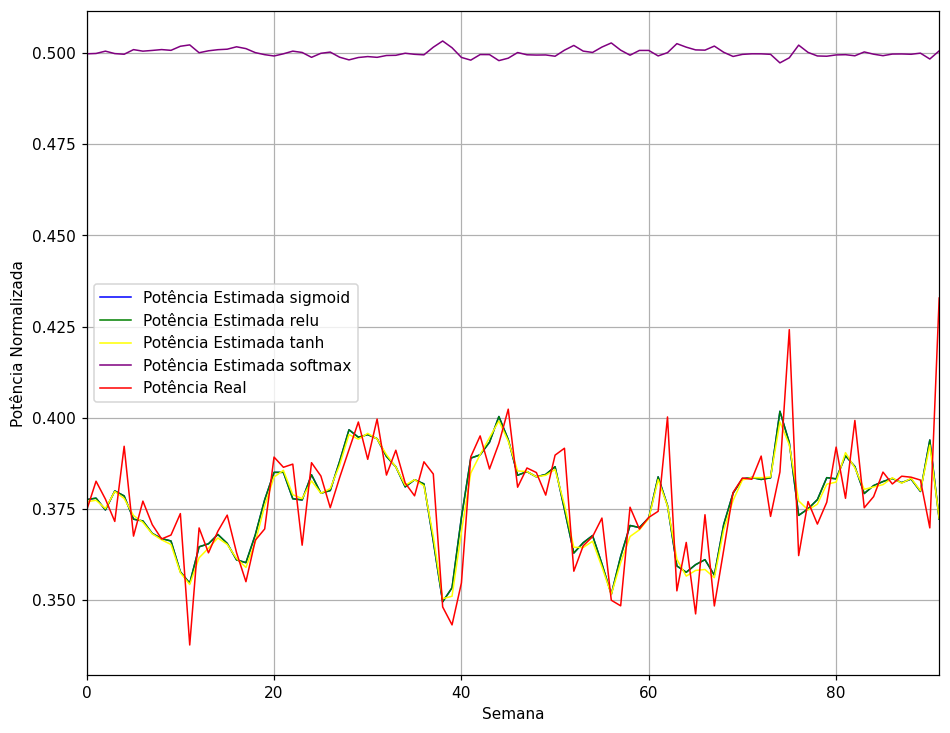

In [22]:
plt.figure(figsize=(10,8),dpi=110)
plt.plot(y_pred[:,0],lw=1,color='Blue')
plt.plot(y_pred_relu[:,0],lw=1,color='Green')
plt.plot(y_pred_tanh[:,0],lw=1,color='Yellow')
plt.plot(y_pred_softmax[:,0],lw=1,color='Purple')
plt.plot(y_test[:,0],lw=1,color='Red')
plt.grid(True)
plt.xlim([0,91])
plt.xlabel('Semana')
plt.ylabel('Potência Normalizada')
plt.legend(['Potência Estimada sigmoid', 'Potência Estimada relu', 'Potência Estimada tanh', 'Potência Estimada softmax', 'Potência Real']) 

In [23]:
val_loss

0.00012741824320983142

In [24]:
print("Loss sigmoid: {}".format(val_loss))
print("Loss relu: {}".format(val_loss_relu))
print("Loss tanh: {}".format(val_loss_tanh))
print("Loss softmax: {}".format(val_loss_softmax))

Loss sigmoid: 0.00012741824320983142
Loss relu: 0.00012315191270317882
Loss tanh: 0.00012368609895929694
Loss softmax: 0.015515019185841084


In [25]:
print("MSE sigmoid: {}".format(val_mse))
print("MSE relu: {}".format(val_mse_relu))
print("MSE tanh: {}".format(val_mse_tanh))
print("MSE softmax: {}".format(val_mse_softmax))

MSE sigmoid: 0.00012741824320983142
MSE relu: 0.00012315191270317882
MSE tanh: 0.00012368609895929694
MSE softmax: 0.015515019185841084
